# Installation of Dependiences

In [1]:
!pip install opendatasets scikit-learn --quiet --upgrade


In [2]:
!pip install sweetviz --quiet

     |████████████████████████████████| 15.1 MB 5.1 MB/s 


In [3]:
!pip install pandas numpy matplotlib seaborn --quiet

In [4]:
!pip install missingno --quiet

In [5]:
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import os
#visualize data 
from scipy.stats import norm
from scipy import stats
# Import missingno as msno
import missingno as msno
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'


In [6]:
import sweetviz as sv

#Data Acquistion

In [7]:
dataset_path = 'https://raw.githubusercontent.com/deisepureza/TheRocksPrediction/main/Unilever_2003-2013.CSV'

unileverdata_df = pd.read_csv(dataset_path)
#unileverdata_df=unileverdata_df[['TIMESTAMP','M_ZONE_START', 'M_ZONE_FLAG', 'M_TRACK_TEMPERATURE', 'M_AIR_TEMPERATURE', 'M_NUM_WEATHER_FORECAST_SAMPLES', 'M_SESSION_TIME_LEFT', 'M_WEATHER_FORECAST_SAMPLES_M_SESSION_TYPE', 'M_TIME_OFFSET', 'M_WEATHER_FORECAST_SAMPLES_M_WEATHER', 'M_WEATHER_FORECAST_SAMPLES_M_TRACK_TEMPERATURE', 'M_TRACK_TEMPERATURE_CHANGE', 'M_WEATHER_FORECAST_SAMPLES_M_AIR_TEMPERATURE', 'M_AIR_TEMPERATURE_CHANGE', 'M_RAIN_PERCENTAGE', 'M_WEATHER']]


In [8]:
columnnames=list(unileverdata_df.columns)
print(columnnames)

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [9]:
unileverdata_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [10]:
unileverdata_df

Date     Open     High      Low    Close     Adj Close    Volume
0     2003-09-03   3075.0   3375.0   3025.0   3375.0   2167.930664   8632500
1     2003-09-04   3450.0   3750.0   3375.0   3425.0   2200.048096  16570000
2     2003-09-05   3425.0   3500.0   3400.0   3450.0   2216.106934   4811000
3     2003-09-08   3450.0   3450.0   3325.0   3400.0   2183.989990   3601500
4     2003-09-09   3400.0   3400.0   3300.0   3325.0   2135.813477   2815000
...          ...      ...      ...      ...      ...           ...       ...
3310  2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844   1210200
3311  2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563   1216000
3312  2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375   2002300
3313  2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031   1966800
3314  2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500   1896100

[3315 rows x 7 columns]

In [11]:
unileverdata_df['Date'] = pd.to_datetime(unileverdata_df['Date']).dt.date

In [12]:
unileverdata_df['Date'].head()

0    2003-09-03
1    2003-09-04
2    2003-09-05
3    2003-09-08
4    2003-09-09
Name: Date, dtype: object

#Exploratory data analysis Analysis

## Statistical data analysis

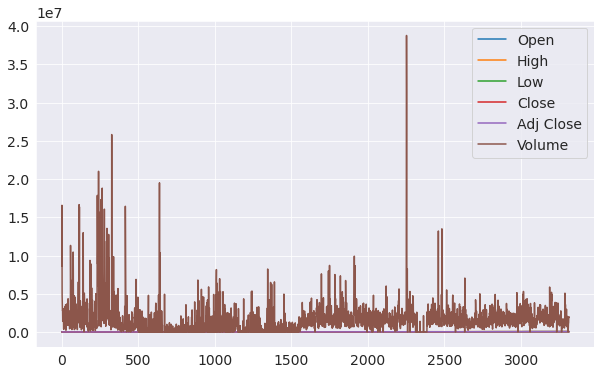

In [13]:
unileverdata_df.plot()
plt.show()

In [14]:
feature_config = sv.FeatureConfig(force_num=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'])

In [15]:
report = sv.analyze(unileverdata_df, target_feat='Volume', feat_cfg=feature_config)


                                             |          | [  0%]   00:00 -> (? left)


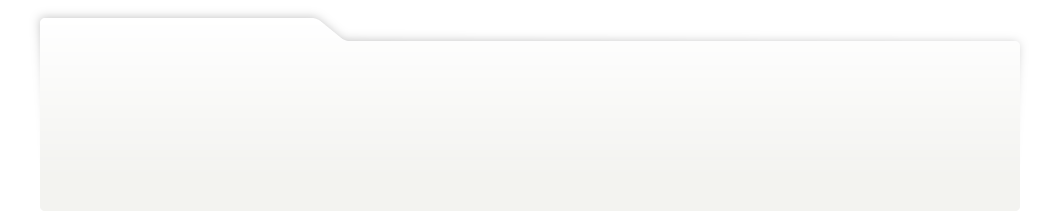
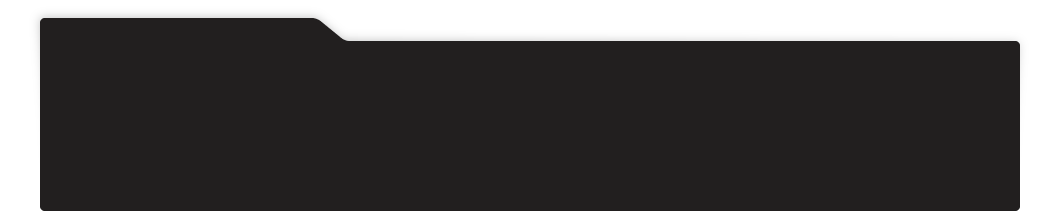
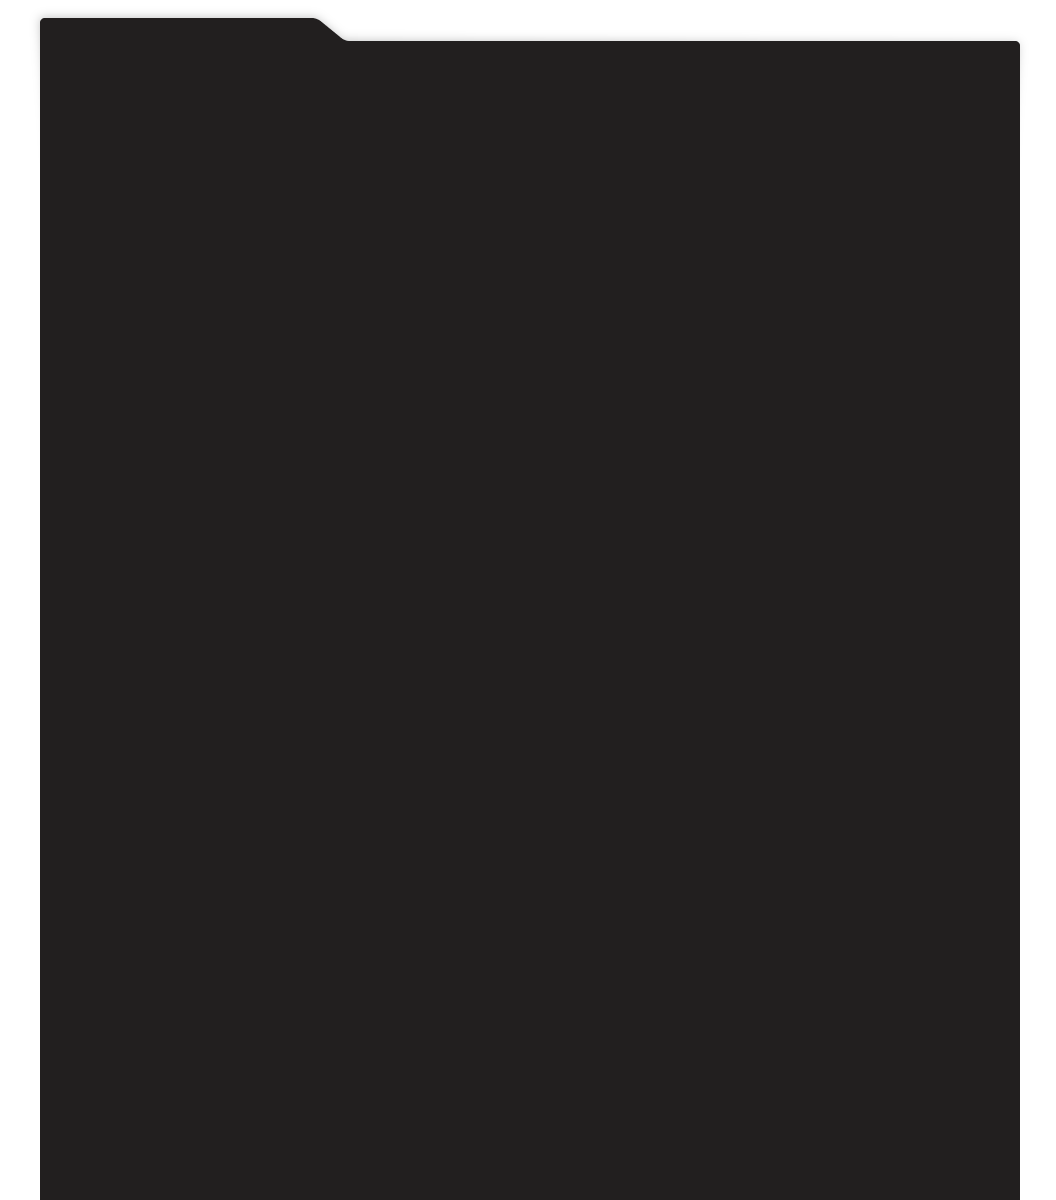
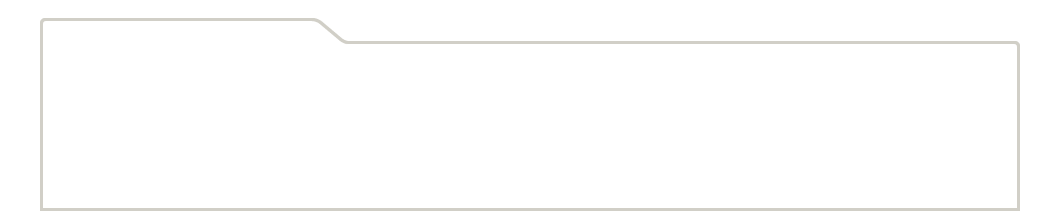
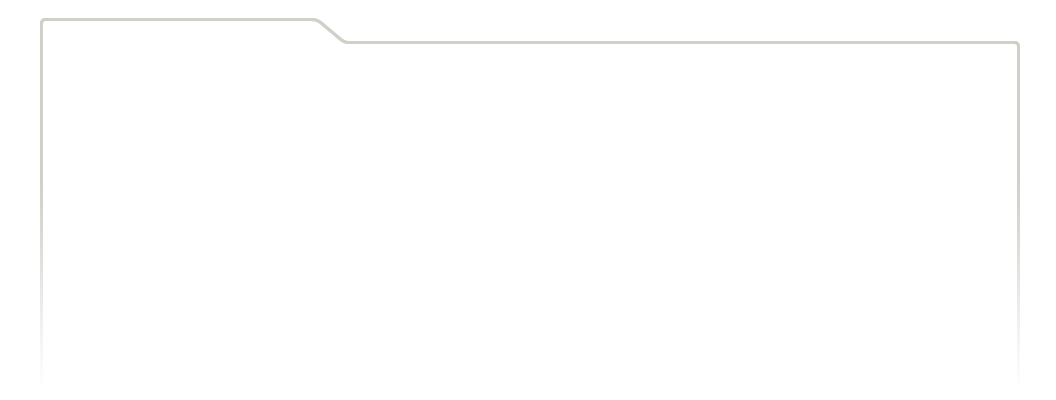
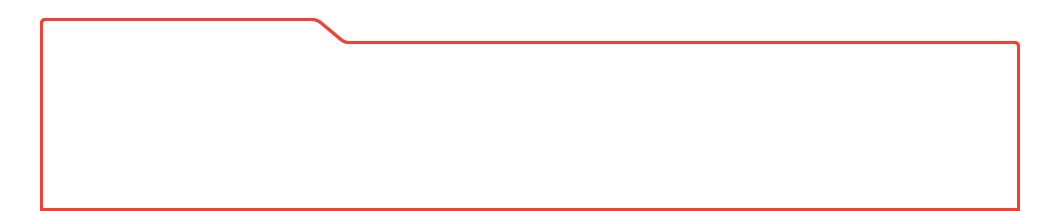
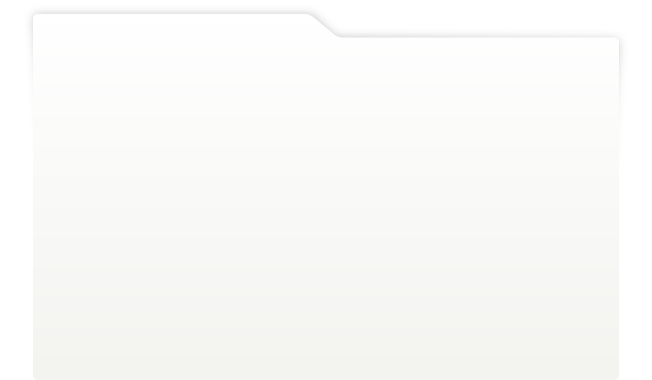
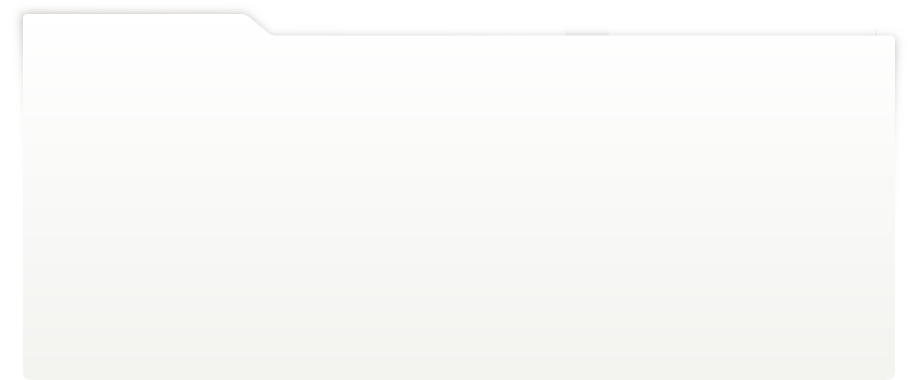
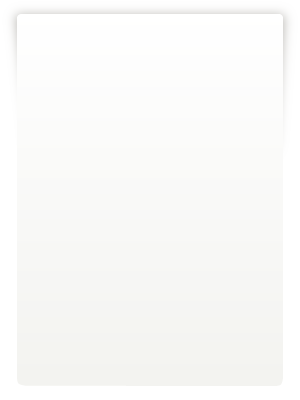
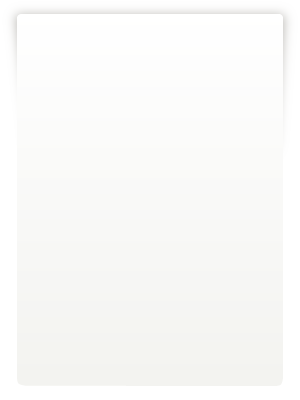
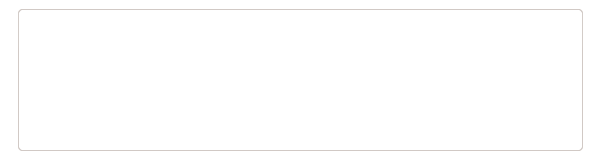
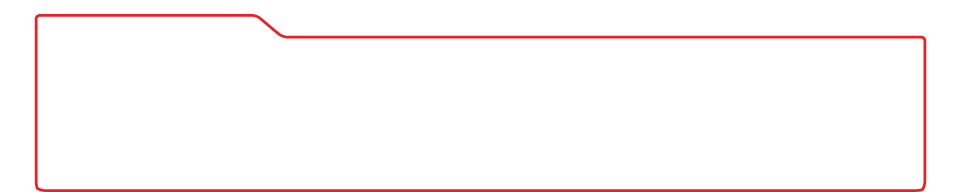
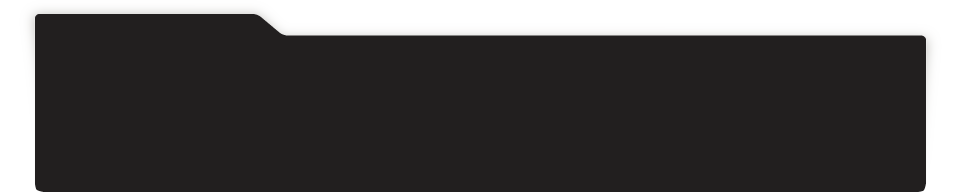
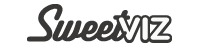
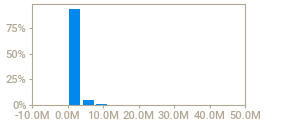
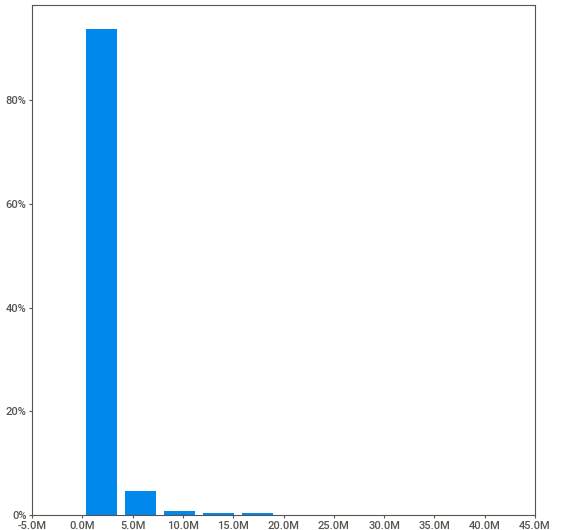
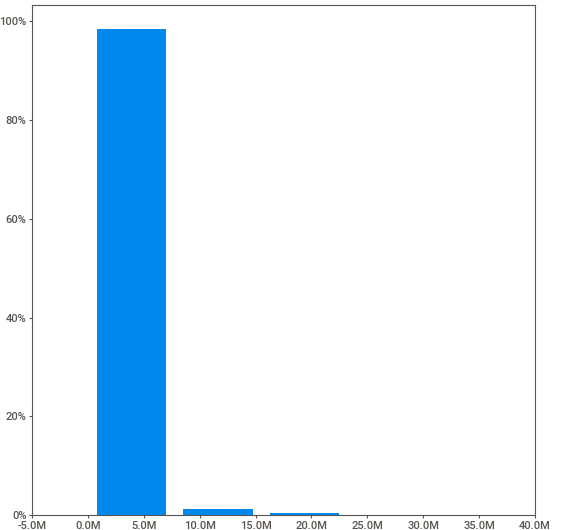
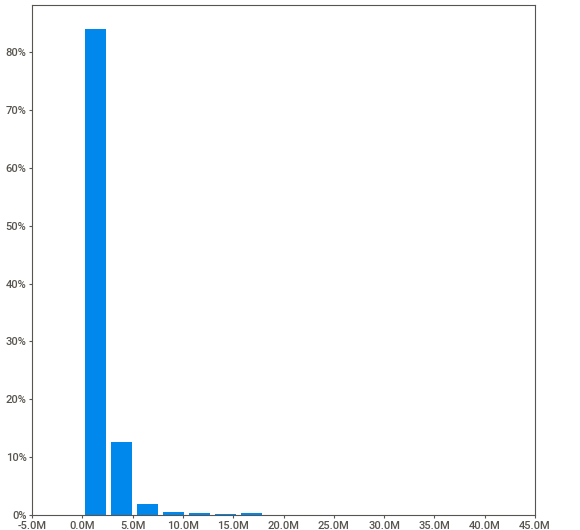
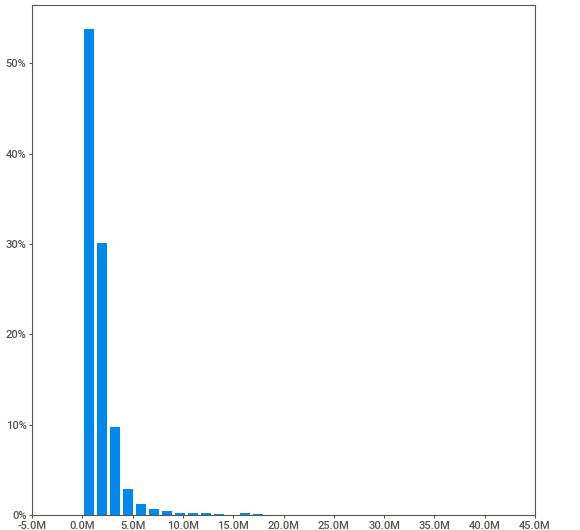
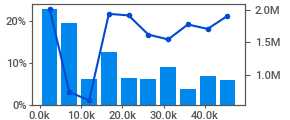
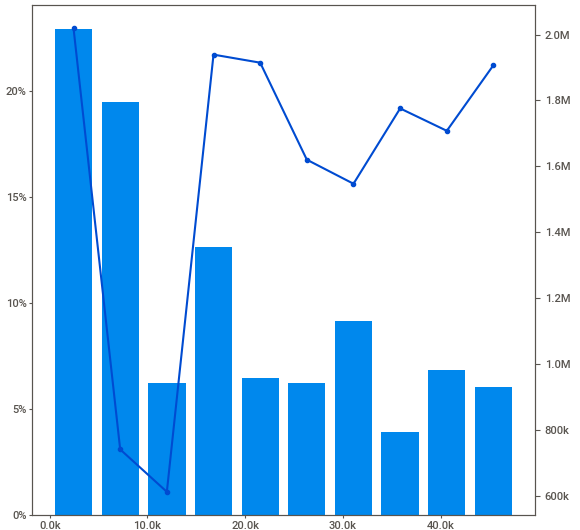
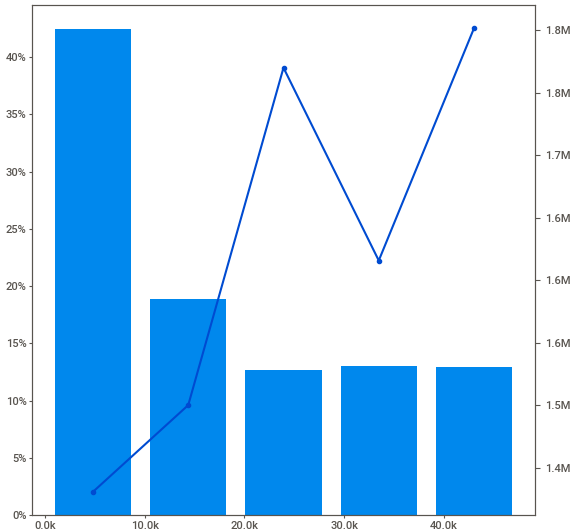
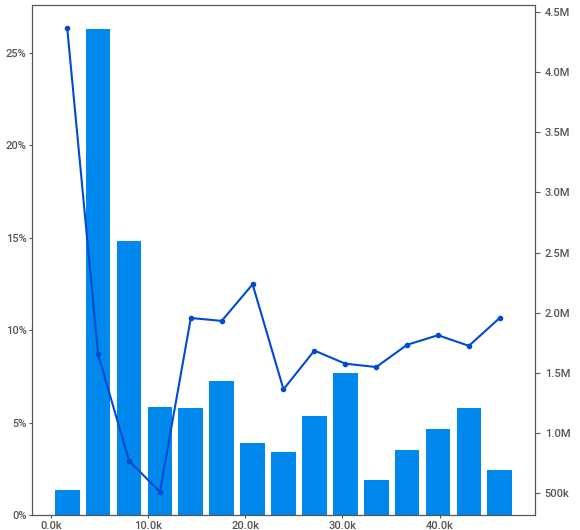
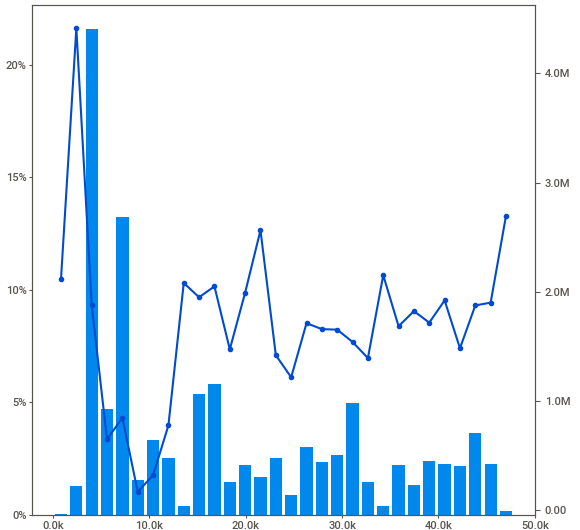
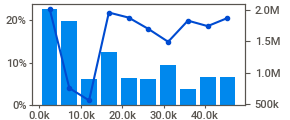
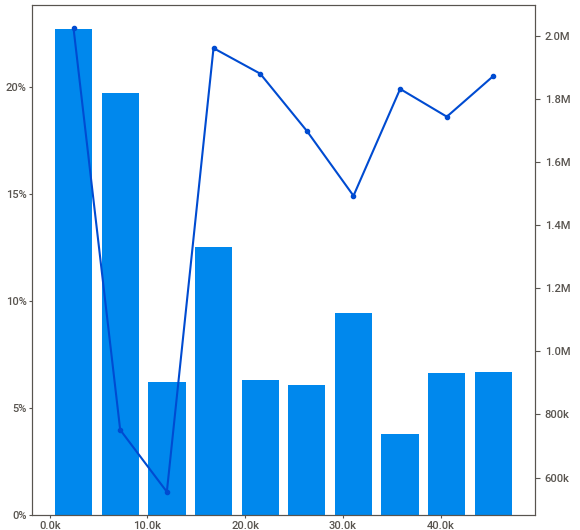
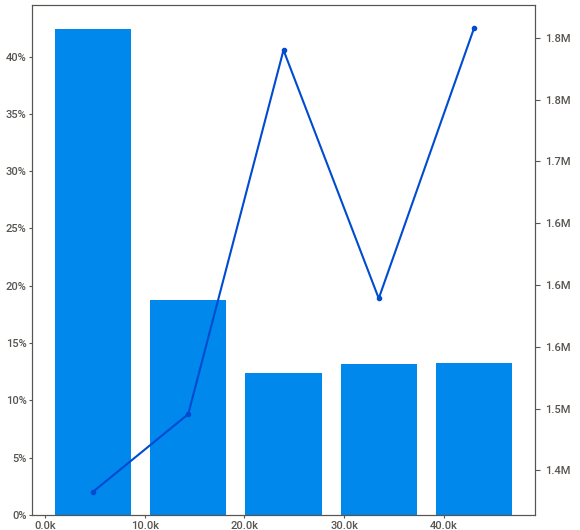
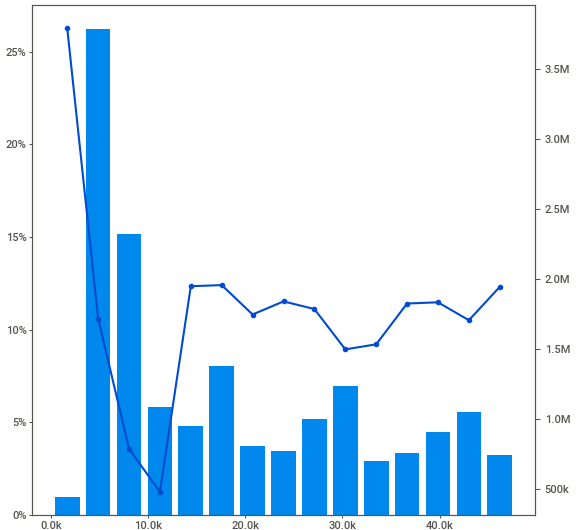
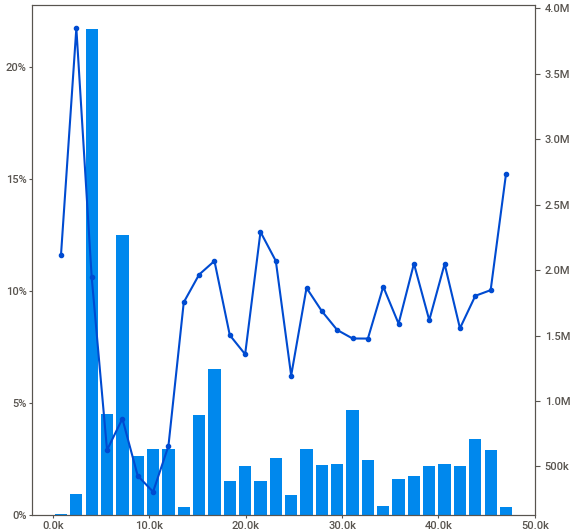
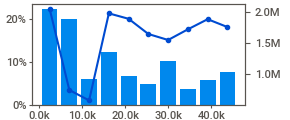
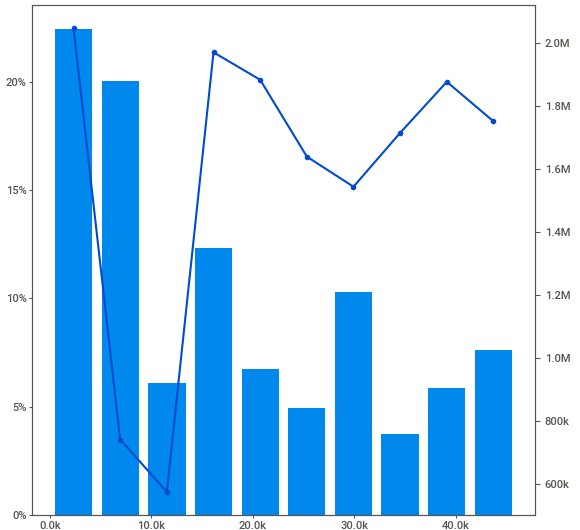
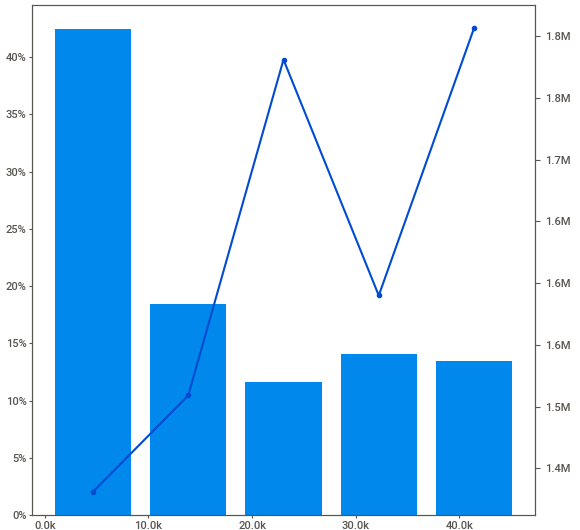
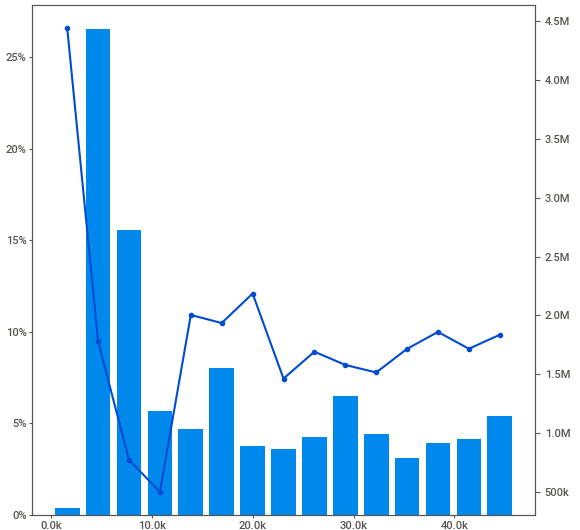
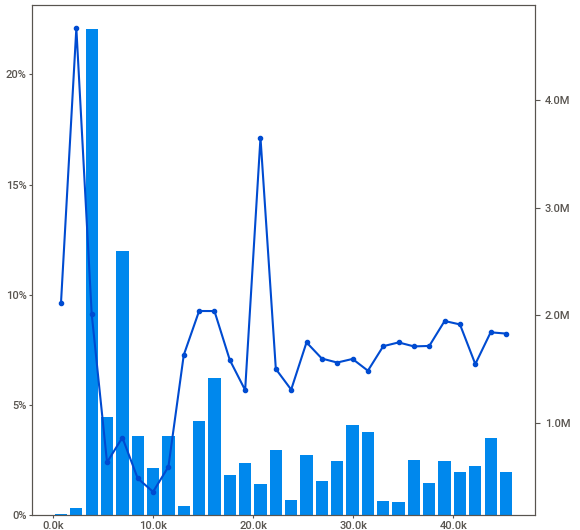
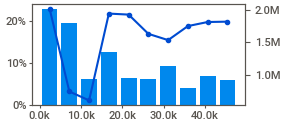
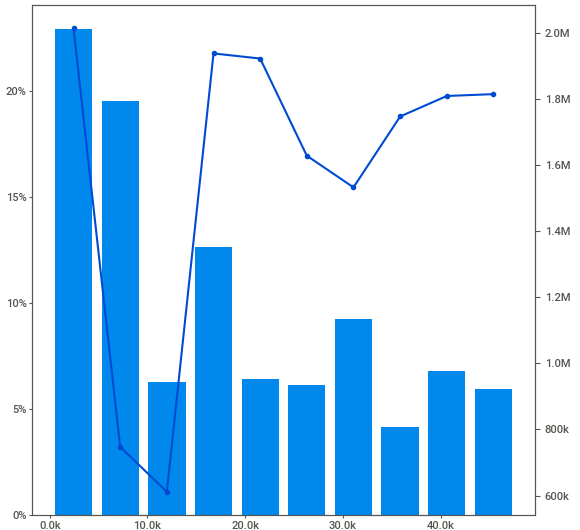
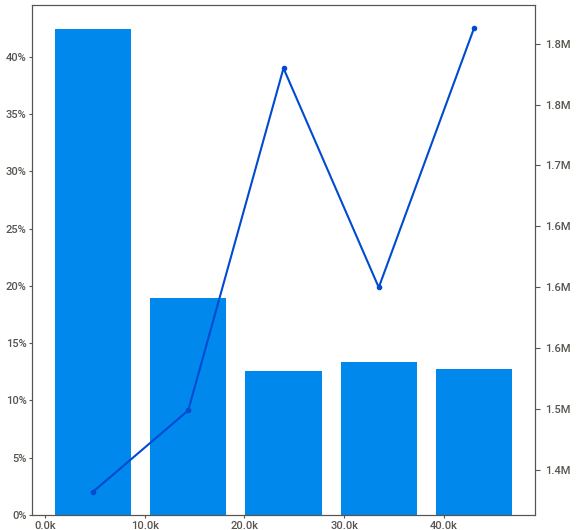
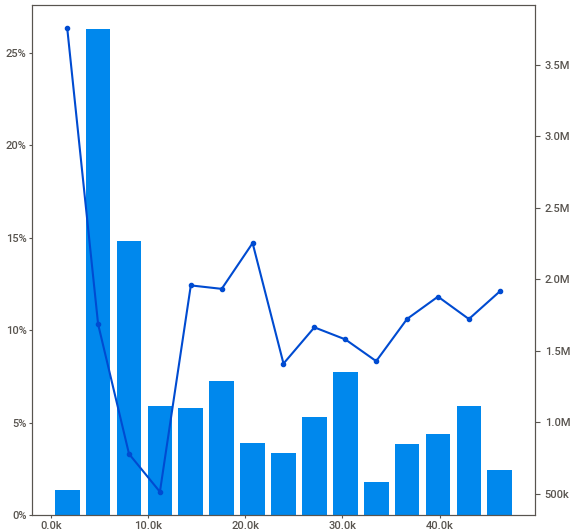
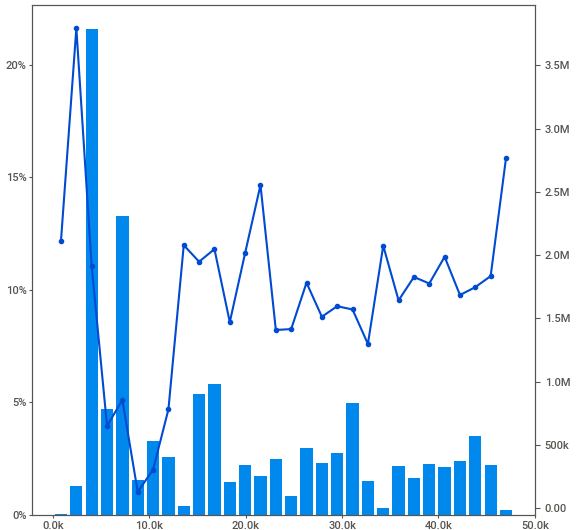
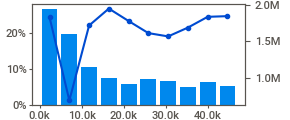
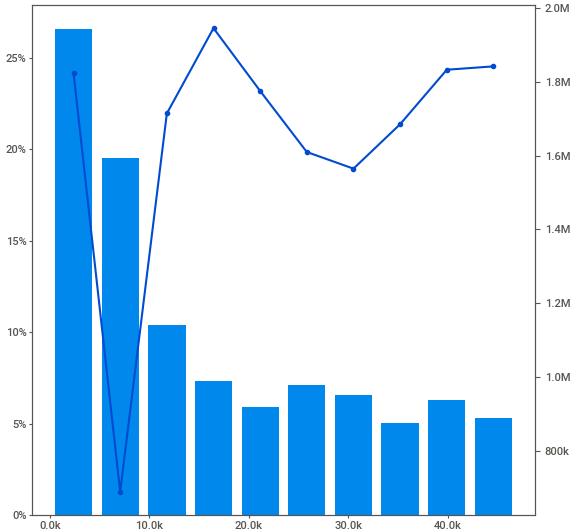
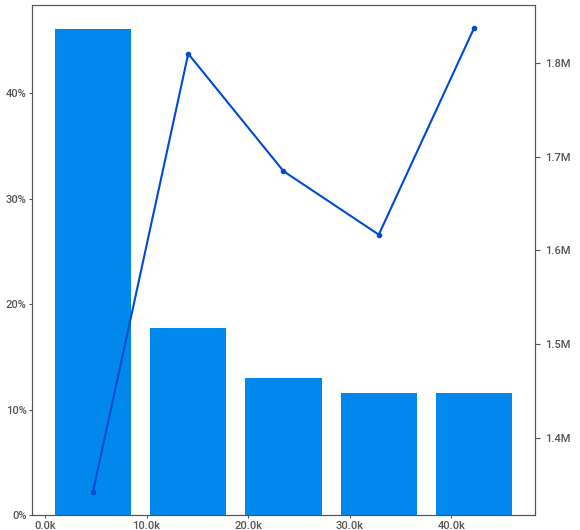
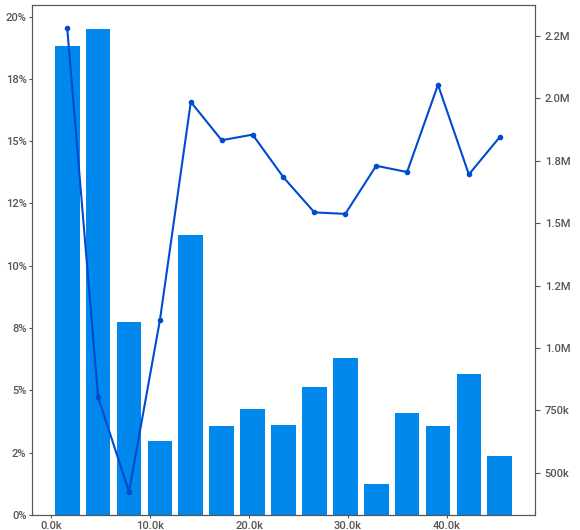
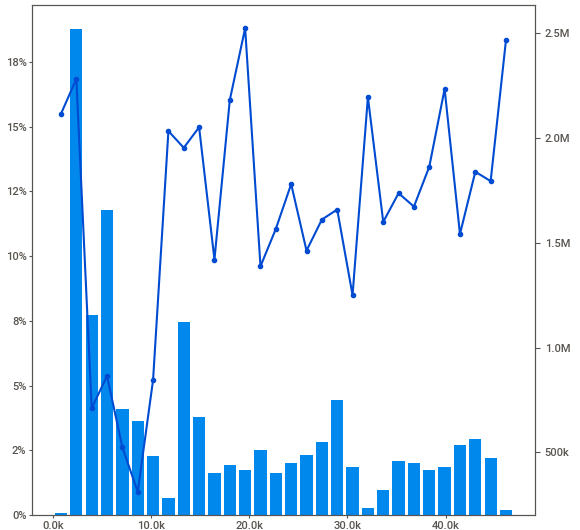
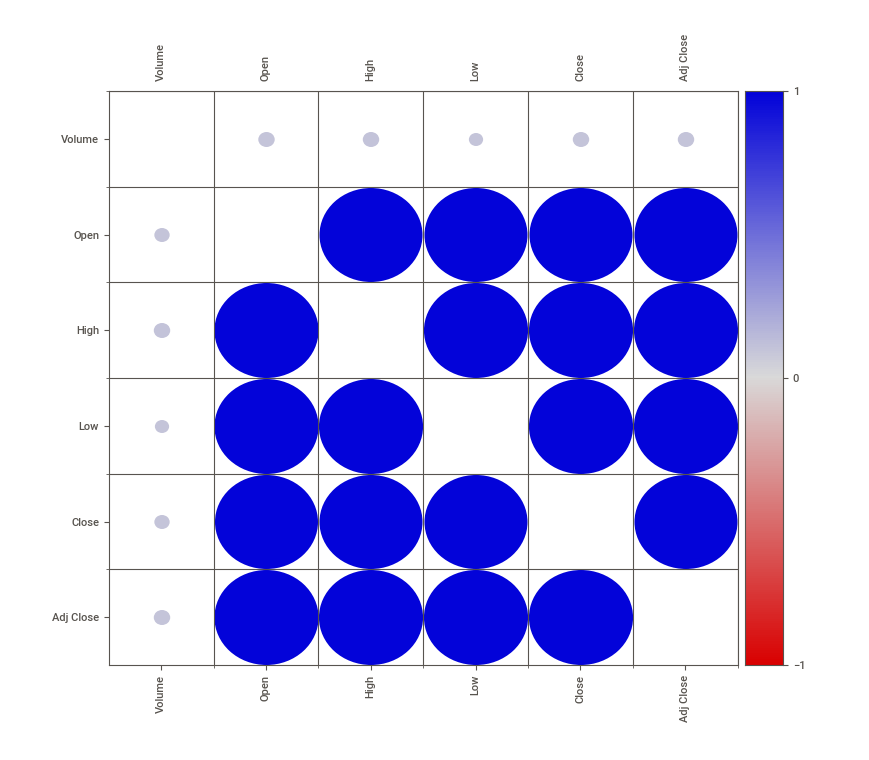
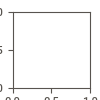

In [16]:
report.show_notebook()

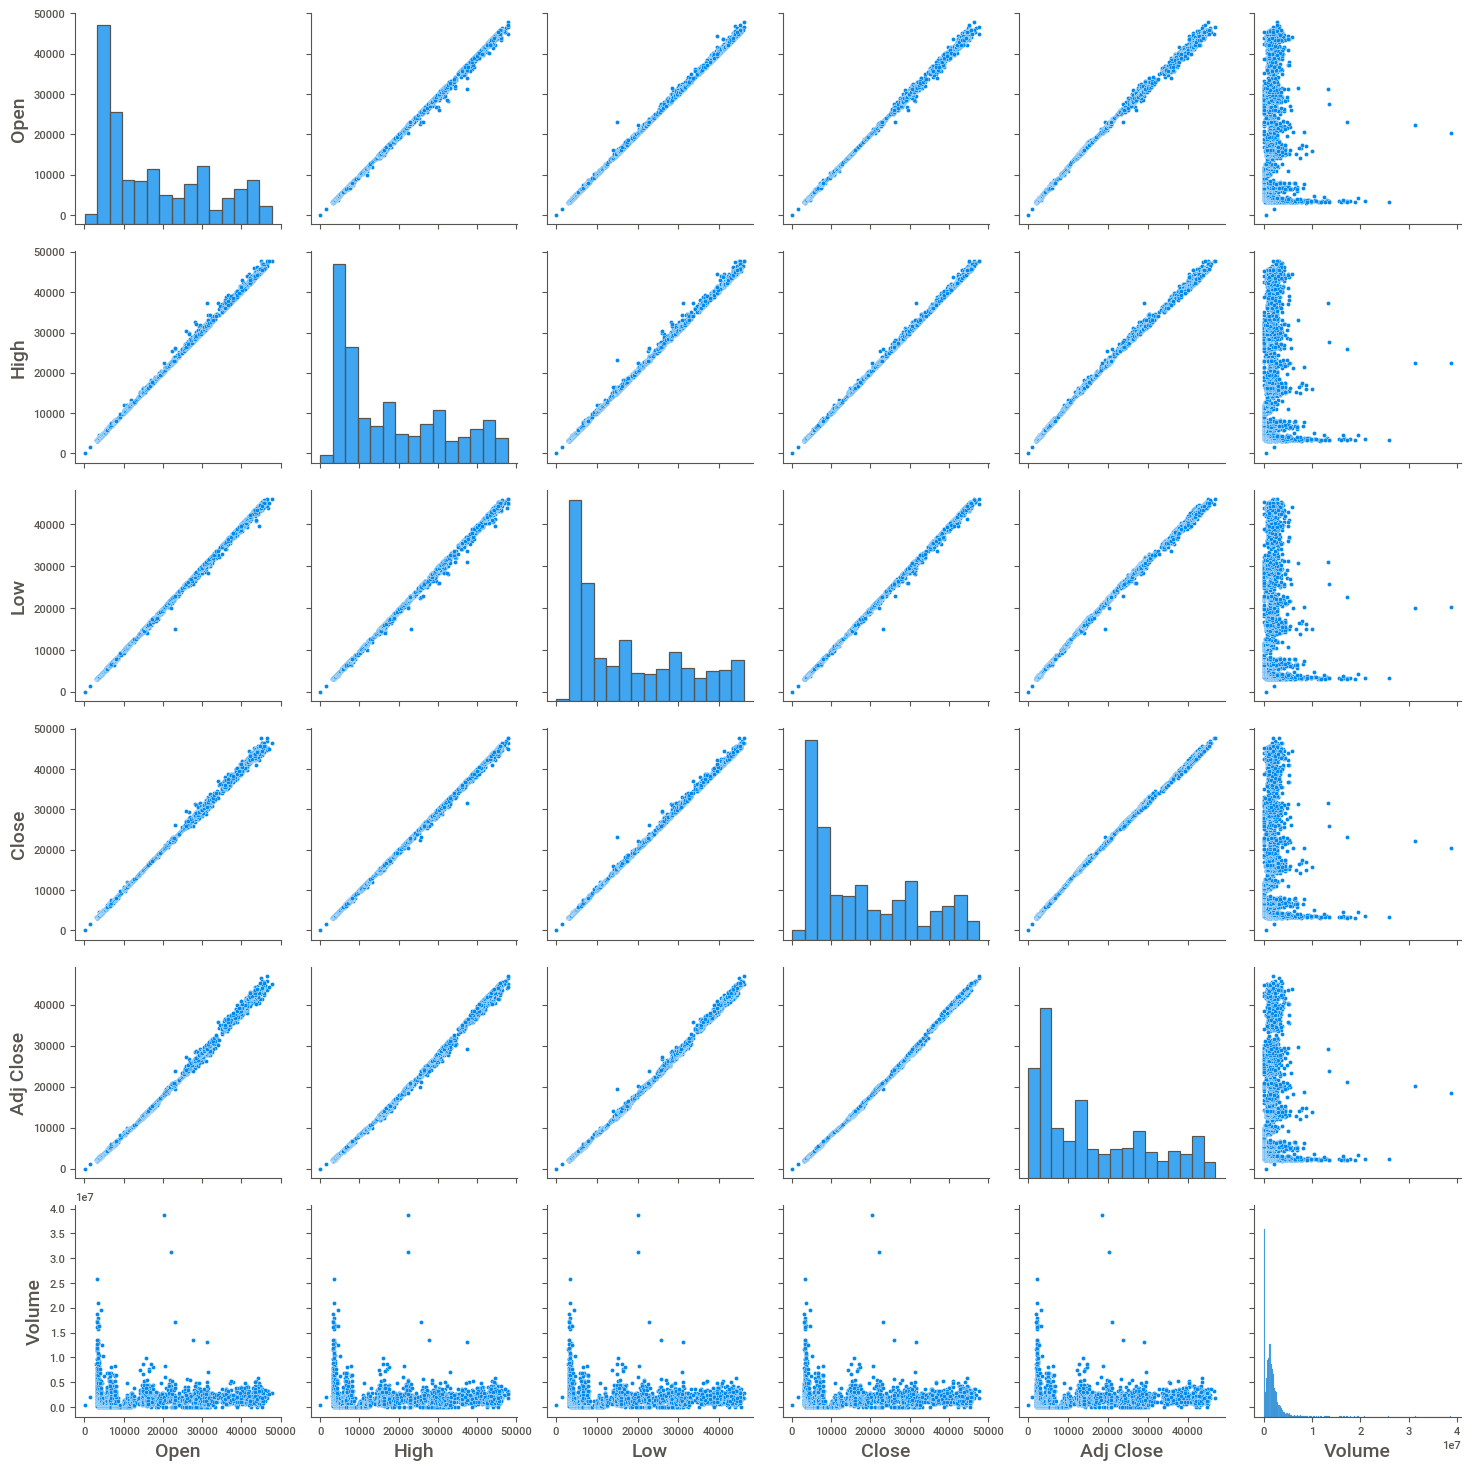

In [17]:
#Pair Grid
sns.pairplot(unileverdata_df)

In [18]:
print(unileverdata_df.shape)

(3315, 7)


In [19]:
unileverdata_df.describe()

Open          High           Low         Close     Adj Close  \
count   3315.000000   3315.000000   3315.000000   3315.000000   3315.000000   
mean   17761.258220  17975.980995  17545.765913  17770.579487  16159.530840   
std    13600.095739  13745.474159  13445.660251  13605.519493  13564.126327   
min       49.000000     50.000000     49.000000     49.000000     37.319904   
25%     5775.000000   5850.000000   5700.000000   5775.000000   4406.032715   
50%    14900.000000  15050.000000  14800.000000  14900.000000  12794.589844   
75%    29575.000000  29975.000000  29200.000000  29550.000000  27417.013672   
max    47800.000000  47800.000000  46025.000000  47800.000000  46926.152344   

             Volume  
count  3.315000e+03  
mean   1.558793e+06  
std    2.110830e+06  
min    0.000000e+00  
25%    2.645000e+05  
50%    1.210200e+06  
75%    2.011200e+06  
max    3.878650e+07

In [20]:
unileverdata_df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

## Investigating Outliers

2003-09-03    1
2012-10-17    1
2012-10-03    1
2012-10-04    1
2012-10-05    1
             ..
2008-04-02    1
2008-04-03    1
2008-04-04    1
2008-04-07    1
2017-04-28    1
Name: Date, Length: 3315, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


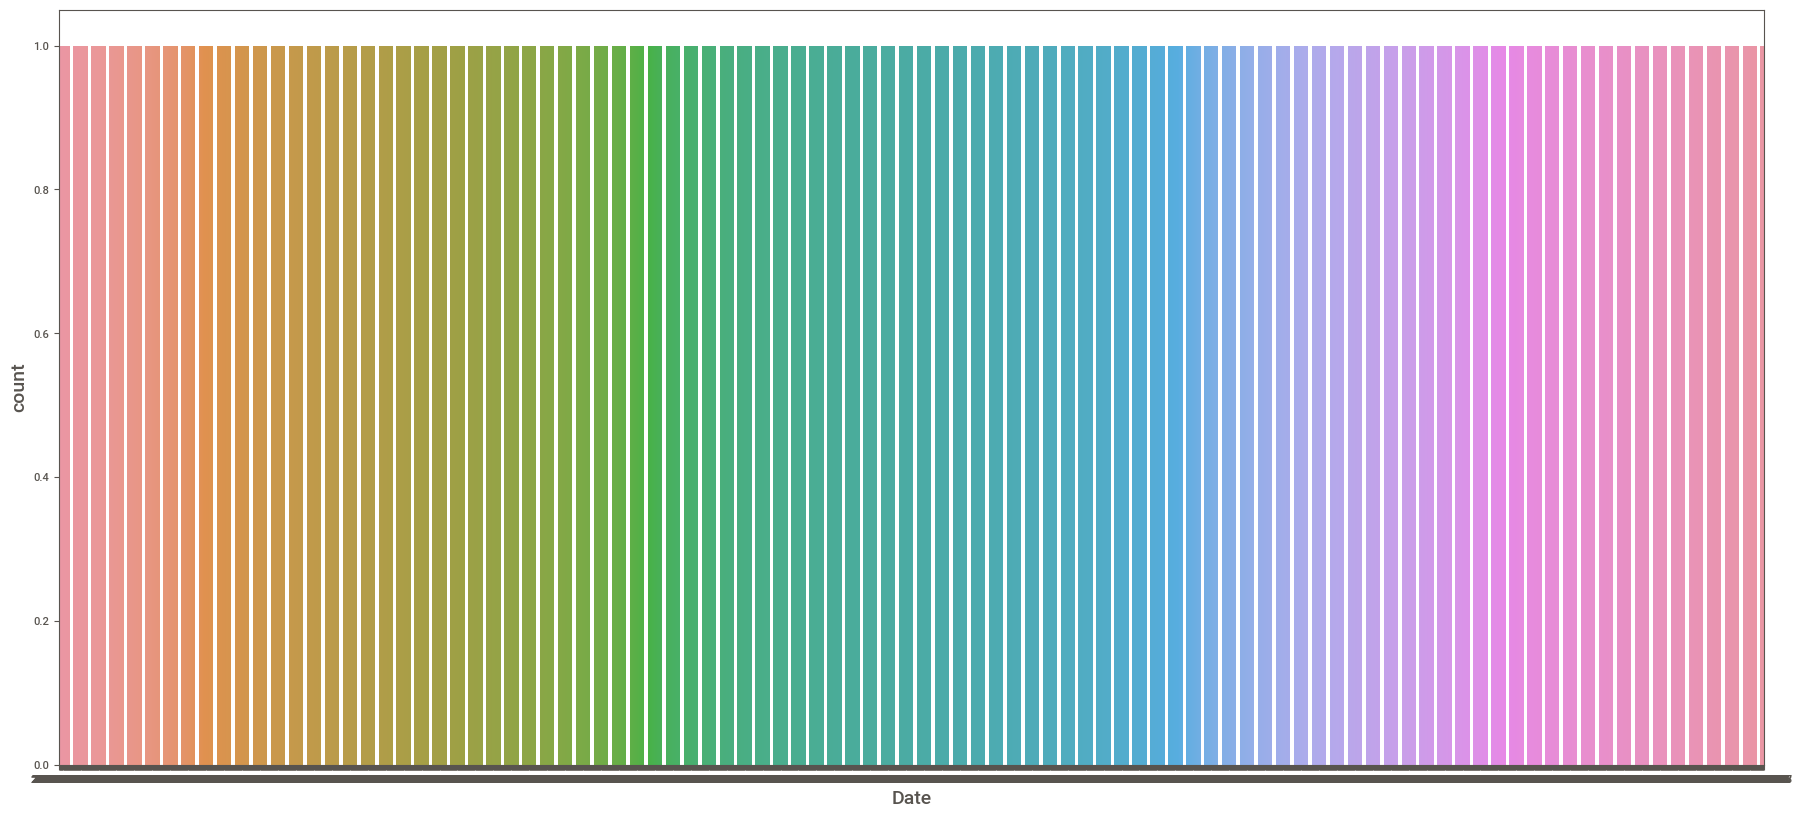

6800.0     38
4300.0     37
6750.0     33
6850.0     29
3650.0     29
           ..
28650.0     1
27725.0     1
27025.0     1
25925.0     1
44800.0     1
Name: Open, Length: 838, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


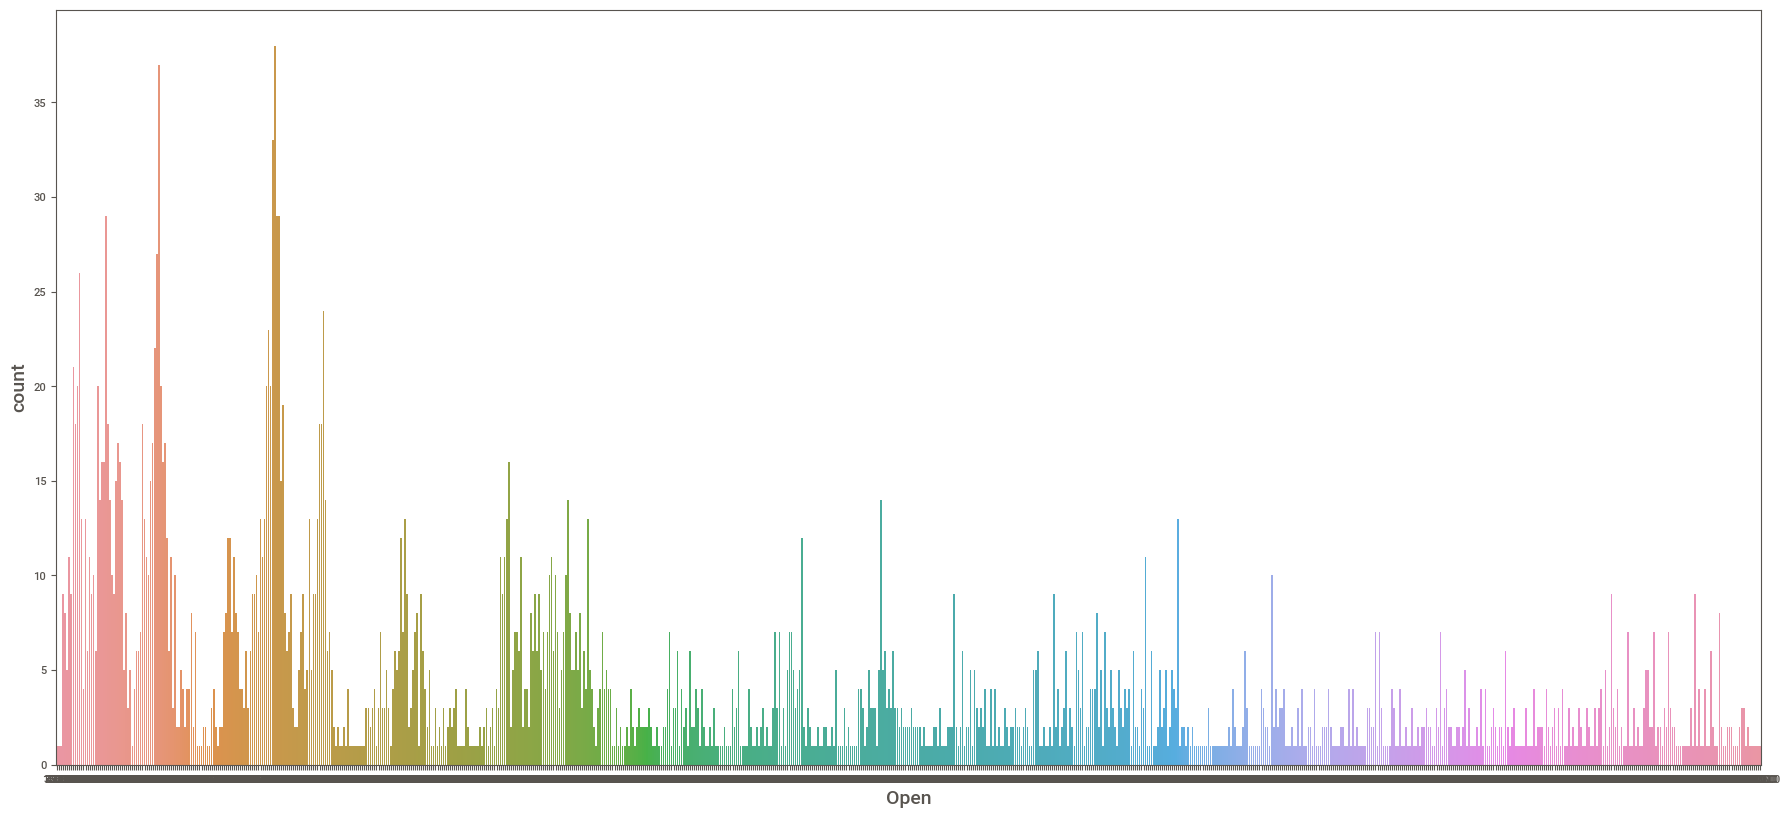

6800.0     45
6900.0     36
6850.0     32
4300.0     30
3325.0     29
           ..
30525.0     1
29800.0     1
29675.0     1
29850.0     1
43150.0     1
Name: High, Length: 852, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


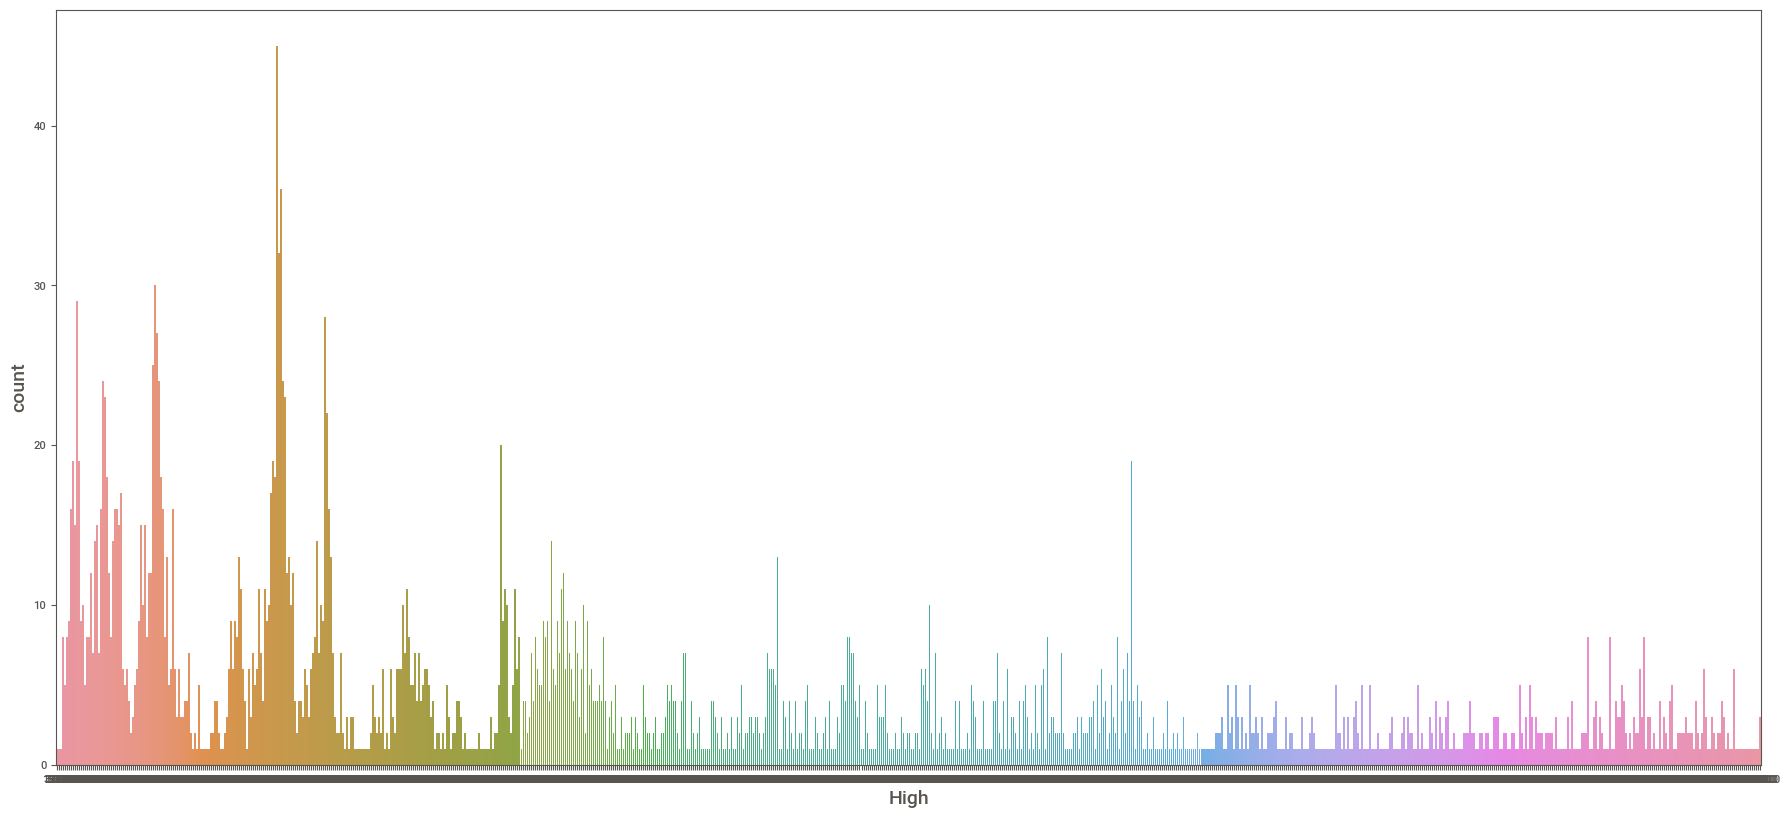

6750.0     35
6800.0     34
6700.0     34
6850.0     31
4275.0     30
           ..
30475.0     1
29350.0     1
28800.0     1
29175.0     1
44325.0     1
Name: Low, Length: 851, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


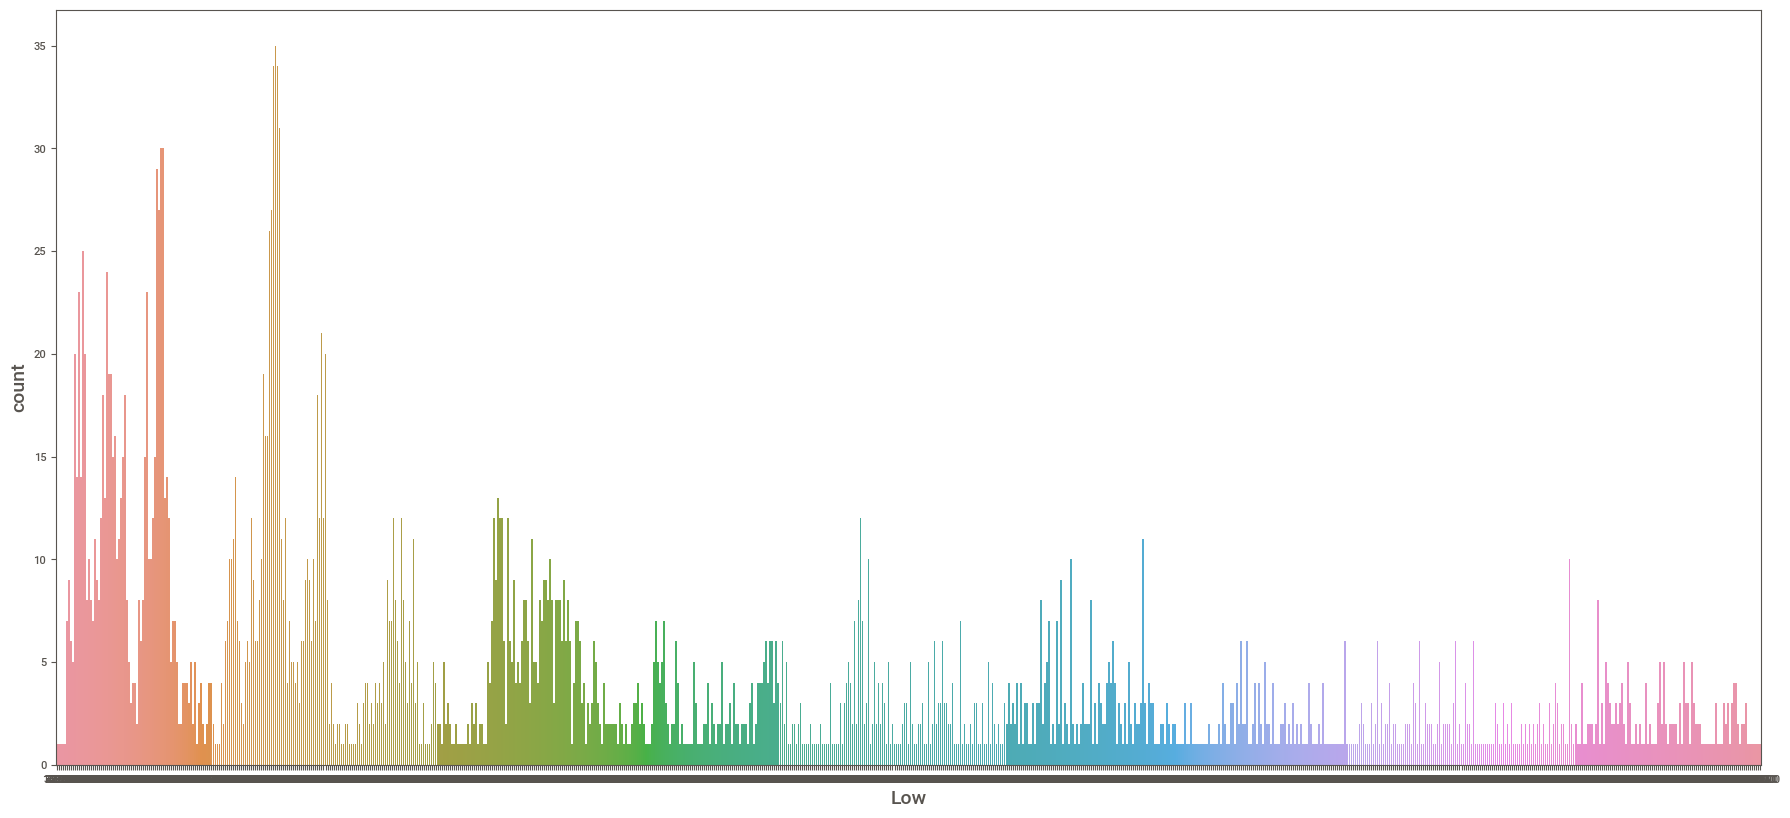

4300.0     38
6850.0     37
6750.0     36
6800.0     36
6900.0     28
           ..
18900.0     1
19050.0     1
19100.0     1
20700.0     1
45800.0     1
Name: Close, Length: 874, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


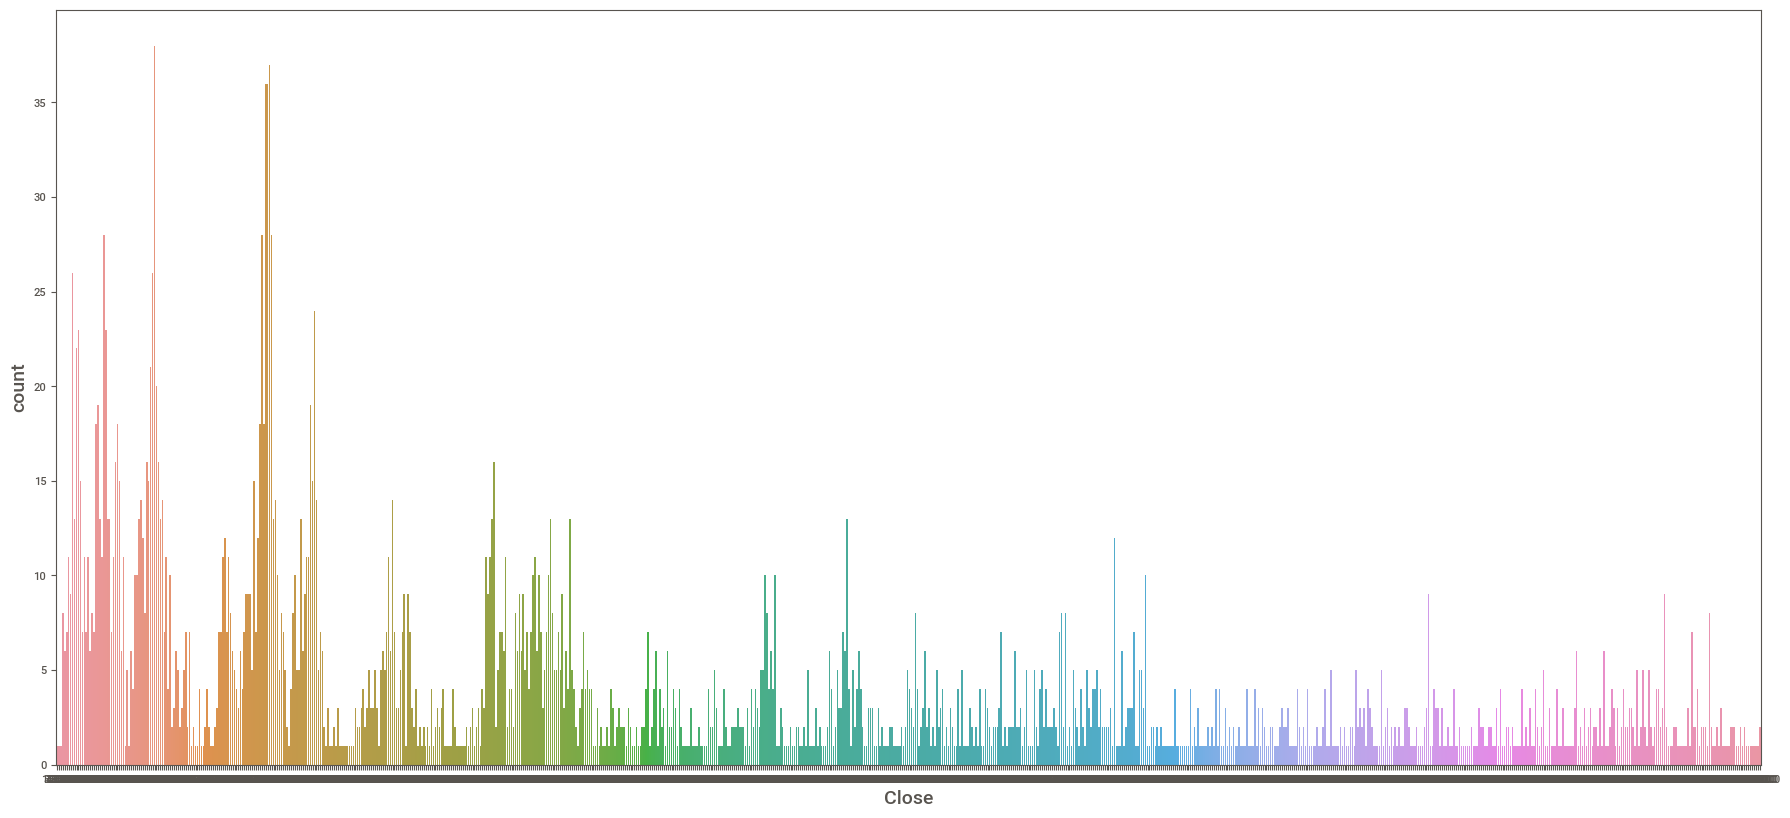

5307.055176     24
3136.255371     24
5385.678711     20
5346.366699     20
6531.592285     20
                ..
24571.097656     1
24616.601563     1
25026.123047     1
25162.628906     1
44077.937500     1
Name: Adj Close, Length: 1455, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


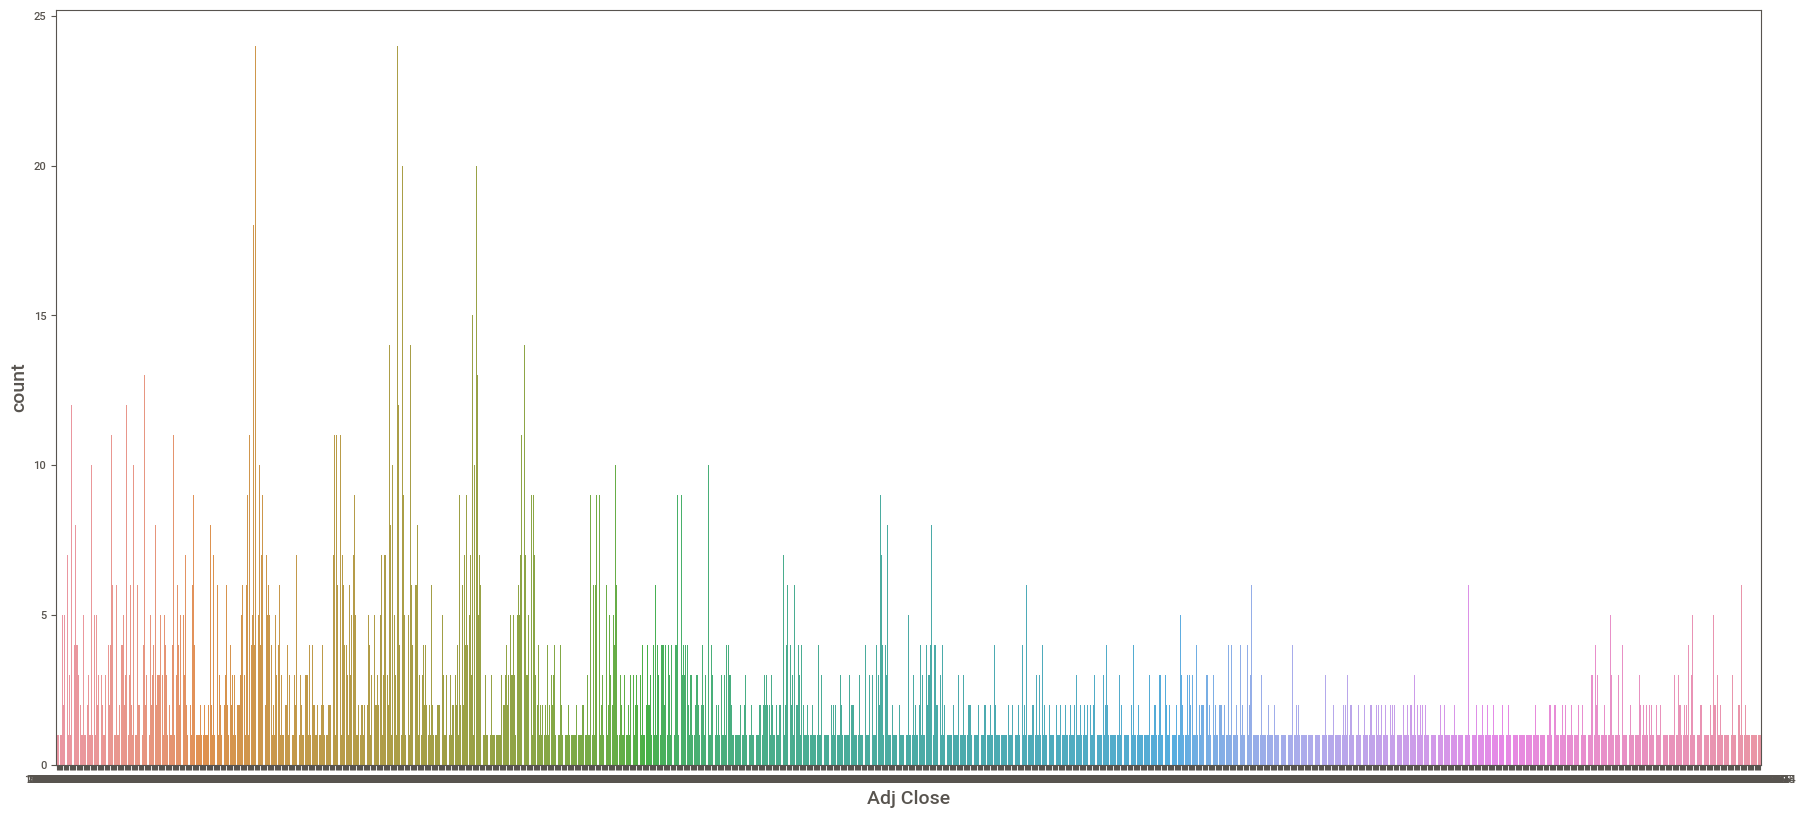

4          737
3           24
0           11
1216000      4
1319500      3
          ... 
681000       1
914500       1
1423000      1
908000       1
1896100      1
Name: Volume, Length: 2310, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


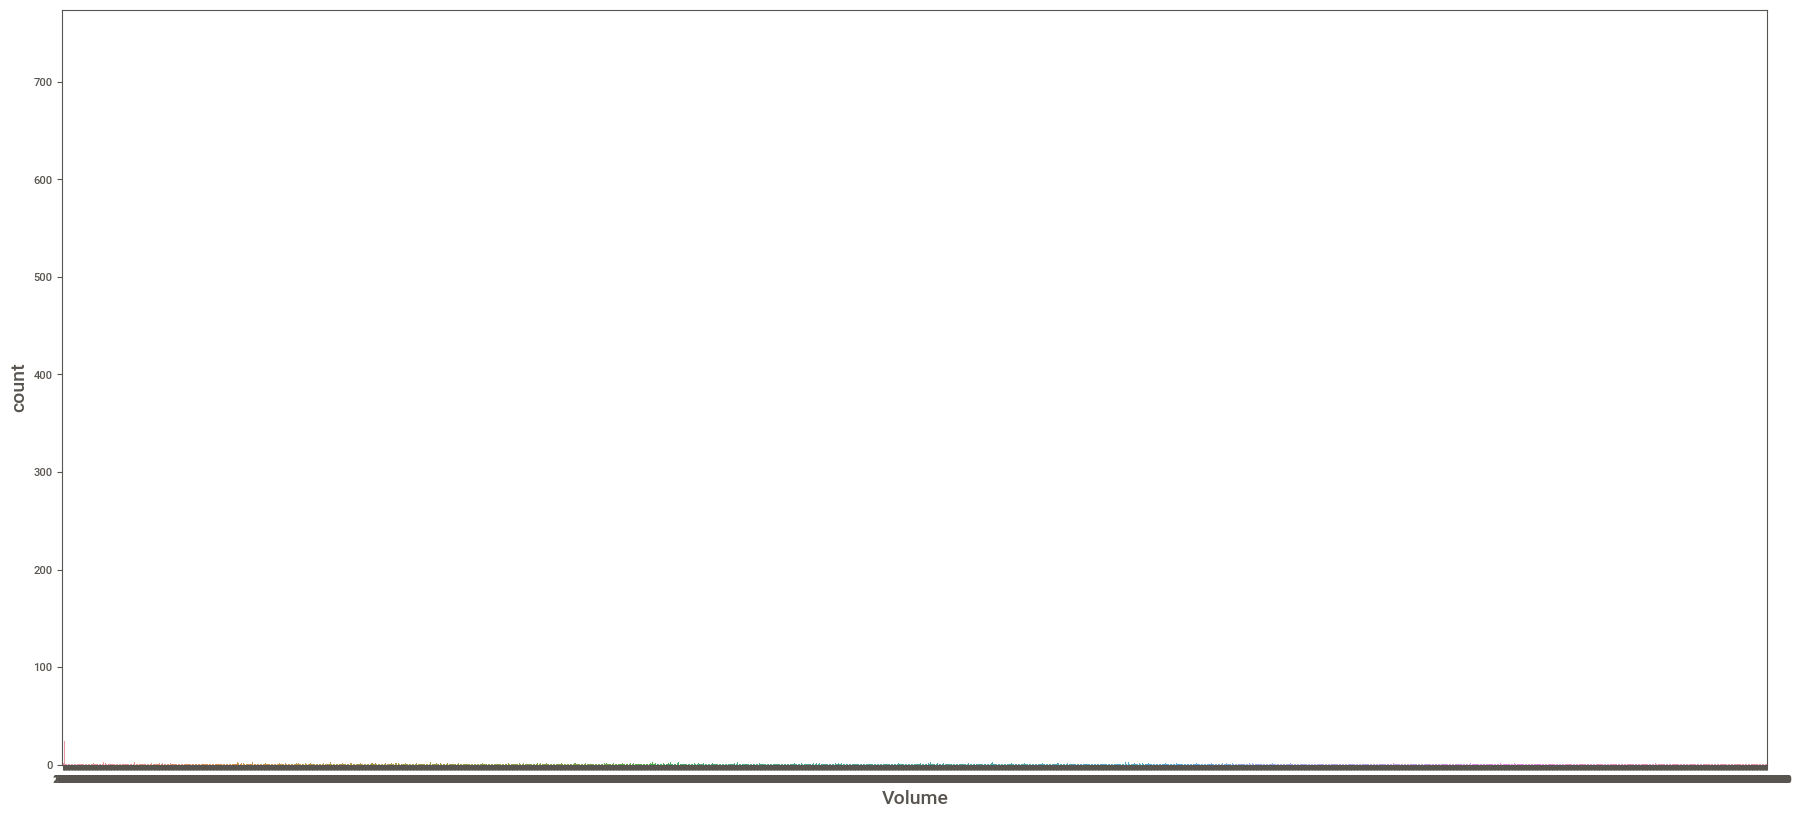

In [21]:
for columnname in columnnames:
  print(unileverdata_df[columnname].value_counts())
  plt.figure(figsize=(22,10))
  sns.countplot(unileverdata_df[columnname])
  plt.show()

In [22]:
unileverdata_df12= unileverdata_df.copy(deep=True)
unileverdata_df12.set_index('Date', inplace = True) #Set the date to the index
unileverdata_df12.head(12)

Open    High     Low   Close    Adj Close    Volume
Date                                                             
2003-09-03  3075.0  3375.0  3025.0  3375.0  2167.930664   8632500
2003-09-04  3450.0  3750.0  3375.0  3425.0  2200.048096  16570000
2003-09-05  3425.0  3500.0  3400.0  3450.0  2216.106934   4811000
2003-09-08  3450.0  3450.0  3325.0  3400.0  2183.989990   3601500
2003-09-09  3400.0  3400.0  3300.0  3325.0  2135.813477   2815000
2003-09-10  3300.0  3300.0  3200.0  3200.0  2055.519531   2838000
2003-09-11  3200.0  3225.0  3200.0  3200.0  2055.519531   1417500
2003-09-12  3225.0  3350.0  3225.0  3300.0  2119.754150   3078500
2003-09-15  3300.0  3325.0  3225.0  3250.0  2087.636719   1827500
2003-09-16  3275.0  3325.0  3275.0  3325.0  2135.813477   1741000
2003-09-17  3350.0  3350.0  3300.0  3325.0  2135.813477   1778000
2003-09-18  3300.0  3300.0  3275.0  3300.0  2119.754150   1015000

In [23]:
columnnames =['Open', 'High', 'Low', 'Close', 'Adj Close']

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


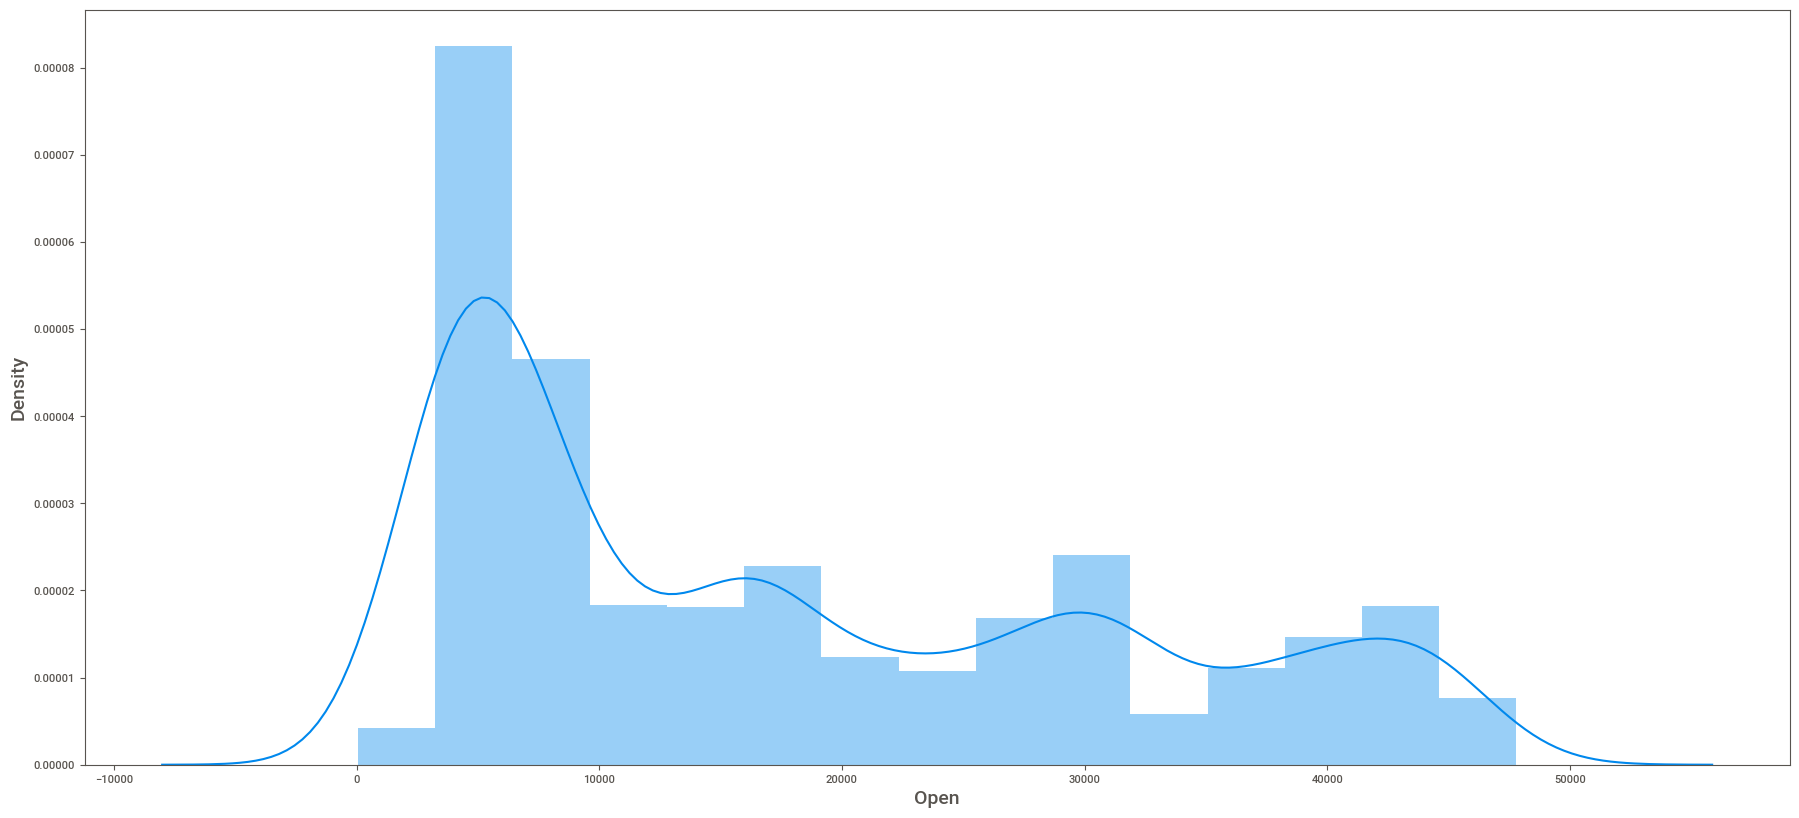

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


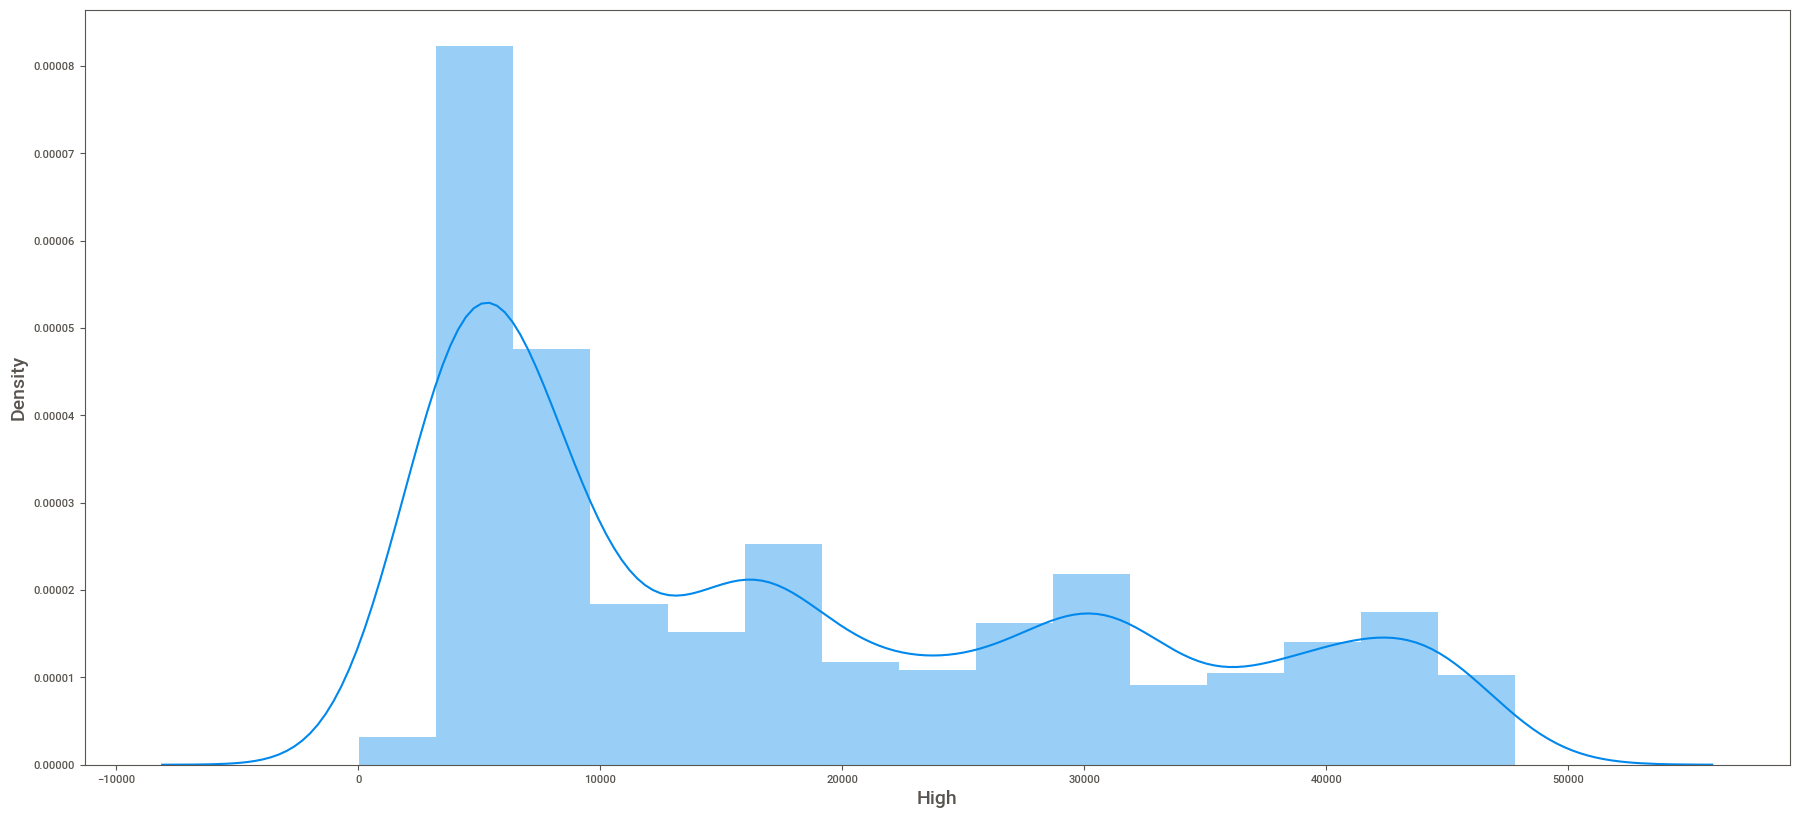

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


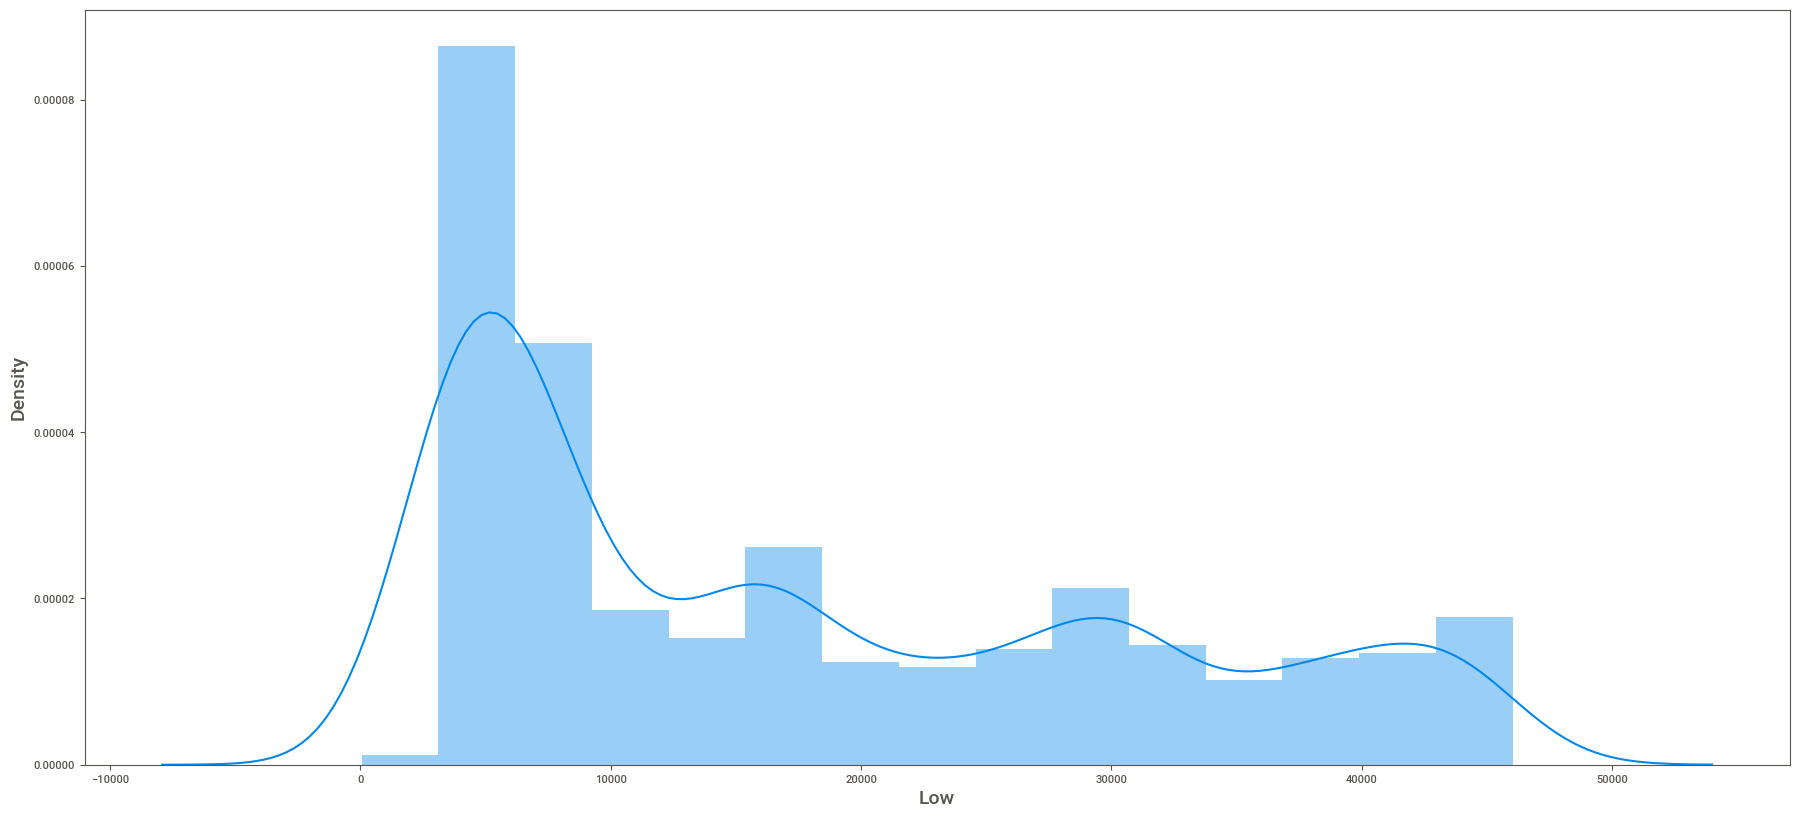

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


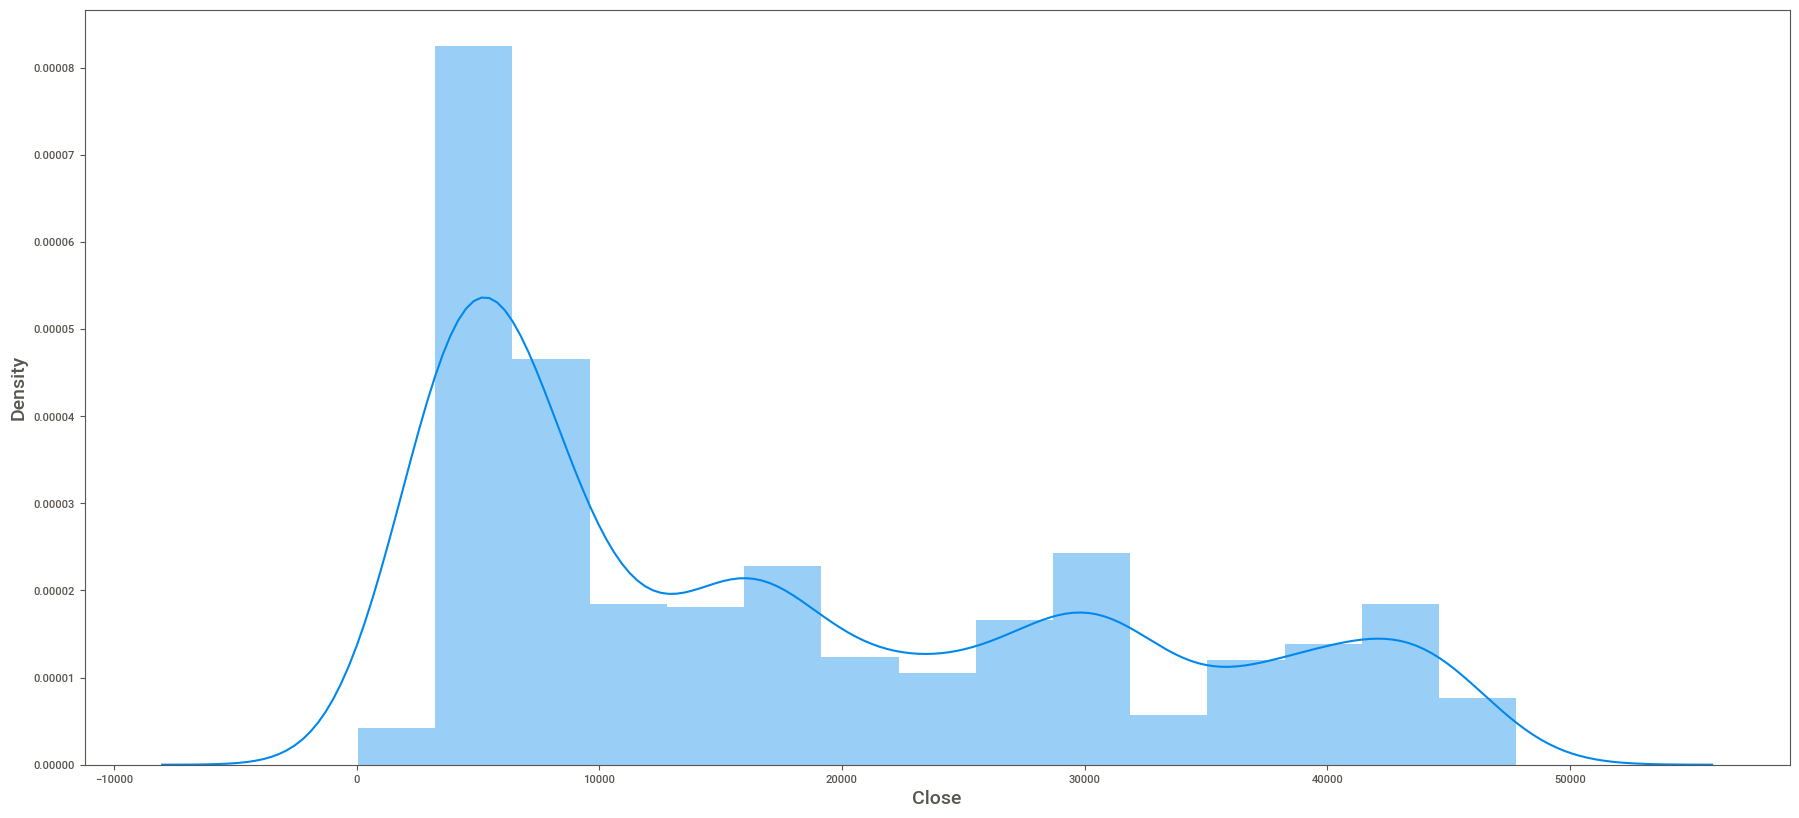

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


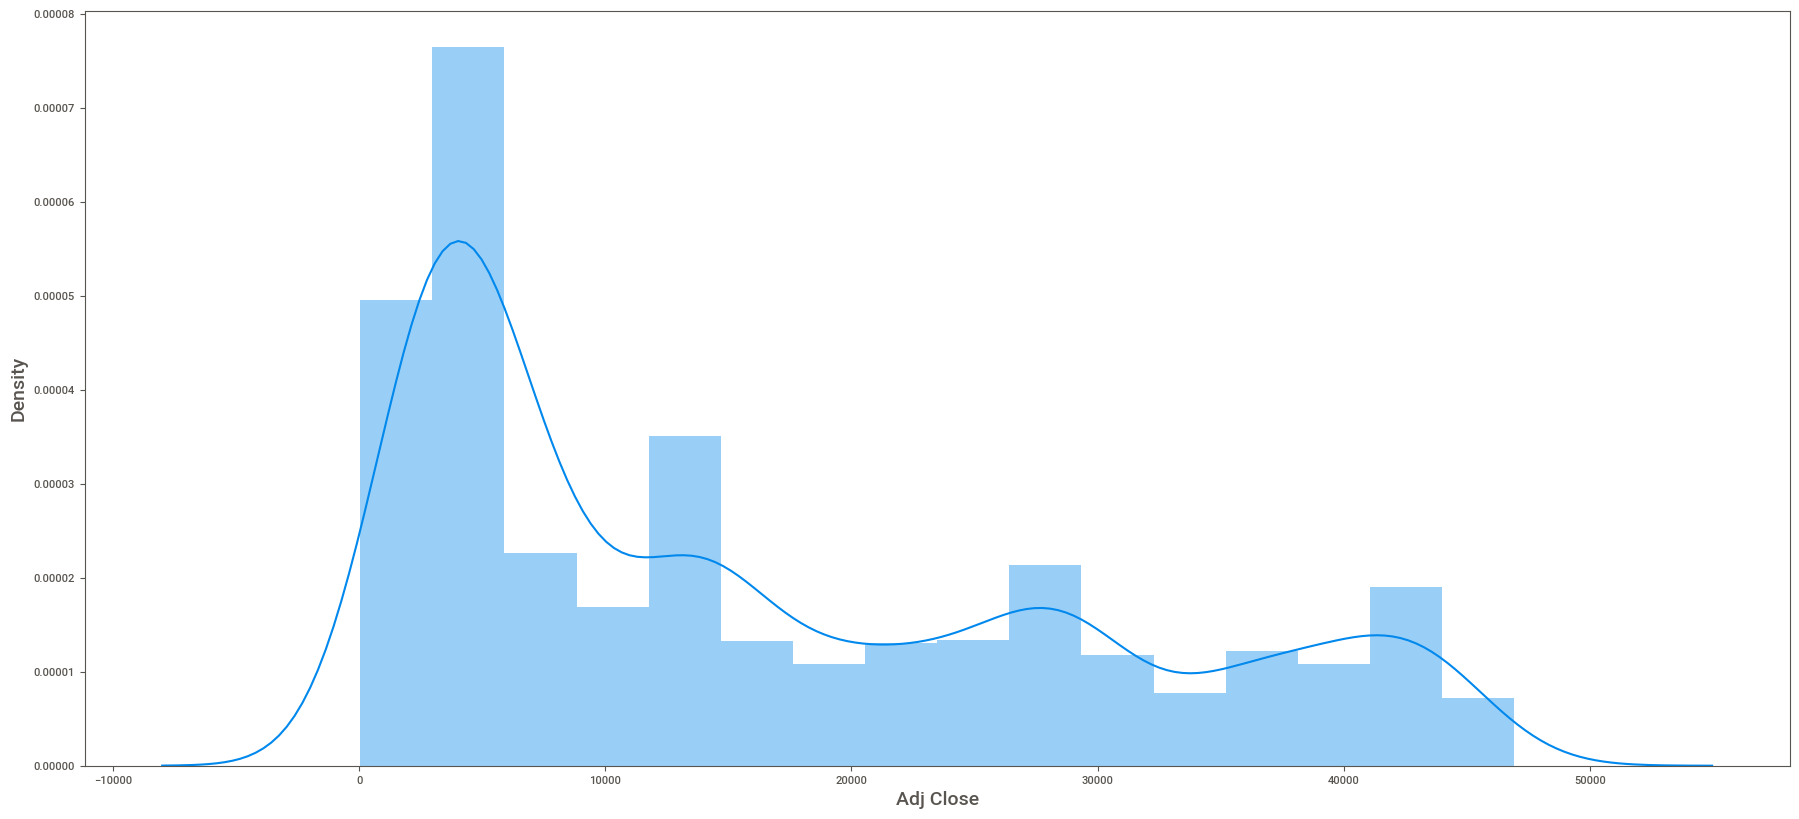

In [24]:
for columnname in columnnames:
  #print(unileverdata_df12[columnname].value_counts())
  plt.figure(figsize=(22,10))
  sns.distplot(unileverdata_df12[columnname])
  plt.show()

In [25]:
columnnames =list(unileverdata_df12.columns)

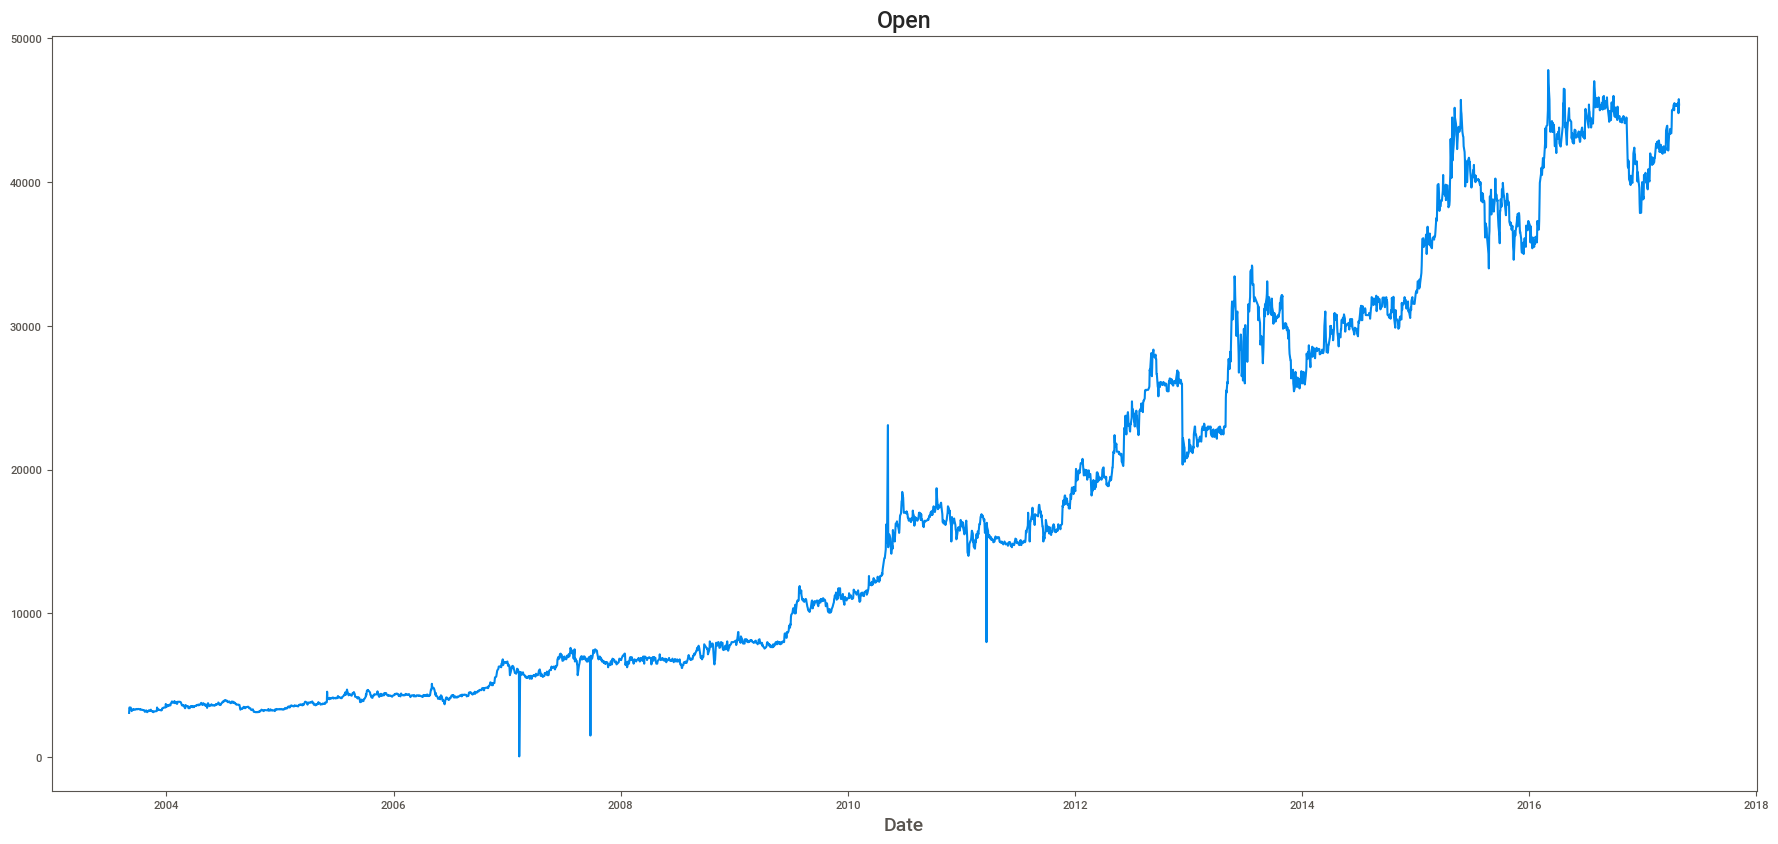

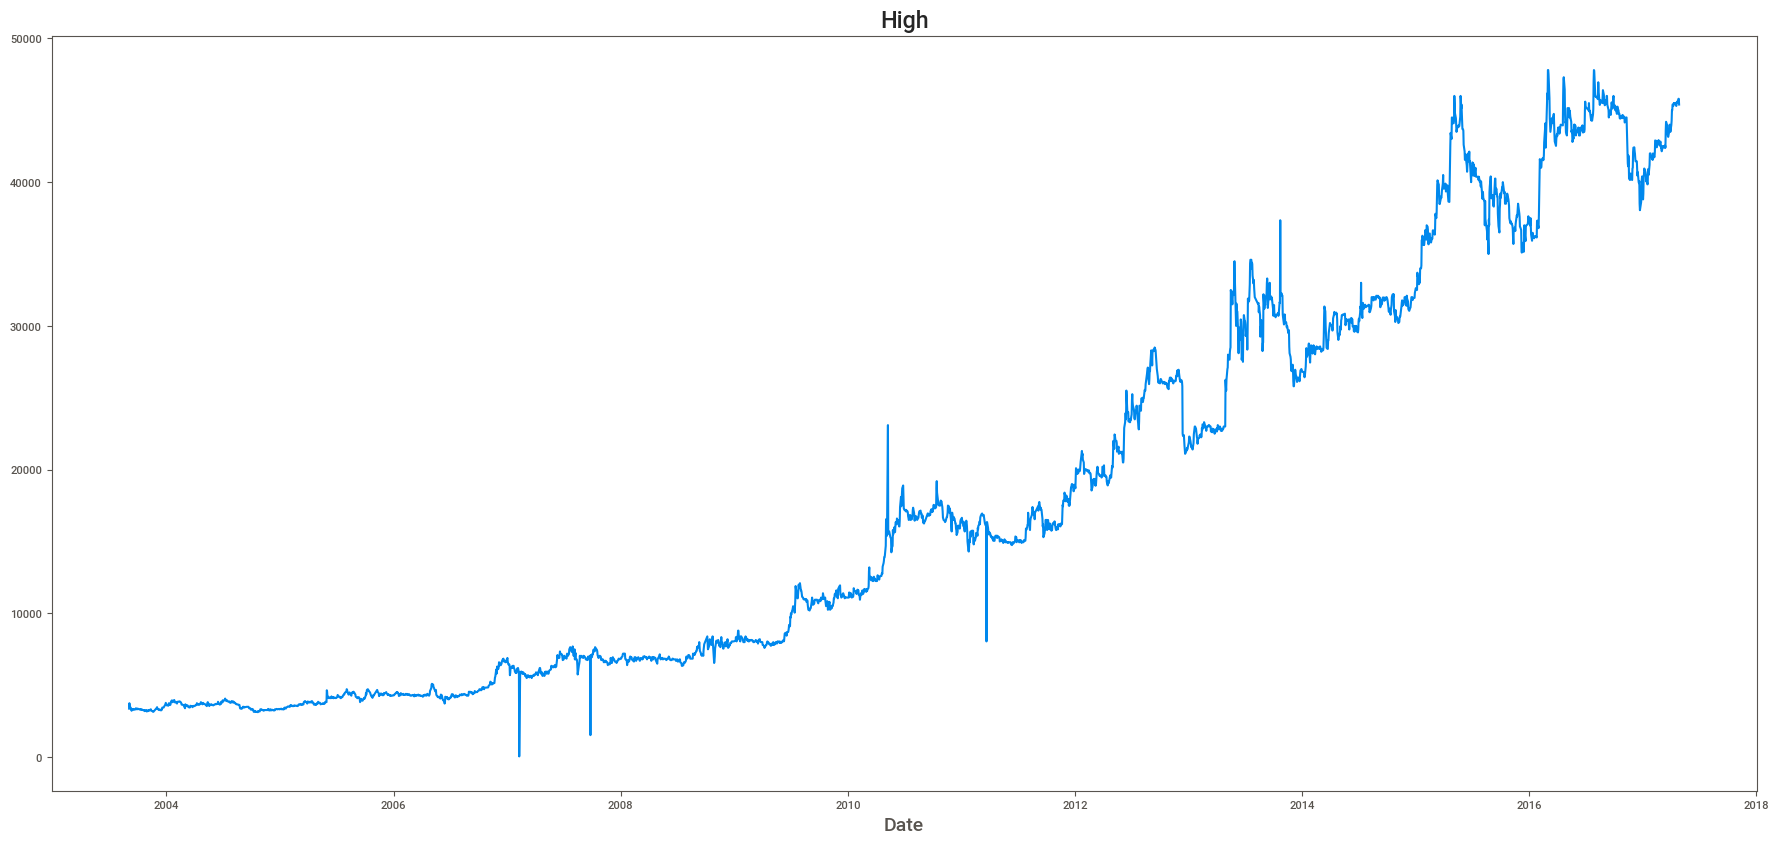

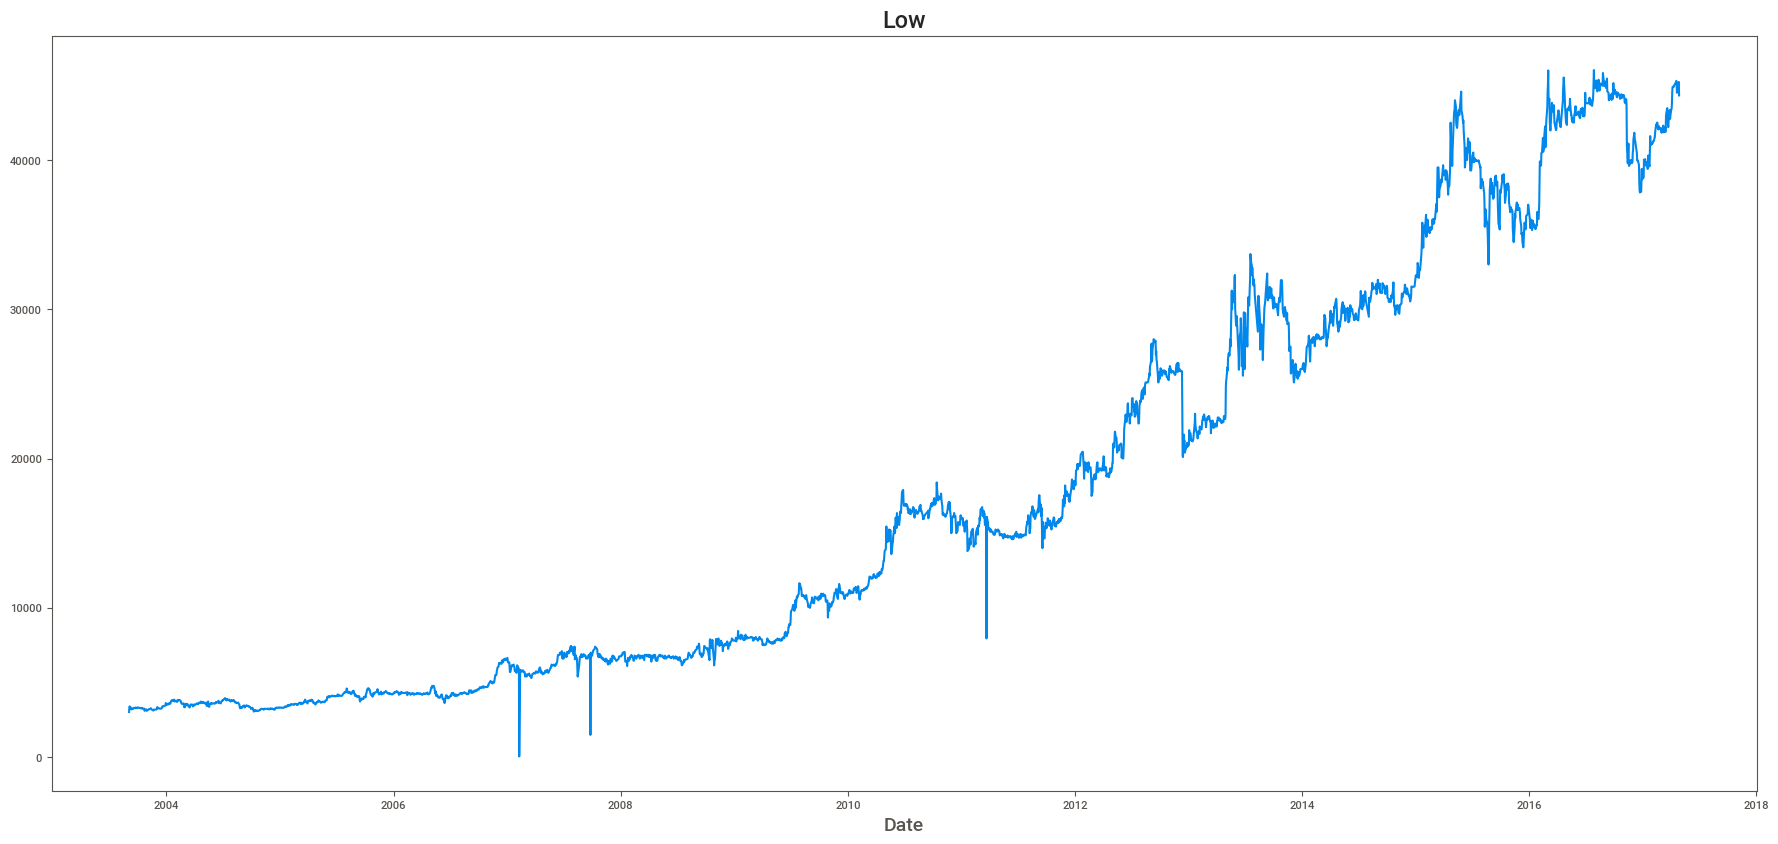

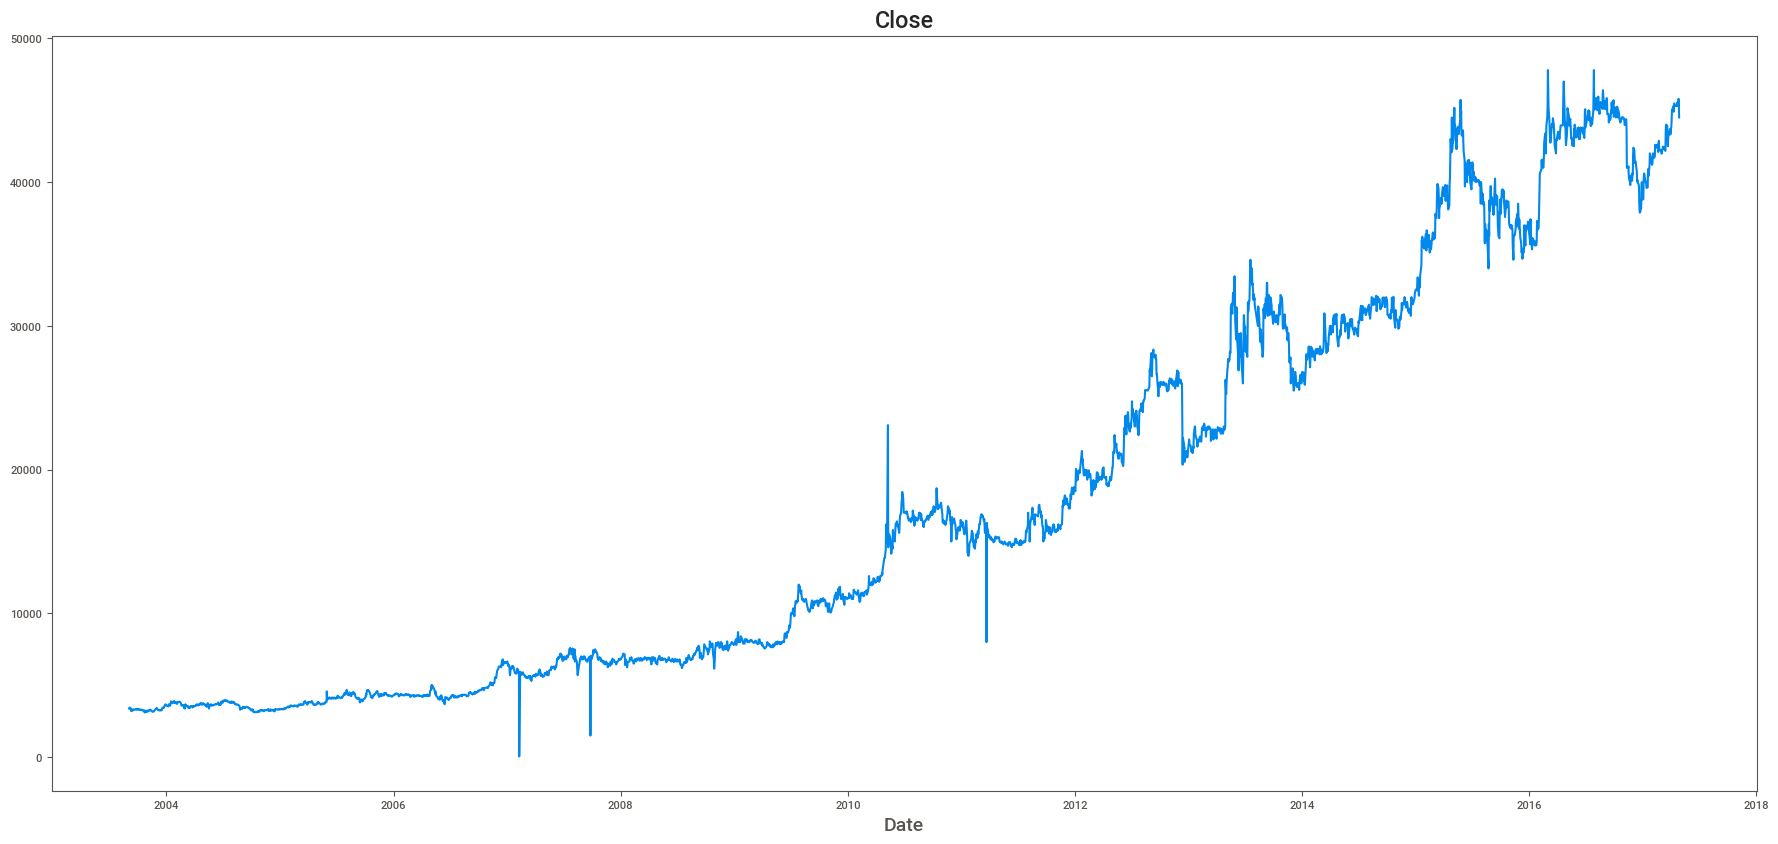

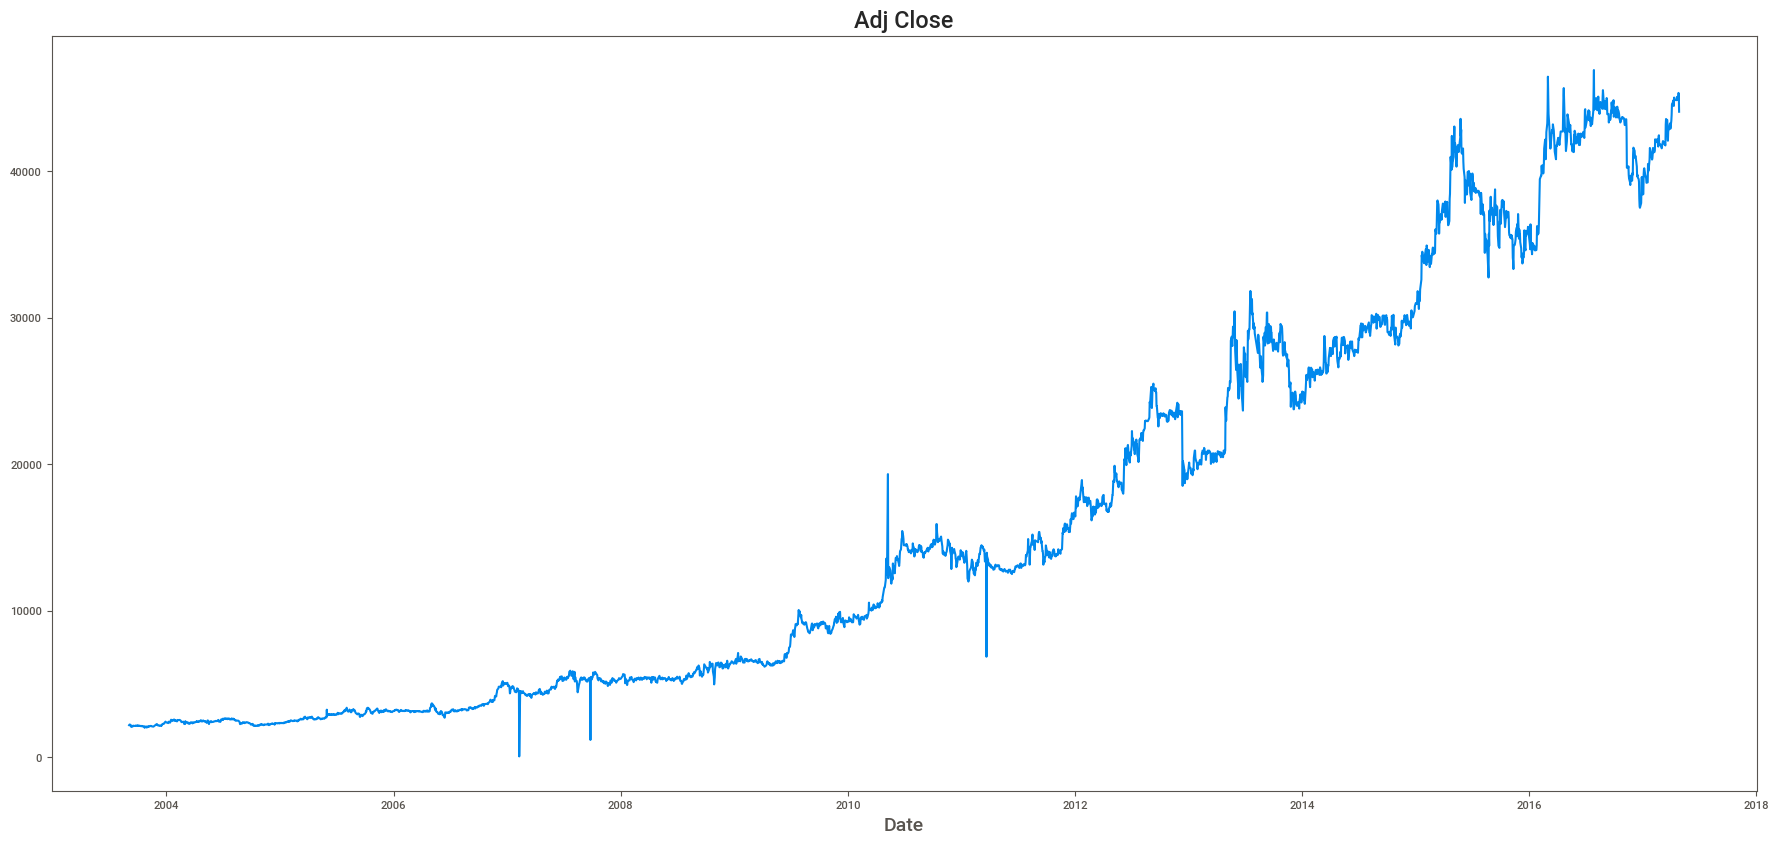

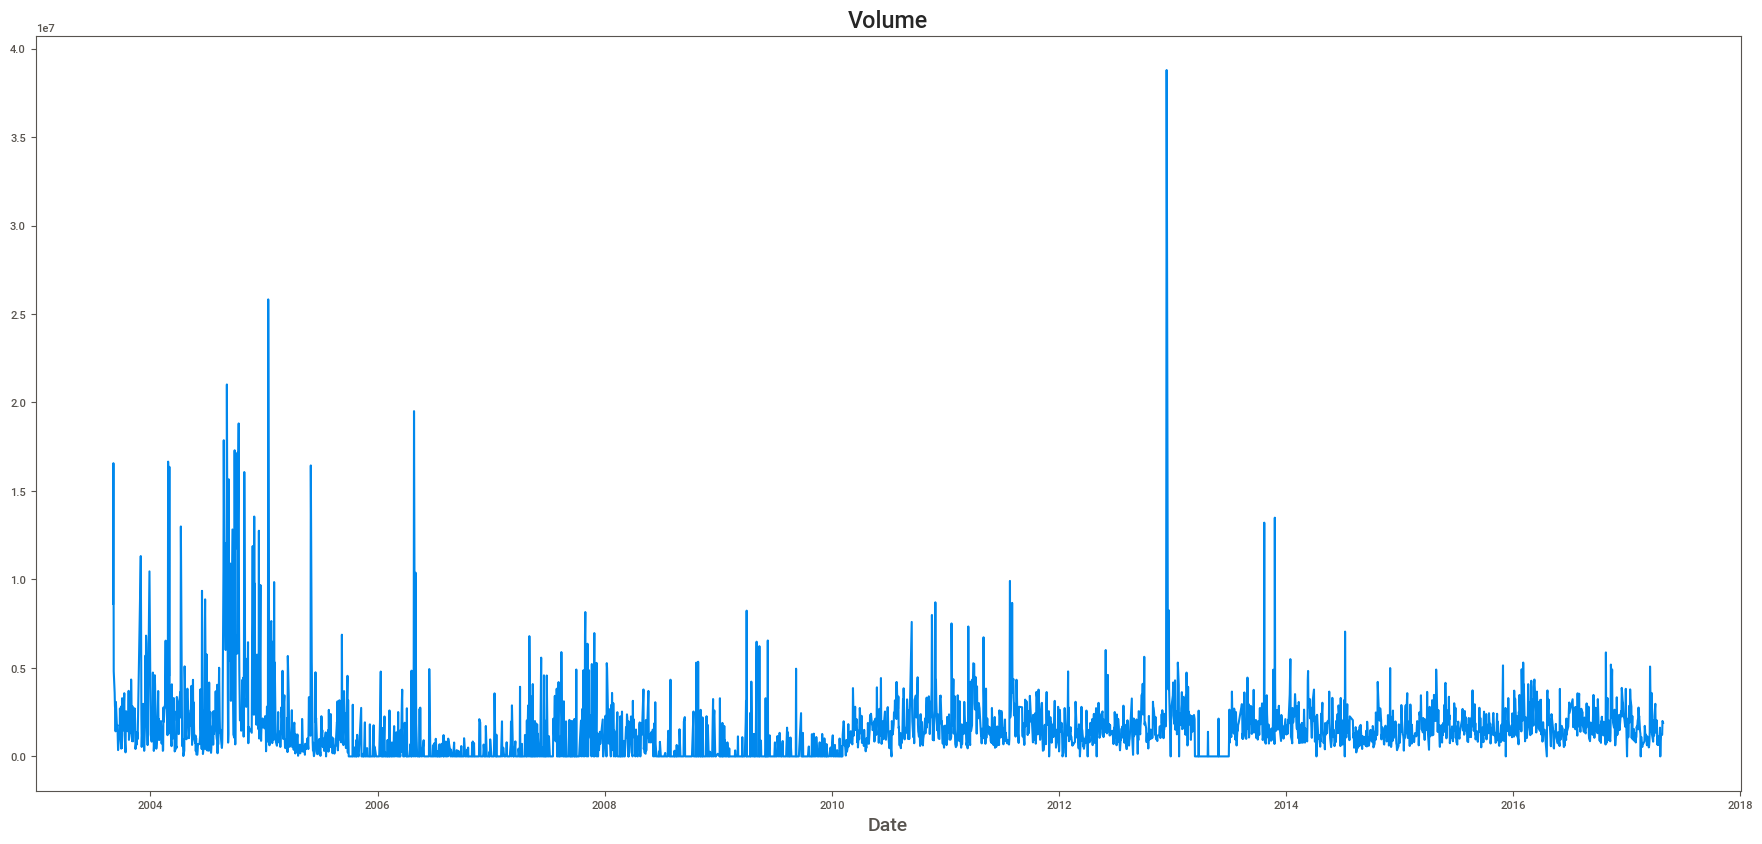

In [26]:
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  unileverdata_df12[columnname].plot()
  plt.title(columnname)
  plt.show()

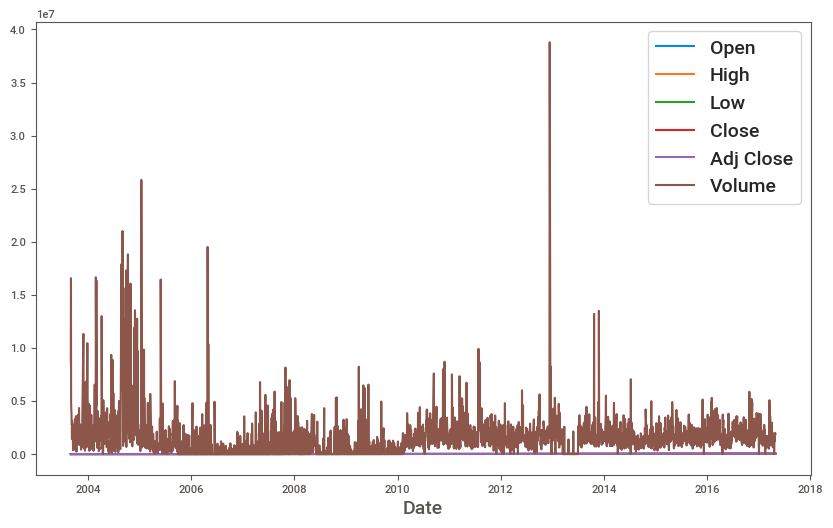

In [27]:
unileverdata_df12.plot()
plt.show()

## Investigating Missing Values

In [28]:
unileverdata_df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [29]:
unileverdata_df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj Close    False
Volume       False
dtype: bool

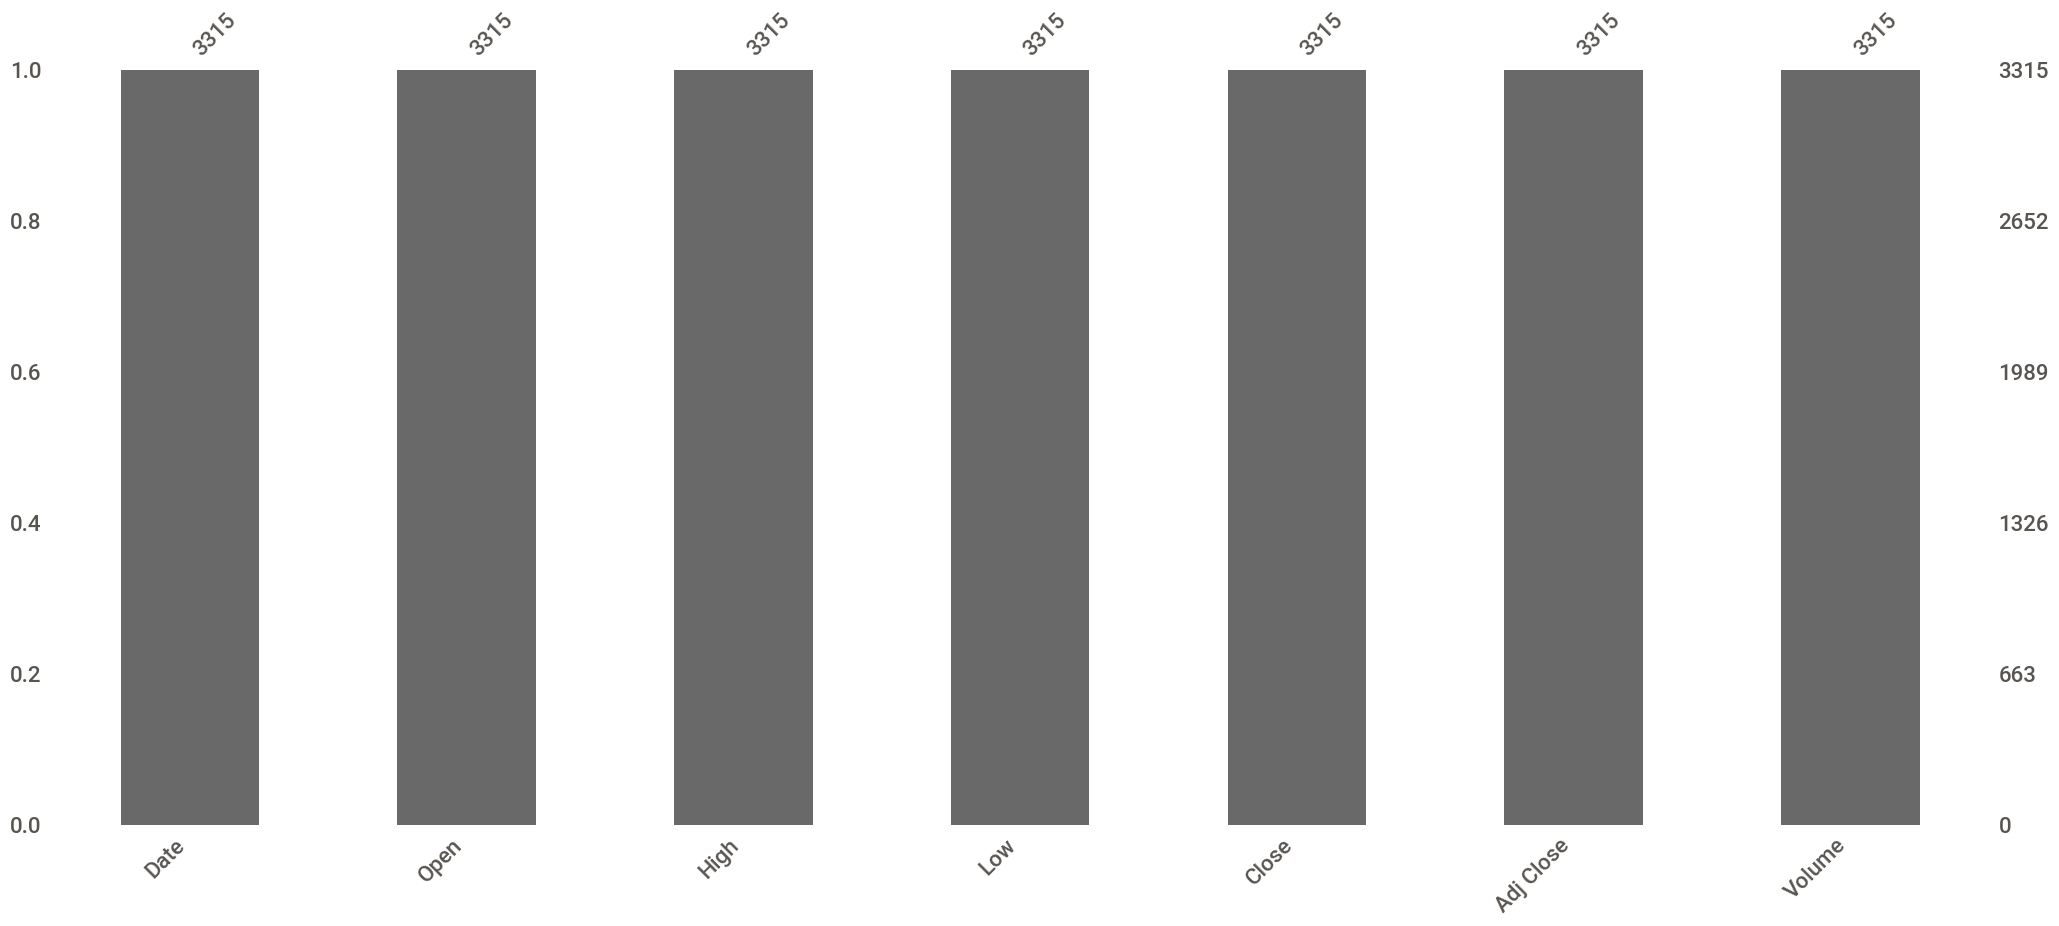

In [30]:
# Plot amount of missingness
msno.bar(unileverdata_df) # you can see pandas-profilin count part

plt.show()

#Data Preprocessing


*  Missing Value Treatment
*  Treating Outlier




## Missing Value Treatment

In [31]:
### Forward Fill
# Impute data DataFrame with ffill and bfill method
unileverdata_df_bfill_imputed = unileverdata_df.copy(deep=True)

unileverdata_df_bfill_imputed.fillna(method='ffill',inplace=True)
unileverdata_df_bfill_imputed.fillna(method='bfill',inplace=True)

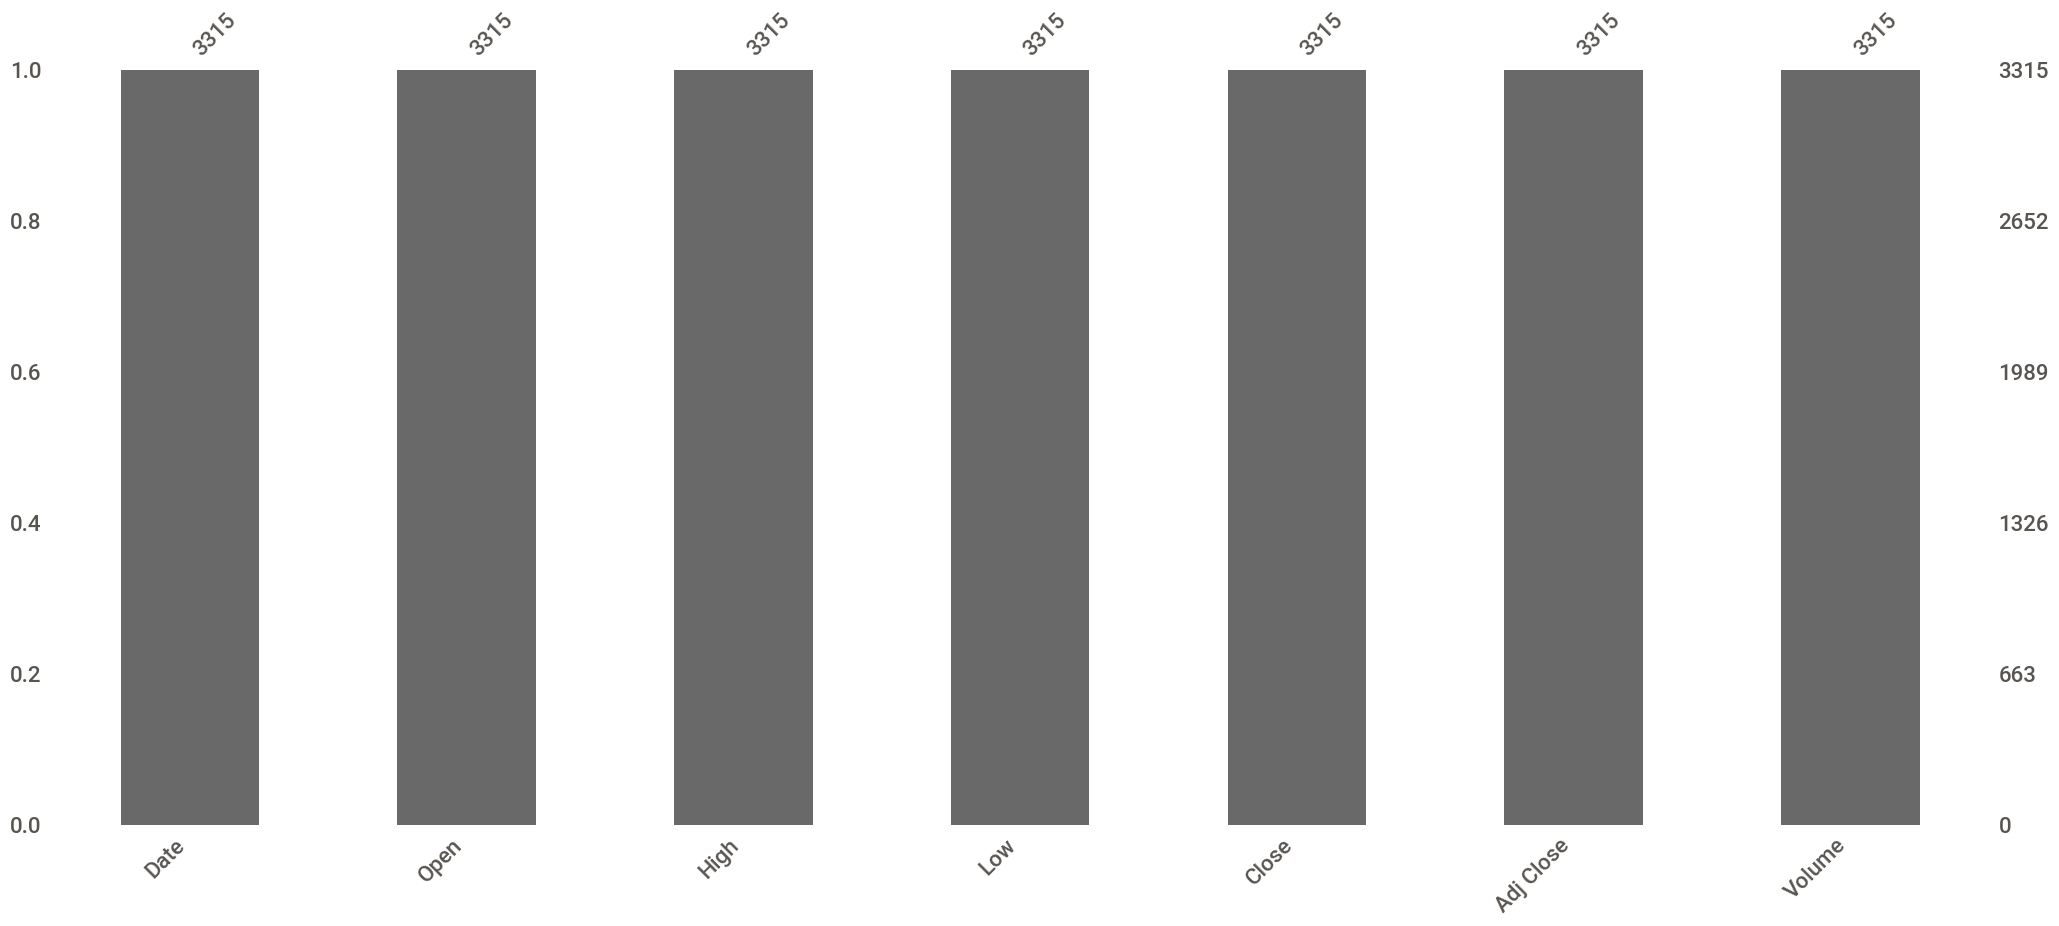

In [32]:
# Plot amount of missingness
msno.bar(unileverdata_df_bfill_imputed) # you can see pandas-profilin count part

plt.show()

In [33]:
unileverdata_df_bfill_imputed.head()

Date    Open    High     Low   Close    Adj Close    Volume
0  2003-09-03  3075.0  3375.0  3025.0  3375.0  2167.930664   8632500
1  2003-09-04  3450.0  3750.0  3375.0  3425.0  2200.048096  16570000
2  2003-09-05  3425.0  3500.0  3400.0  3450.0  2216.106934   4811000
3  2003-09-08  3450.0  3450.0  3325.0  3400.0  2183.989990   3601500
4  2003-09-09  3400.0  3400.0  3300.0  3325.0  2135.813477   2815000

## Convert timestemps and dataset index

In [34]:
unileverdata_df_bfill_imputed_transformed = unileverdata_df_bfill_imputed.copy(deep=True)
unileverdata_df_bfill_imputed_transformed.set_index('Date', inplace = True) #Set the date to the index
unileverdata_df_bfill_imputed_transformed.head(12)

Open    High     Low   Close    Adj Close    Volume
Date                                                             
2003-09-03  3075.0  3375.0  3025.0  3375.0  2167.930664   8632500
2003-09-04  3450.0  3750.0  3375.0  3425.0  2200.048096  16570000
2003-09-05  3425.0  3500.0  3400.0  3450.0  2216.106934   4811000
2003-09-08  3450.0  3450.0  3325.0  3400.0  2183.989990   3601500
2003-09-09  3400.0  3400.0  3300.0  3325.0  2135.813477   2815000
2003-09-10  3300.0  3300.0  3200.0  3200.0  2055.519531   2838000
2003-09-11  3200.0  3225.0  3200.0  3200.0  2055.519531   1417500
2003-09-12  3225.0  3350.0  3225.0  3300.0  2119.754150   3078500
2003-09-15  3300.0  3325.0  3225.0  3250.0  2087.636719   1827500
2003-09-16  3275.0  3325.0  3275.0  3325.0  2135.813477   1741000
2003-09-17  3350.0  3350.0  3300.0  3325.0  2135.813477   1778000
2003-09-18  3300.0  3300.0  3275.0  3300.0  2119.754150   1015000

In [35]:
columnnames=list(unileverdata_df_bfill_imputed_transformed.columns)
print(columnnames)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


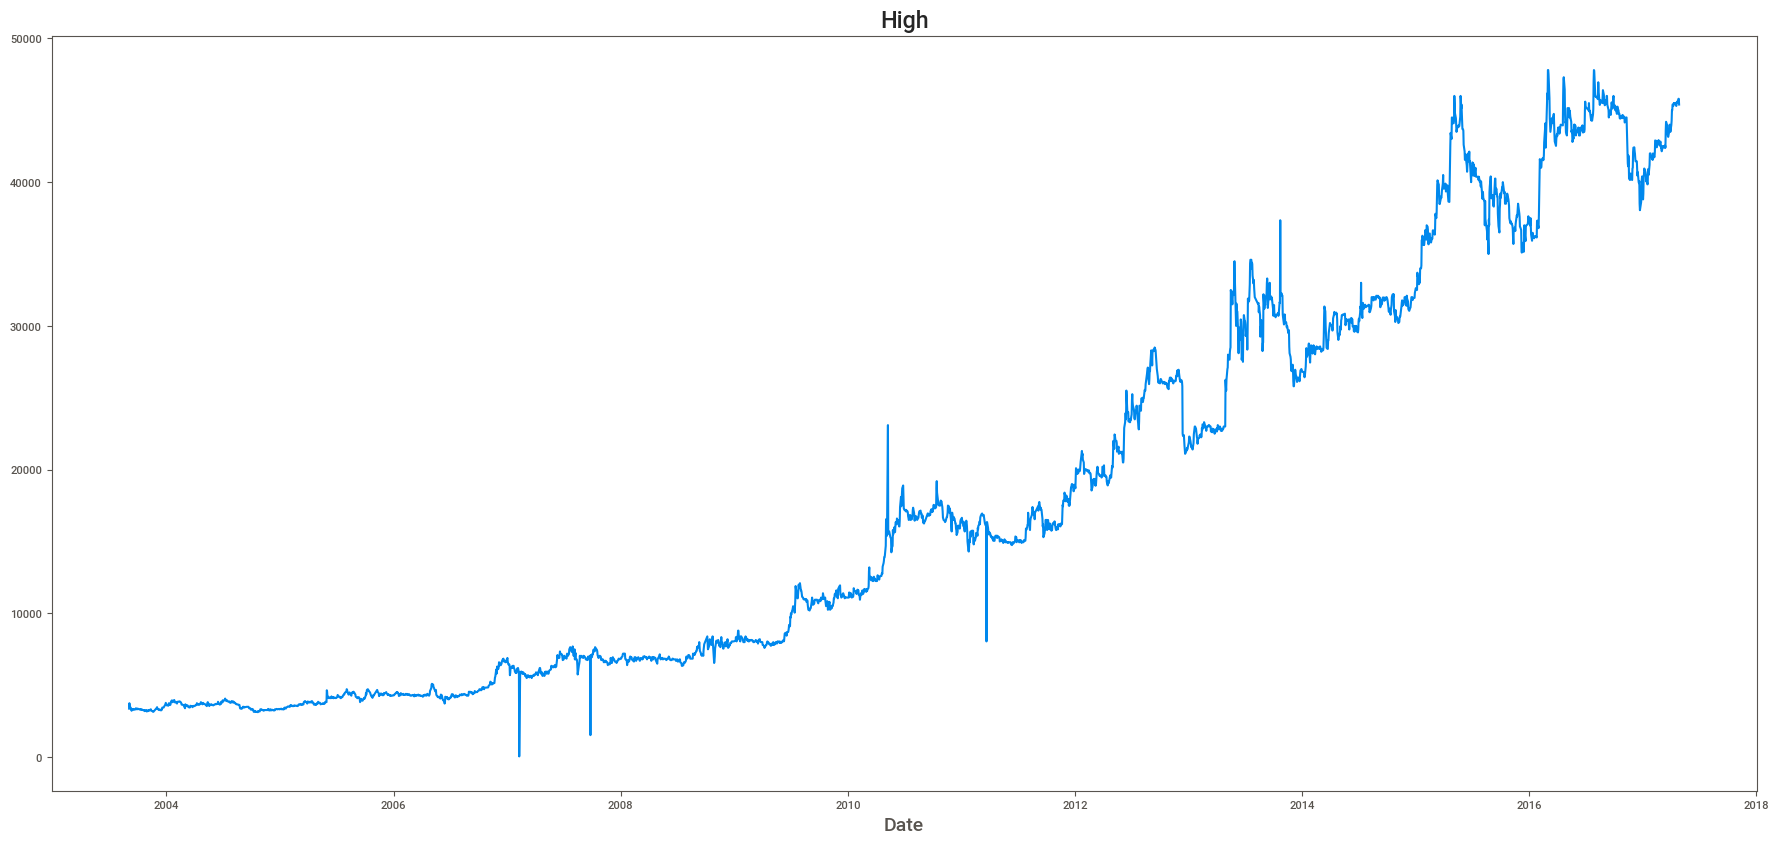

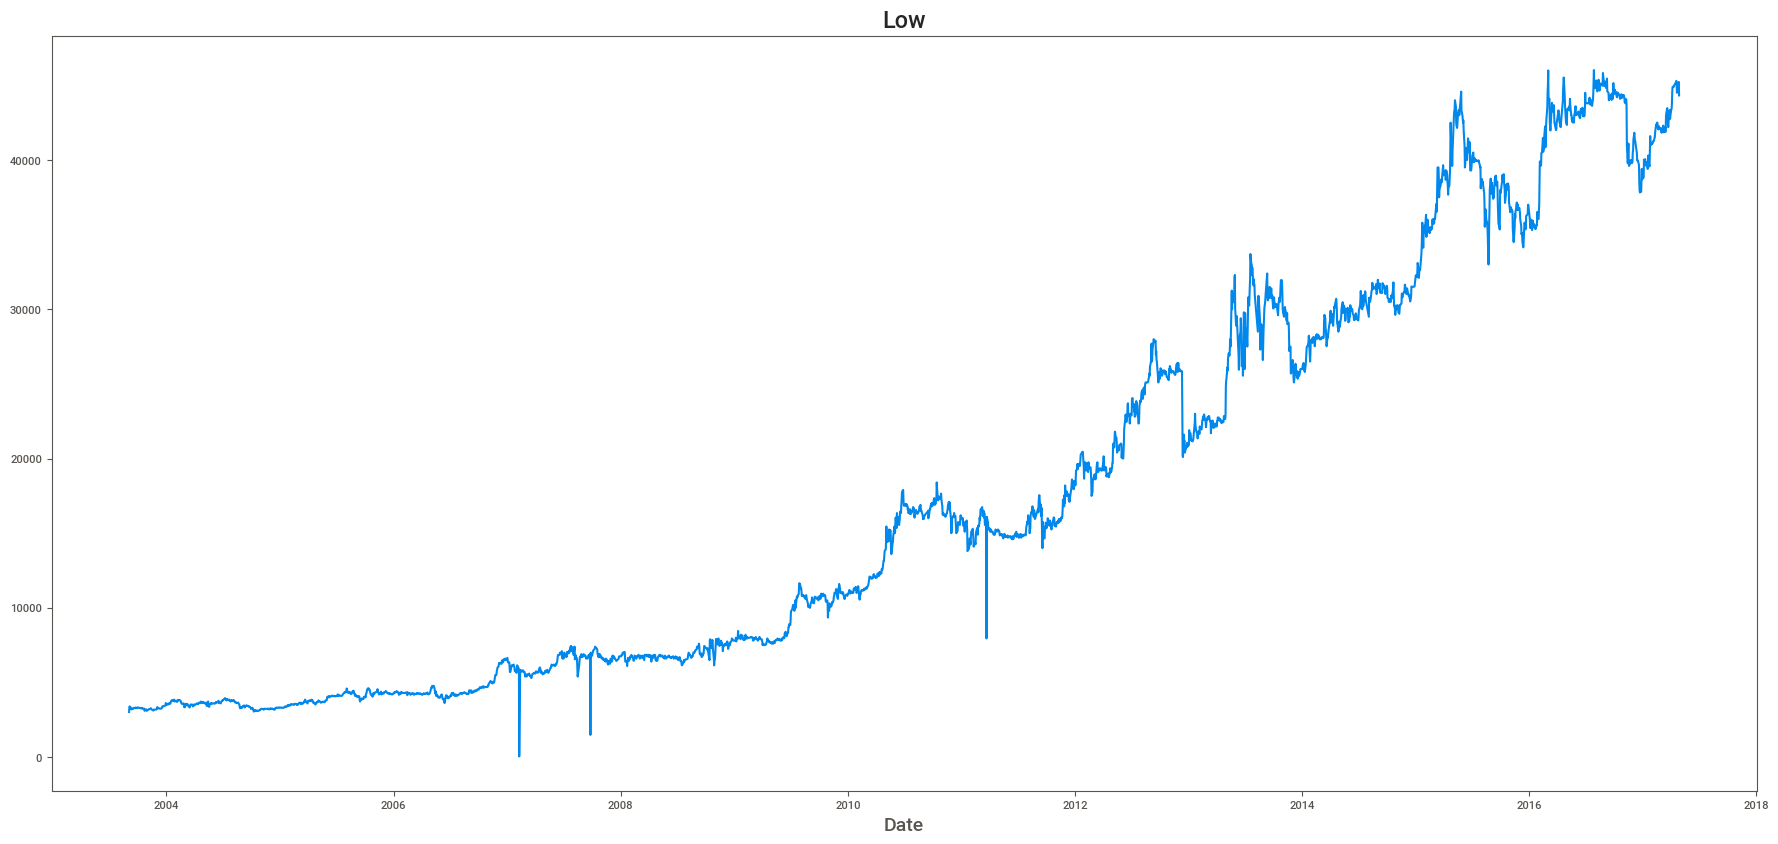

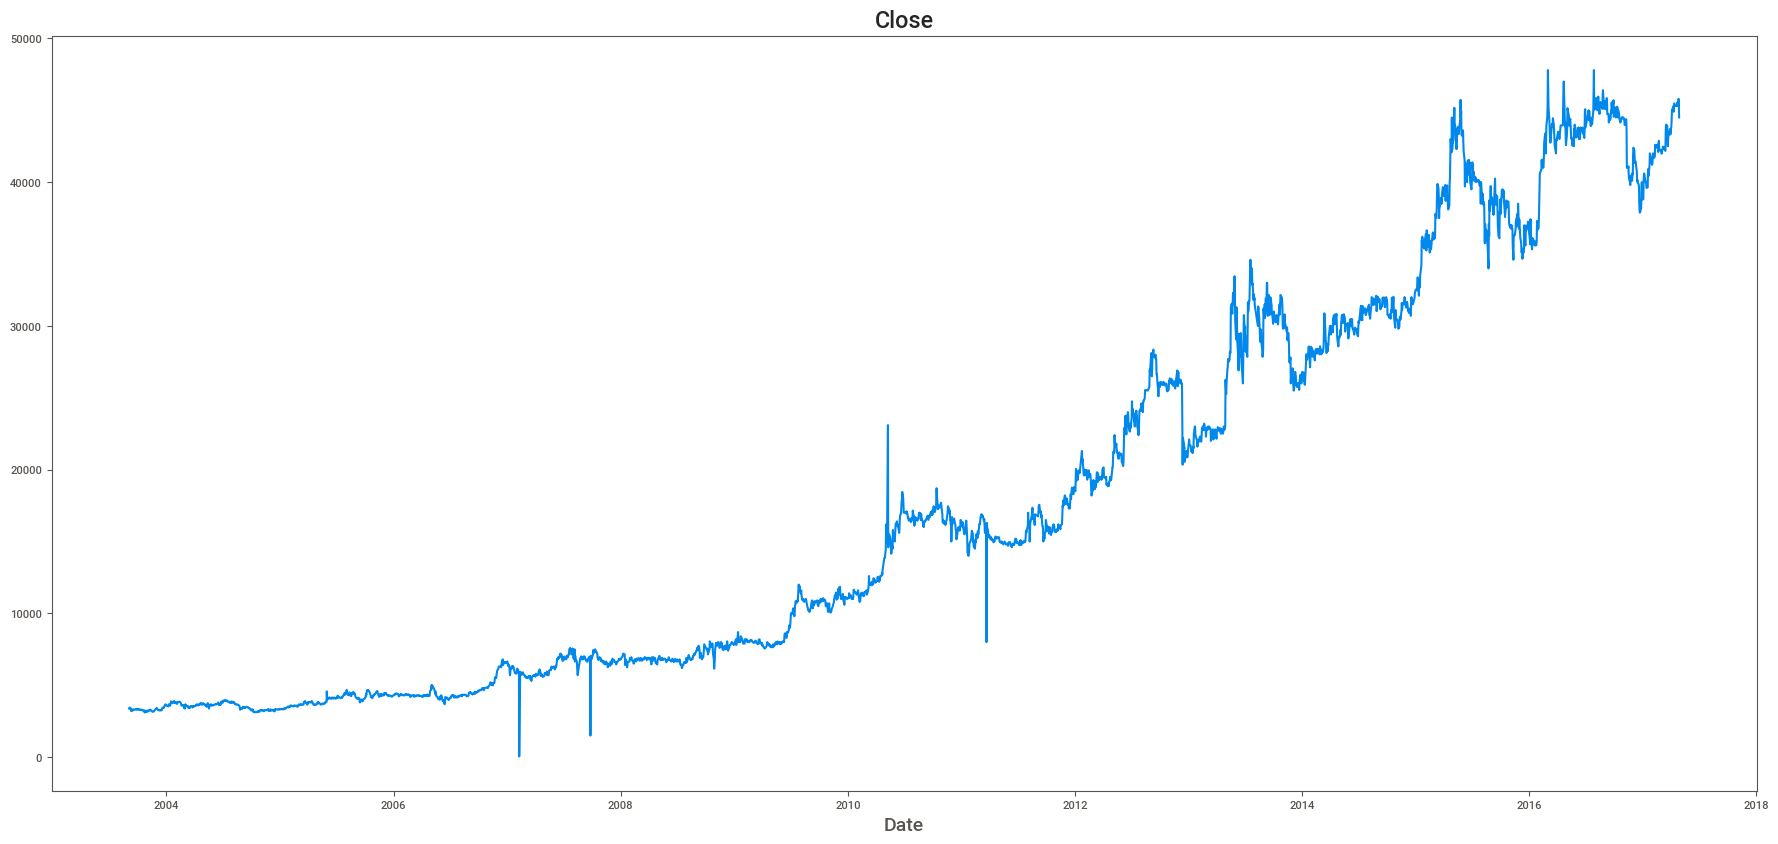

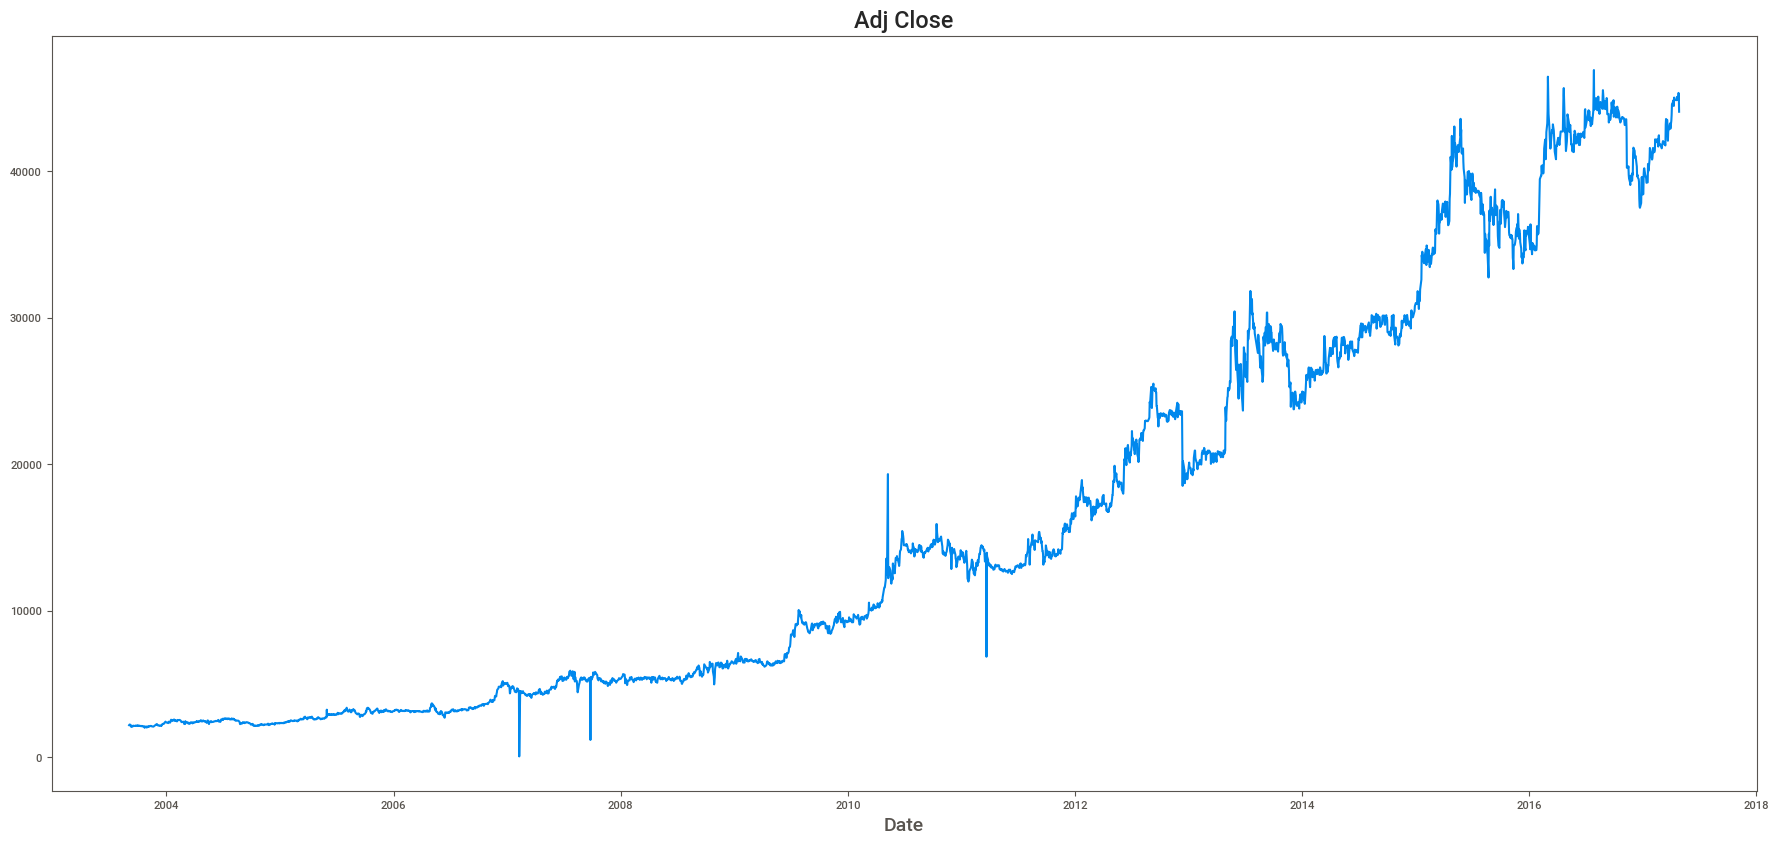

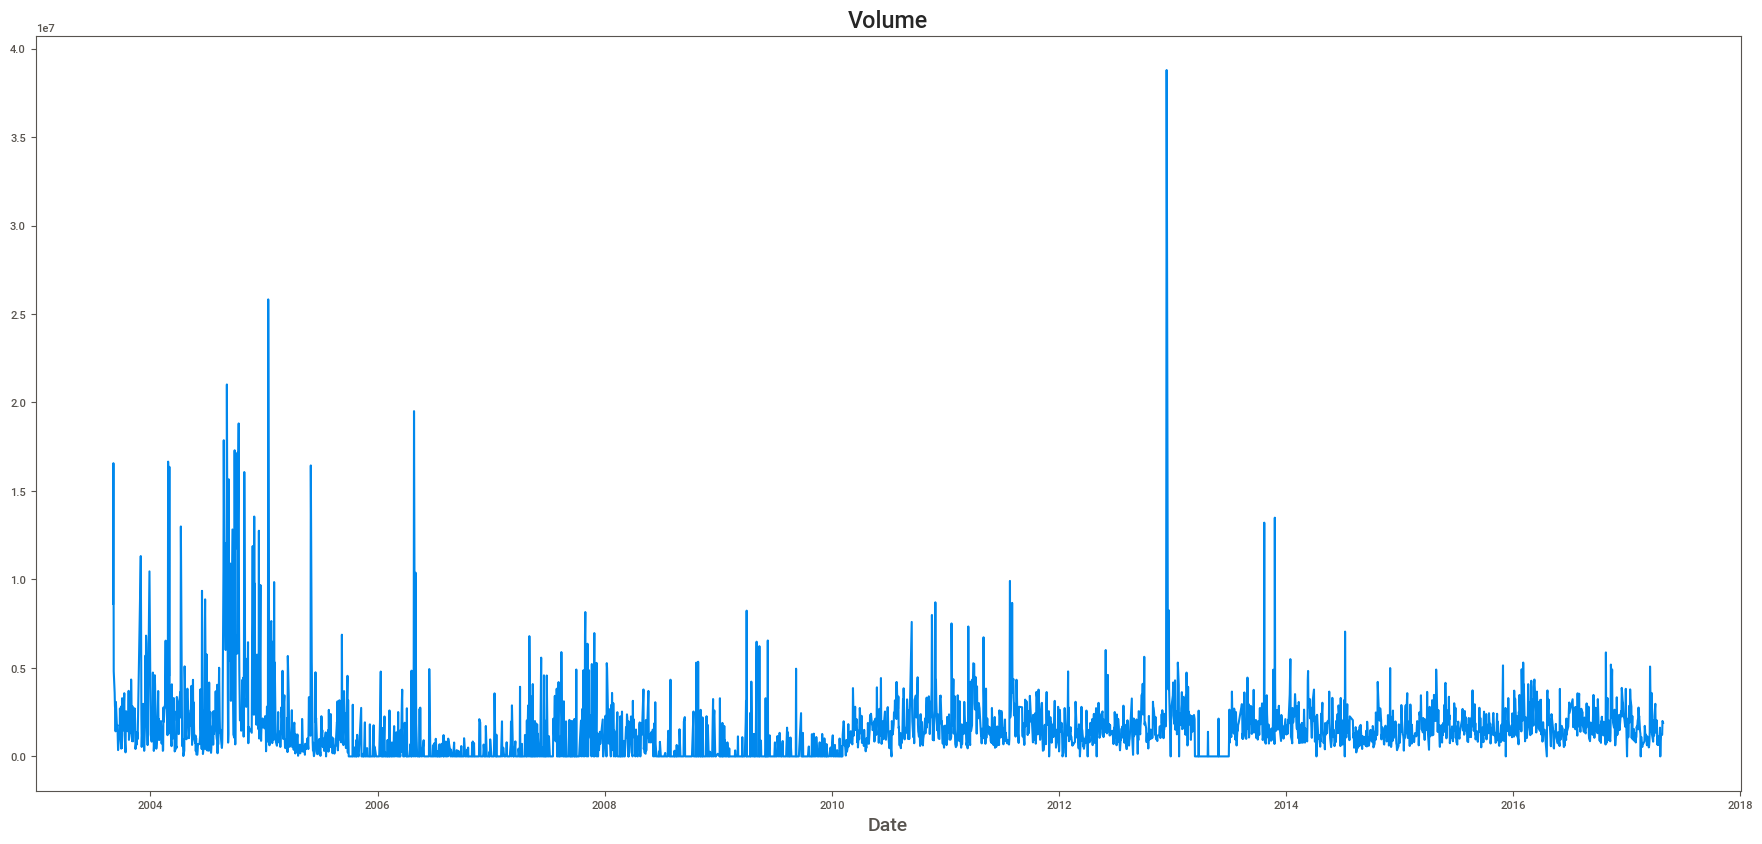

In [36]:
for columnname in columnnames[1:]:
  plt.figure(figsize=(22,10))
  unileverdata_df_bfill_imputed_transformed[columnname].plot()
  plt.title(columnname)
  plt.show()

In [37]:
ts = unileverdata_df_bfill_imputed_transformed

#Variables Selection
correlation matrix and heatmap
you can select  the Most correlated variables

Correlation Matrix                Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999681  0.999725  0.999650   0.998891  0.052641
High       0.999681  1.000000  0.999548  0.999778   0.998845  0.055745
Low        0.999725  0.999548  1.000000  0.999695   0.999062  0.050198
Close      0.999650  0.999778  0.999695  1.000000   0.999205  0.052550
Adj Close  0.998891  0.998845  0.999062  0.999205   1.000000  0.053387
Volume     0.052641  0.055745  0.050198  0.052550   0.053387  1.000000


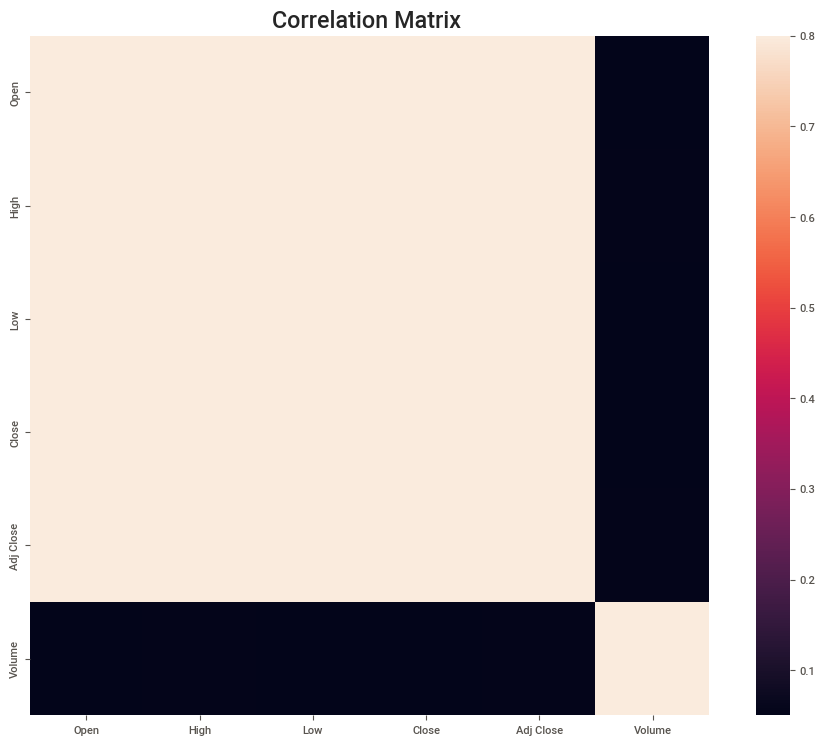

cols Index(['Volume', 'High', 'Adj Close', 'Open', 'Close', 'Low'], dtype='object')


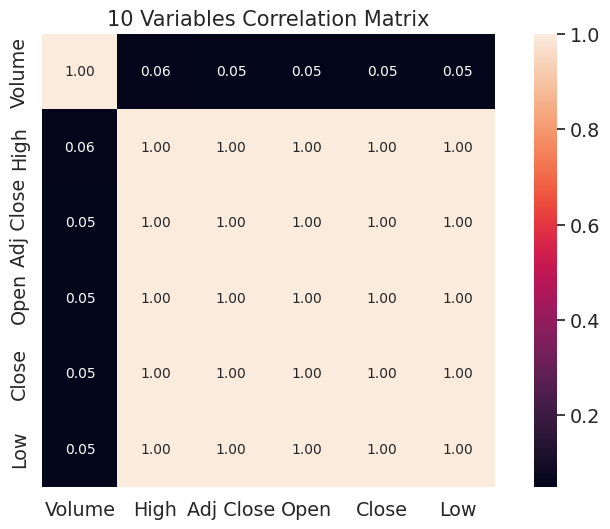

  Most Correlated Features
0                   Volume
1                     High
2                Adj Close
3                     Open
4                    Close
5                      Low


In [38]:
# Correlation Matrix Heatmap
corrmat = unileverdata_df_bfill_imputed.corr()
print("Correlation Matrix",corrmat)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.title('Correlation Matrix ')
plt.show()
# Top 10 Heatmap
k = 10  # number of variables for heatmap
cols = corrmat.nlargest(k, 'Volume')['Volume'].index
print("cols", cols)
cm = np.corrcoef(unileverdata_df_bfill_imputed[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                         yticklabels=cols.values, xticklabels=cols.values)
plt.title('10 Variables Correlation Matrix')
plt.show()
most_corr = pd.DataFrame(cols)
most_corr.columns = ['Most Correlated Features']
print(most_corr)
corrs = most_corr.values

In [39]:
most_corr_list=list(most_corr["Most Correlated Features"])

print(most_corr_list)


['Volume', 'High', 'Adj Close', 'Open', 'Close', 'Low']


In [40]:
ts.head()

Open    High     Low   Close    Adj Close    Volume
Date                                                             
2003-09-03  3075.0  3375.0  3025.0  3375.0  2167.930664   8632500
2003-09-04  3450.0  3750.0  3375.0  3425.0  2200.048096  16570000
2003-09-05  3425.0  3500.0  3400.0  3450.0  2216.106934   4811000
2003-09-08  3450.0  3450.0  3325.0  3400.0  2183.989990   3601500
2003-09-09  3400.0  3400.0  3300.0  3325.0  2135.813477   2815000

In [41]:
#ts = ts.drop("Date",axis=1)

#Data Transformation



*   Convert timestemps and dataset into time series
*   Split data into traing and testing with ratio of 0.2



In [42]:
c=ts.size
idd=c/2
idd=int(idd)

In [43]:
train_data= ts[:int(0.5*(len(ts)))]
test_data = ts[int(0.5*(len(ts))):]

In [44]:
train_data.shape

(1657, 6)

In [45]:
test_data.shape

(1658, 6)


# Forecasting





## ARIMA

### for "Open"

In [46]:
data=train_data['Open']

In [47]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Open'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.Open   No. Observations:                 1656
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12108.254
Method:                       css-mle   S.D. of innovations            362.366
Date:                Tue, 10 May 2022   AIC                          24224.508
Time:                        19:08:04   BIC                          24246.157
Sample:                             1   HQIC                         24232.533
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.2135      3.379      2.431      0.015       1.591      14.836
ar.L1.D.Open    -0.0527      0.039     -1.341      0.180      -0.130       0.024
ma.L1.D.Open    -0.6009      0.032    -18.908      0.000      -0.663      -0.539
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -18.9697           +0.0000j           18.9697            0.5000
MA.1            1.6642           +0.0000j            1.6642            0.0000
-----------------------------------------------------------------------------
"""

In [48]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                  
2003-09-04  366.786517
2003-09-05  140.421853
2003-09-08   91.170510
2003-09-09   -4.410971
2003-09-10 -113.900593

<Figure size 2200x1000 with 0 Axes>

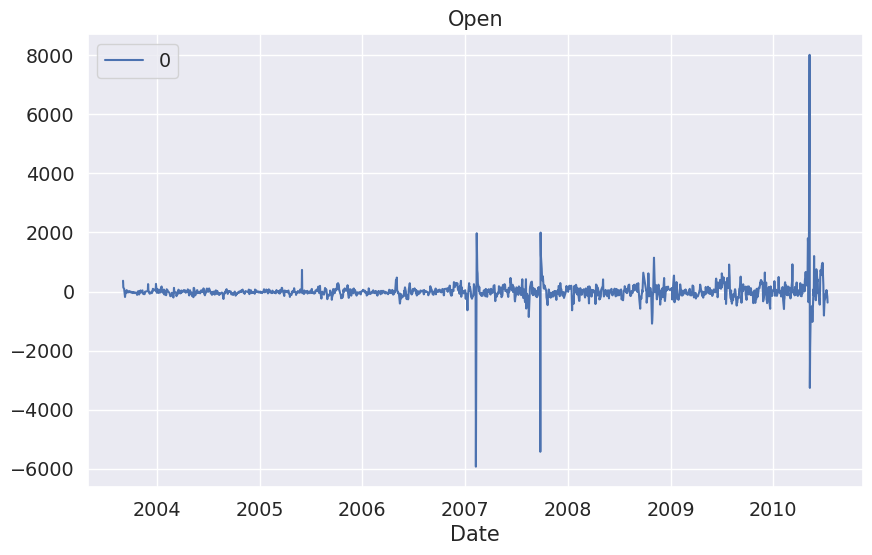

In [49]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Open')
plt.show()

In [50]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=unileverdata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2010-07-14    16894.949961
2010-07-15    16890.683727
2010-07-16    16899.555087
2010-07-19    16907.733890
2010-07-20    16915.949202
                  ...     
2017-04-21    30459.983140
2017-04-25    30468.196624
2017-04-26    30476.410107
2017-04-27    30484.623590
2017-04-28    30492.837074
Length: 1658, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


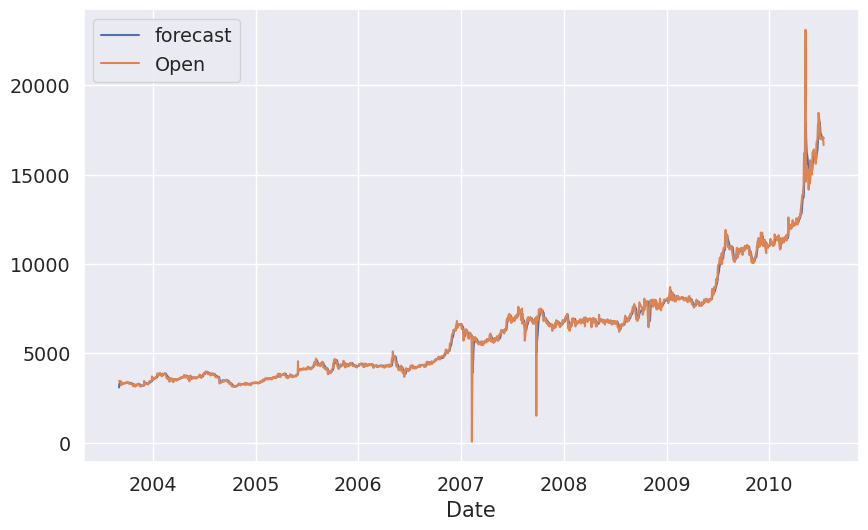

In [51]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [52]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Open'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Open'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['Open'])



MSE: 69216566.04659992


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9937559563231276,
 'corr': 0.9629151527331546,
 'mae': 6595.118189473786,
 'mape': 0.19849035694537664,
 'me': -5516.399821006373,
 'minmax': 0.1928531183763631,
 'mpe': -0.12985833610841835,
 'rmse': 8319.64939445166}

In [53]:
modelo2=ARIMA(train_data['Open'],order=(1,1,1))
modelo2=modelo2.fit()
unileverdata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

In [54]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2017-04-29',end='2017-06-08')
#print(index_future_dates)
predmo2=modelo2.predict(start=1,end=41,typ='levels').rename('ARIMA 40 Day Prediction')
predmo2.index=index_future_dates
print(predmo2)

2017-04-29    3083.213483
2017-04-30    3284.578147
2017-05-01    3358.829490
2017-05-02    3404.410971
2017-05-03    3413.900593
2017-05-04    3382.062210
2017-05-05    3323.147538
2017-05-06    3291.272270
2017-05-07    3299.449339
2017-05-08    3299.654967
2017-05-09    3324.441074
2017-05-10    3325.968838
2017-05-11    3324.251183
2017-05-12    3323.219073
2017-05-13    3331.258406
2017-05-14    3337.407162
2017-05-15    3349.761487
2017-05-16    3349.843626
2017-05-17    3348.575093
2017-05-18    3356.472339
2017-05-19    3362.535716
2017-05-20    3366.179222
2017-05-21    3359.709107
2017-05-22    3354.503298
2017-05-23    3351.375108
2017-05-24    3340.835854
2017-05-25    3341.844397
2017-05-26    3335.108812
2017-05-27    3329.743483
2017-05-28    3326.519436
2017-05-29    3315.922581
2017-05-30    3308.236999
2017-05-31    3303.618703
2017-06-01    3292.184038
2017-06-02    3283.995013
2017-06-03    3261.755171
2017-06-04    3228.436357
2017-06-05    3231.757709
2017-06-06  

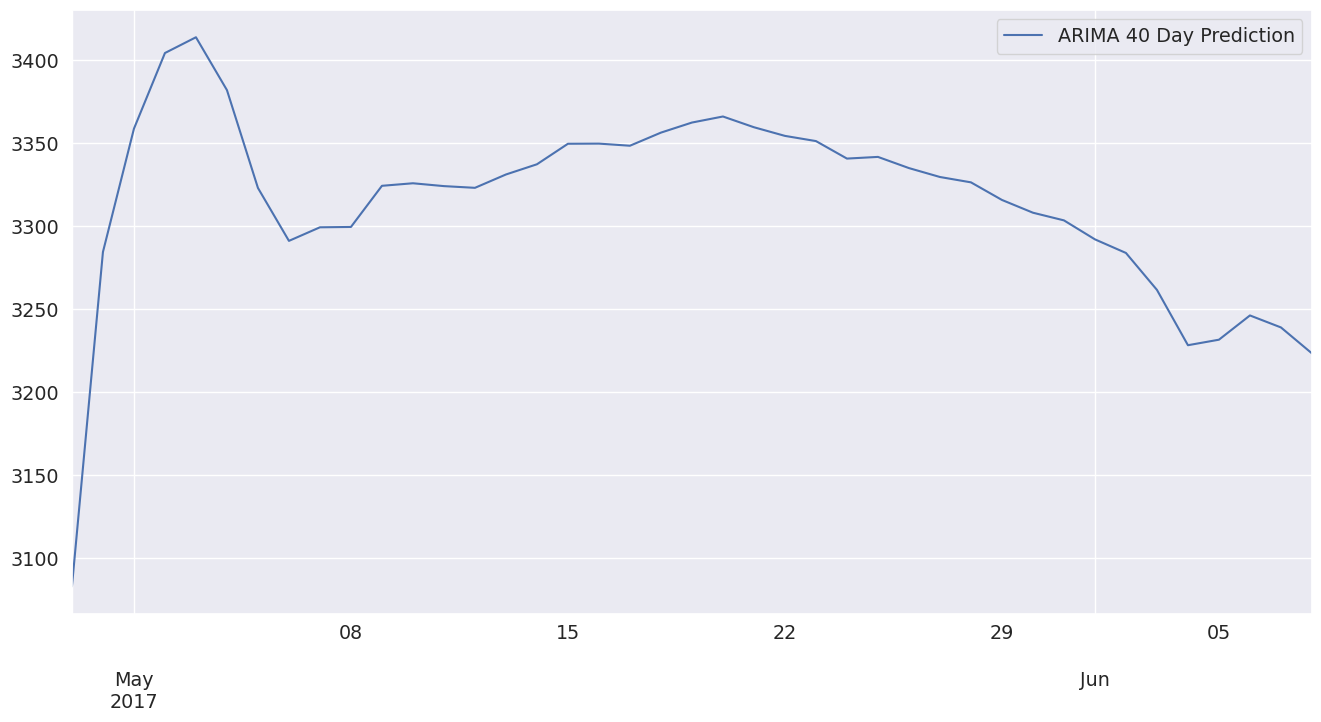

In [55]:
# ploting the prediction
predmo2.plot(figsize=(16,8),legend=True)


### For "High"

In [56]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['High'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                 D.High   No. Observations:                 1656
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12092.951
Method:                       css-mle   S.D. of innovations            359.044
Date:                Tue, 10 May 2022   AIC                          24193.903
Time:                        19:08:07   BIC                          24215.551
Sample:                             1   HQIC                         24201.928
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            8.2164      3.774      2.177      0.030       0.820      15.612
ar.L1.D.High    -0.0358      0.044     -0.815      0.415      -0.122       0.050
ma.L1.D.High    -0.5573      0.037    -14.968      0.000      -0.630      -0.484
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -27.9127           +0.0000j           27.9127            0.5000
MA.1            1.7943           +0.0000j            1.7943            0.0000
-----------------------------------------------------------------------------
"""

In [57]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                  
2003-09-04  366.783585
2003-09-05  -93.910051
2003-09-08 -115.888050
2003-09-09 -123.422309
2003-09-10 -178.606997

<Figure size 2200x1000 with 0 Axes>

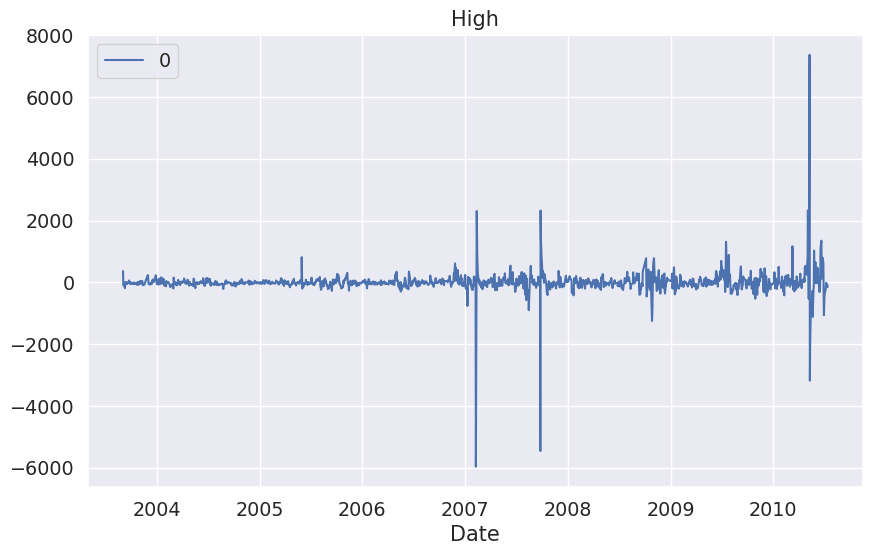

In [58]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('High')
plt.show()

In [59]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=unileverdata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2010-07-14    17096.085074
2010-07-15    17101.153510
2010-07-16    17109.482704
2010-07-19    17117.695079
2010-07-20    17125.911639
                  ...     
2017-04-21    30674.780243
2017-04-25    30682.996658
2017-04-26    30691.213073
2017-04-27    30699.429488
2017-04-28    30707.645903
Length: 1658, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


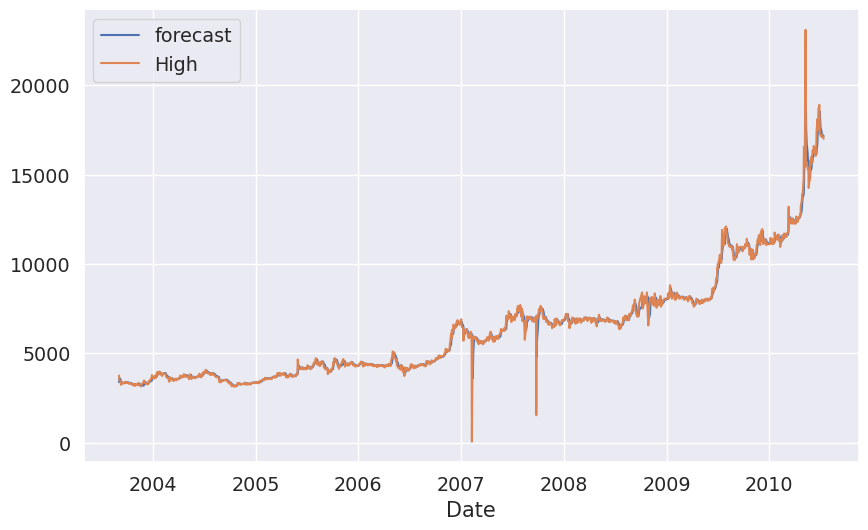

In [60]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['High'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['High'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['High'])

MSE: 71803047.78359091


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9944829360330476,
 'corr': 0.9612331687051164,
 'mae': 6730.4457555218105,
 'mape': 0.2002385023431798,
 'me': -5648.687274129421,
 'minmax': 0.1946470319343232,
 'mpe': -0.13212429817340868,
 'rmse': 8473.667906142586}

In [62]:
modelh2=ARIMA(train_data['High'],order=(1,1,1))
modelh2=modelh2.fit()
unileverdata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

In [63]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2017-04-29',end='2017-06-08')
#print(index_future_dates)
predmh2=modelh2.predict(start=1,end=41,typ='levels').rename('ARIMA 40 Day Prediction')
predmh2.index=index_future_dates
print(predmh2)

2017-04-29    3383.216415
2017-04-30    3593.910051
2017-05-01    3565.888050
2017-05-02    3523.422309
2017-05-03    3478.606997
2017-05-04    3411.420323
2017-05-05    3340.025475
2017-05-06    3348.474583
2017-05-07    3347.488686
2017-05-08    3346.044164
2017-05-09    3355.410431
2017-05-10    3341.183962
2017-05-11    3331.463859
2017-05-12    3336.217635
2017-05-13    3339.762711
2017-05-14    3372.251724
2017-05-15    3372.703649
2017-05-16    3360.993145
2017-05-17    3373.913024
2017-05-18    3382.904971
2017-05-19    3377.745384
2017-05-20    3373.974137
2017-05-21    3361.701228
2017-05-22    3353.965506
2017-05-23    3349.654149
2017-05-24    3337.080219
2017-05-25    3339.347807
2017-05-26    3331.336176
2017-05-27    3336.146474
2017-05-28    3329.551974
2017-05-29    3314.809929
2017-05-30    3305.698081
2017-05-31    3300.619767
2017-06-01    3287.618388
2017-06-02    3279.476668
2017-06-03    3254.596881
2017-06-04    3259.281462
2017-06-05    3263.683622
2017-06-06  

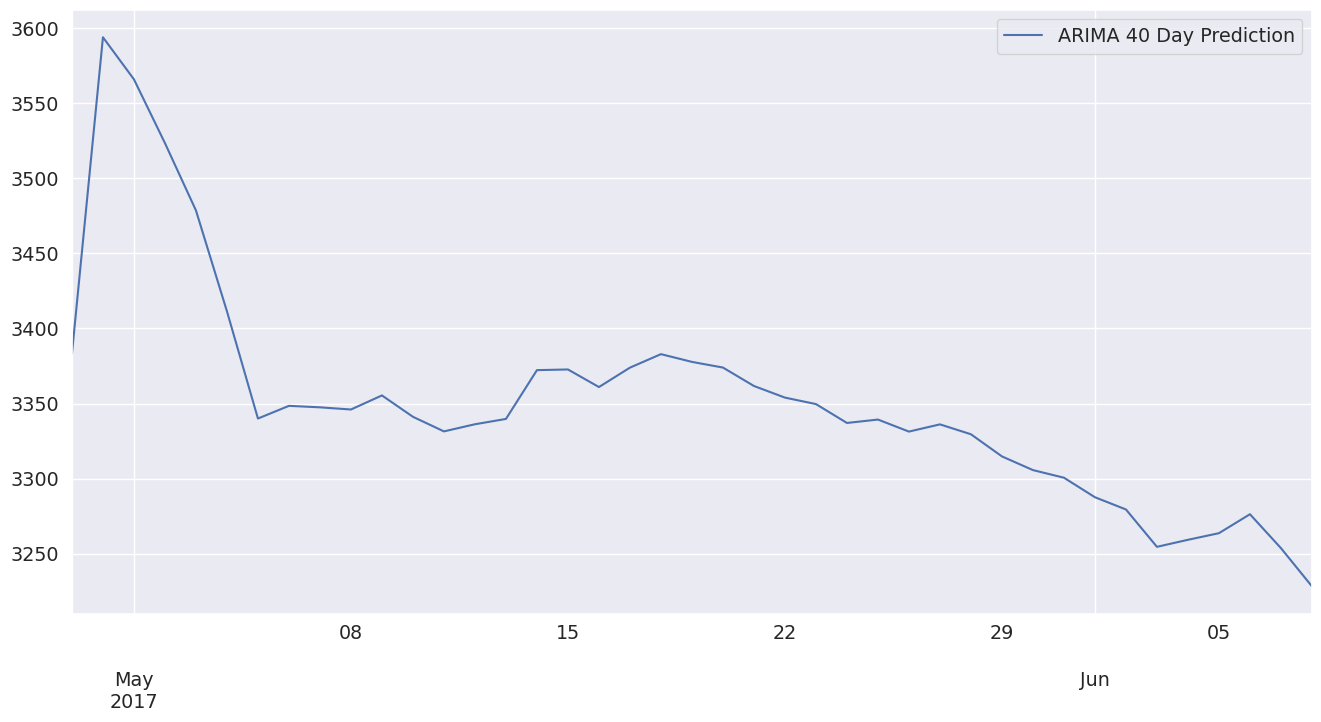

In [64]:
# ploting the prediction
predmh2.plot(figsize=(16,8),legend=True)


## For "Low"

In [65]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Low'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                  D.Low   No. Observations:                 1656
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11668.651
Method:                       css-mle   S.D. of innovations            277.895
Date:                Tue, 10 May 2022   AIC                          23345.302
Time:                        19:08:09   BIC                          23366.951
Sample:                             1   HQIC                         23353.327
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           8.1784      3.052      2.680      0.007       2.197      14.160
ar.L1.D.Low     0.0472      0.049      0.965      0.335      -0.049       0.143
ma.L1.D.Low    -0.5745      0.041    -13.933      0.000      -0.655      -0.494
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           21.2074           +0.0000j           21.2074            0.0000
MA.1            1.7407           +0.0000j            1.7407            0.0000
-----------------------------------------------------------------------------
"""

In [66]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                  
2003-09-04  341.821560
2003-09-05  154.275643
2003-09-08   -1.289433
2003-09-09  -29.981016
2003-09-10 -123.715485

<Figure size 2200x1000 with 0 Axes>

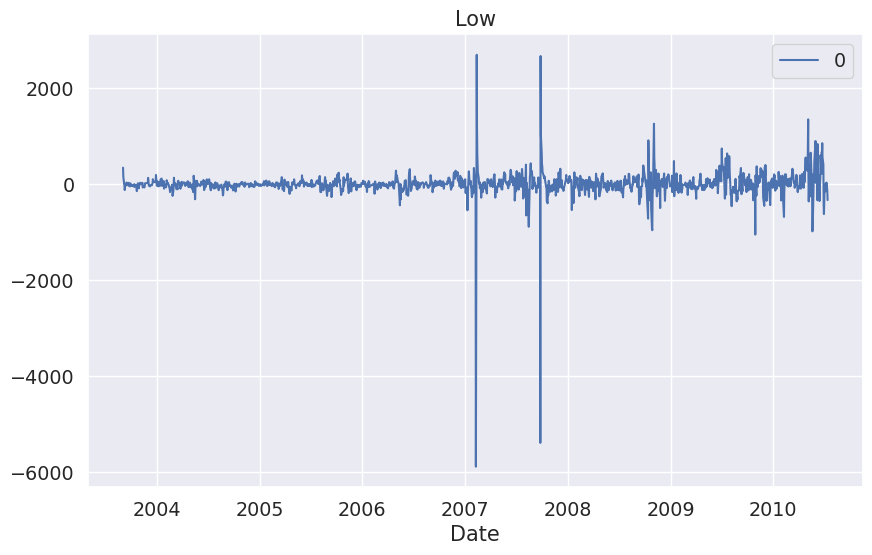

In [67]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Low')
plt.show()

In [68]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=unileverdata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2010-07-14    16736.976780
2010-07-15    16753.586158
2010-07-16    16762.162145
2010-07-19    16770.359331
2010-07-20    16778.538656
                  ...     
2017-04-21    30264.786944
2017-04-25    30272.965385
2017-04-26    30281.143825
2017-04-27    30289.322266
2017-04-28    30297.500706
Length: 1658, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


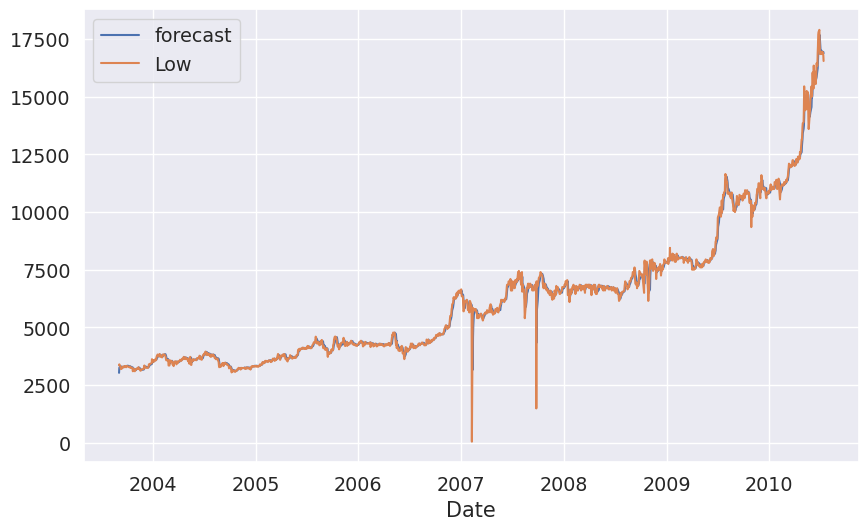

In [69]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [70]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Low'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Low'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['Low'])



MSE: 66142971.31804371


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.994574255803751,
 'corr': 0.9642360566102249,
 'mae': 6456.4019282200115,
 'mape': 0.19741037930736163,
 'me': -5336.9374711952405,
 'minmax': 0.19142138618598392,
 'mpe': -0.12548935276342812,
 'rmse': 8132.832920824313}

In [71]:
modell2=ARIMA(train_data['Low'],order=(1,1,1))
modell2=modell2.fit()
unileverdata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

In [72]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2017-04-29',end='2017-06-08')
#print(index_future_dates)
predml2=modell2.predict(start=1,end=41,typ='levels').rename('ARIMA 40 Day Prediction')
predml2.index=index_future_dates
print(predml2)

2017-04-29    3033.178440
2017-04-30    3245.724357
2017-05-01    3326.289433
2017-05-02    3329.981016
2017-05-03    3323.715485
2017-05-04    3273.984707
2017-05-05    3250.263563
2017-05-06    3248.481625
2017-05-07    3246.281645
2017-05-08    3268.652492
2017-05-09    3290.962942
2017-05-10    3290.784503
2017-05-11    3303.677420
2017-05-12    3298.088875
2017-05-13    3319.690274
2017-05-14    3329.742411
2017-05-15    3323.700708
2017-05-16    3309.592076
2017-05-17    3326.298755
2017-05-18    3333.538923
2017-05-19    3337.698332
2017-05-20    3340.087875
2017-05-21    3329.644082
2017-05-22    3324.823053
2017-05-23    3322.053416
2017-05-24    3320.462284
2017-05-25    3307.731631
2017-05-26    3301.596821
2017-05-27    3309.888992
2017-05-28    3289.840809
2017-05-29    3280.680979
2017-05-30    3275.418740
2017-05-31    3272.395632
2017-06-01    3270.658885
2017-06-02    3246.028014
2017-06-03    3186.969219
2017-06-04    3181.388943
2017-06-05    3199.458585
2017-06-06  

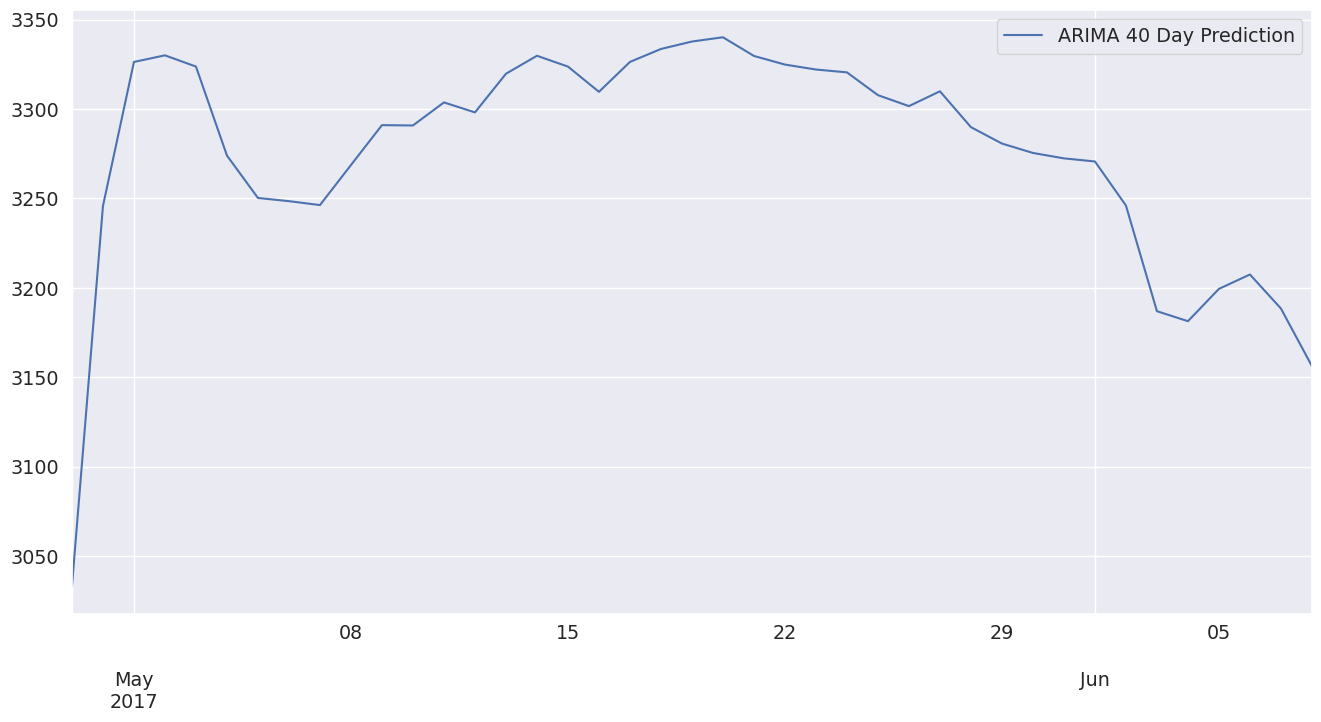

In [73]:
# ploting the prediction
predml2.plot(figsize=(16,8),legend=True)


## For "Close"

In [74]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                 1656
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -12112.985
Method:                       css-mle   S.D. of innovations            363.403
Date:                Tue, 10 May 2022   AIC                          24233.970
Time:                        19:08:11   BIC                          24255.619
Sample:                             1   HQIC                         24241.995
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             8.1494      3.386      2.407      0.016       1.514      14.785
ar.L1.D.Close    -0.0466      0.039     -1.187      0.235      -0.124       0.030
ma.L1.D.Close    -0.6036      0.032    -19.078      0.000      -0.666      -0.542
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -21.4423           +0.0000j           21.4423            0.5000
MA.1            1.6568           +0.0000j            1.6568            0.0000
-----------------------------------------------------------------------------
"""

In [75]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                  
2003-09-04   41.850579
2003-09-05   36.544686
2003-09-08  -37.463924
2003-09-09 -107.695158
2003-09-10 -201.223285

<Figure size 2200x1000 with 0 Axes>

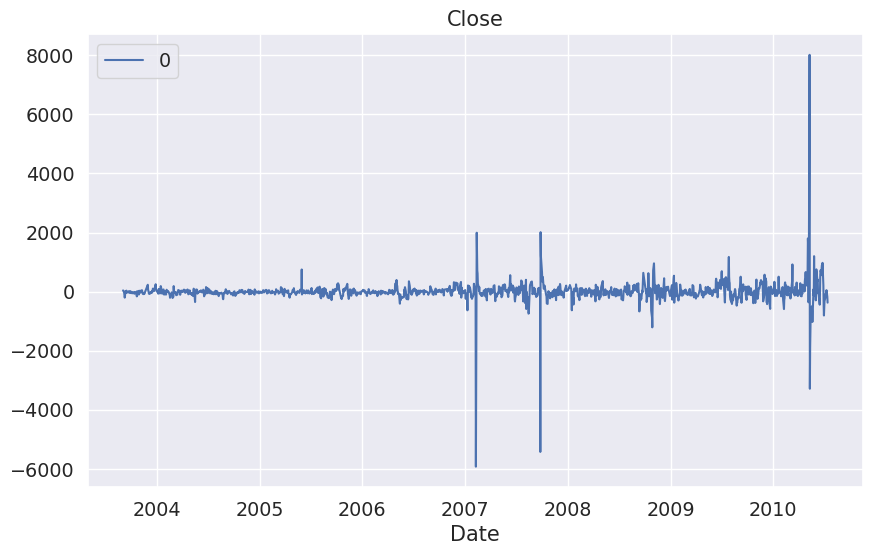

In [76]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Close')
plt.show()

In [77]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=unileverdata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2010-07-14    16893.994719
2010-07-15    16891.145077
2010-07-16    16899.807458
2010-07-19    16907.932956
2010-07-20    16916.083493
                  ...     
2017-04-21    30354.478173
2017-04-25    30362.627593
2017-04-26    30370.777014
2017-04-27    30378.926435
2017-04-28    30387.075855
Length: 1658, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


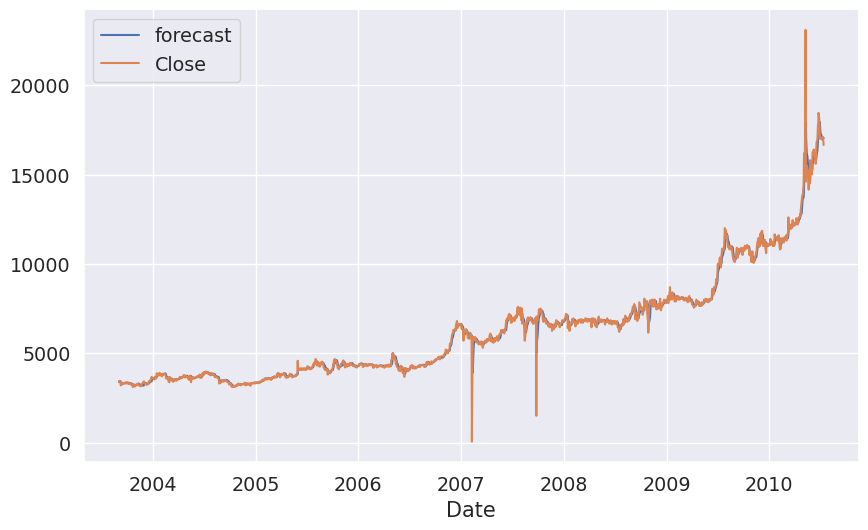

In [78]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Close'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Close'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['Close'])



MSE: 70329693.79454735


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9937427431153362,
 'corr': 0.9628584407953984,
 'mae': 6653.803496547998,
 'mape': 0.20003505788637455,
 'me': -5584.405536827131,
 'minmax': 0.19444595868839998,
 'mpe': -0.1319282241025697,
 'rmse': 8386.280092779349}

In [80]:
modelc2=ARIMA(train_data['Close'],order=(1,1,1))
modelc2=modelc2.fit()
unileverdata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

In [81]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2017-04-29',end='2017-06-08')
#print(index_future_dates)
predmc2=modelc2.predict(start=1,end=41,typ='levels').rename('ARIMA 40 Day Prediction')
predmc2.index=index_future_dates
print(predmc2)

2017-04-29    3383.149421
2017-04-30    3413.455314
2017-05-01    3437.463924
2017-05-02    3432.695158
2017-05-03    3401.223285
2017-05-04    3335.264447
2017-05-05    3290.036550
2017-05-06    3297.855831
2017-05-07    3289.738983
2017-05-08    3308.751229
2017-05-09    3323.722640
2017-05-10    3324.013313
2017-05-11    3323.022928
2017-05-12    3322.425206
2017-05-13    3330.809519
2017-05-14    3345.780940
2017-05-15    3347.237967
2017-05-16    3338.206397
2017-05-17    3349.079486
2017-05-18    3349.228841
2017-05-19    3356.898123
2017-05-20    3353.947866
2017-05-21    3342.256231
2017-05-22    3342.778752
2017-05-23    3335.514990
2017-05-24    3329.964946
2017-05-25    3317.870101
2017-05-26    3318.149260
2017-05-27    3319.483669
2017-05-28    3302.798956
2017-05-29    3290.396874
2017-05-30    3291.656517
2017-05-31    3284.837652
2017-06-01    3279.556132
2017-06-02    3258.878301
2017-06-03    3209.085908
2017-06-04    3218.094762
2017-06-05    3229.361751
2017-06-06  

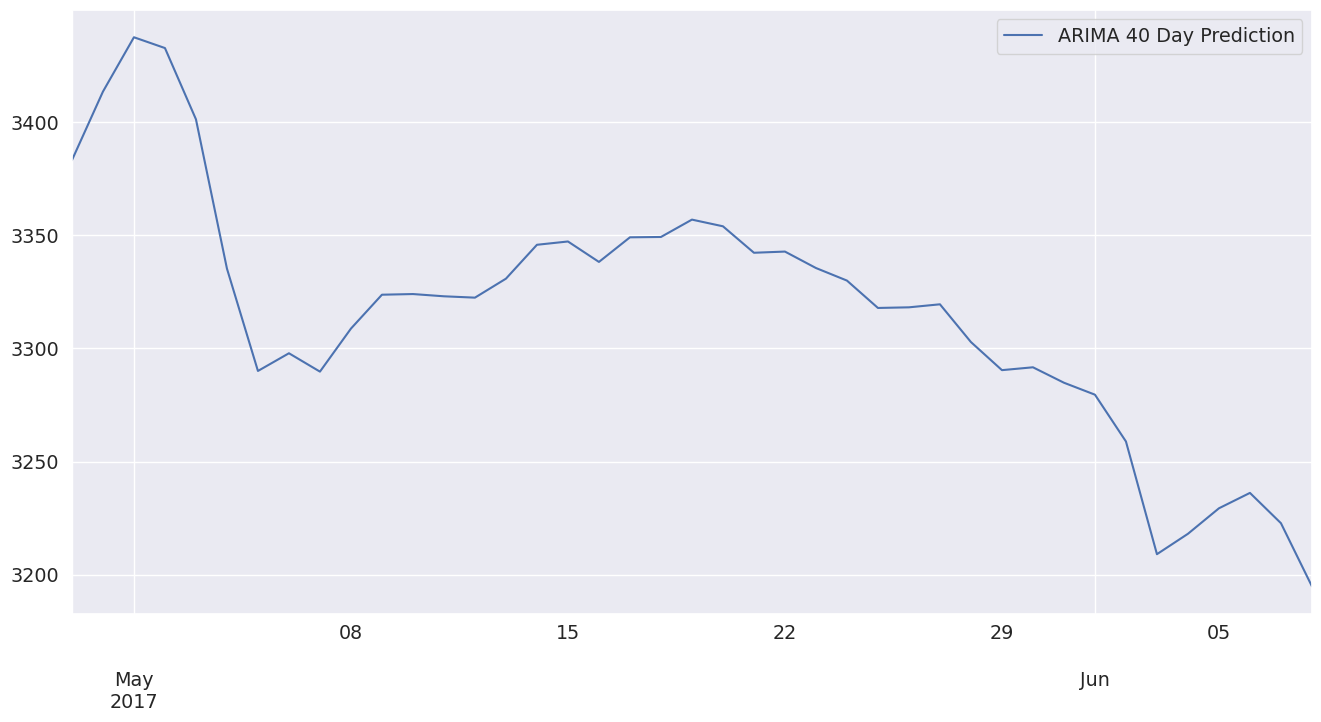

In [82]:
# ploting the prediction
predmc2.plot(figsize=(16,8),legend=True)


## For "Adj Close"

In [83]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Adj Close'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:            D.Adj Close   No. Observations:                 1656
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -11752.541
Method:                       css-mle   S.D. of innovations            292.322
Date:                Tue, 10 May 2022   AIC                          23513.081
Time:                        19:08:13   BIC                          23534.730
Sample:                             1   HQIC                         23521.106
                                                                              
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 7.3588      2.780      2.647      0.008       1.911      12.807
ar.L1.D.Adj Close    -0.0585      0.039     -1.506      0.132      -0.135       0.018
ma.L1.D.Adj Close    -0.5908      0.031    -18.884      0.000      -0.652      -0.529
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1          -17.0915           +0.0000j           17.0915            0.5000
MA.1            1.6927           +0.0000j            1.6927            0.0000
-----------------------------------------------------------------------------
"""

In [84]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                  
2003-09-04   24.758611
2003-09-05   20.427294
2003-09-08  -28.033198
2003-09-09  -73.880209
2003-09-10 -134.069932

<Figure size 2200x1000 with 0 Axes>

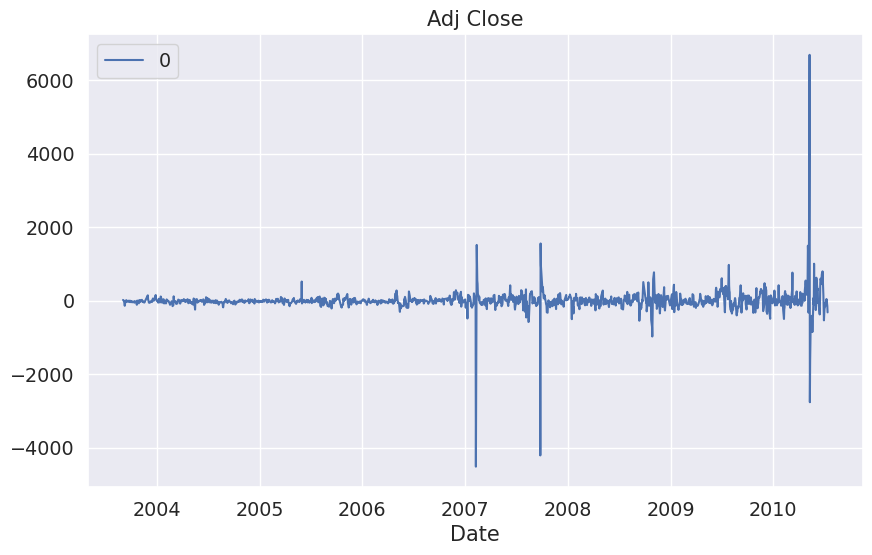

In [85]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Adj Close')
plt.show()

In [86]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=unileverdata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2010-07-14    14369.119807
2010-07-15    14364.872408
2010-07-16    14372.910294
2010-07-19    14380.229384
2010-07-20    14387.590530
                  ...     
2017-04-21    26522.286226
2017-04-25    26529.645047
2017-04-26    26537.003868
2017-04-27    26544.362689
2017-04-28    26551.721510
Length: 1658, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


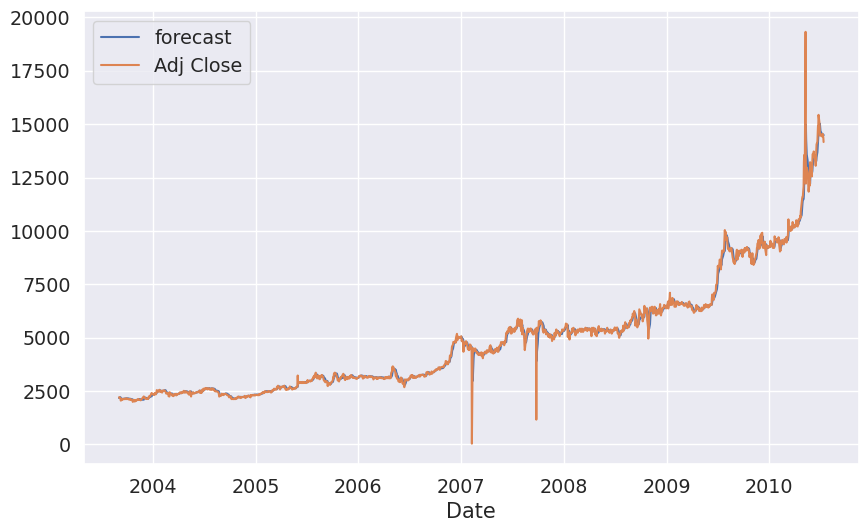

In [87]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [88]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Adj Close'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Adj Close'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})



model_accuracy(pred, test_data['Adj Close'])



MSE: 97426106.02446024


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.9953311844460263,
 'corr': 0.9699319639521745,
 'mae': 7746.895788118964,
 'mape': 0.24043525741338123,
 'me': -6937.011161556039,
 'minmax': 0.23551925396168016,
 'mpe': -0.17984151716939975,
 'rmse': 9870.466352936934}

In [89]:
modelac2=ARIMA(train_data['Adj Close'],order=(1,1,1))
modelac2=modelac2.fit()
unileverdata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

In [90]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2017-04-29',end='2017-06-08')
#print(index_future_dates)
predmac2=modelac2.predict(start=1,end=41,typ='levels').rename('ARIMA 40 Day Prediction')
predmac2.index=index_future_dates
print(predmac2)

2017-04-29    2175.289485
2017-04-30    2195.679640
2017-05-01    2212.023188
2017-05-02    2209.693686
2017-05-03    2189.589463
2017-05-04    2146.909749
2017-05-05    2117.228037
2017-05-06    2122.293575
2017-05-07    2117.776266
2017-05-08    2130.128799
2017-05-09    2140.244565
2017-05-10    2140.588236
2017-05-11    2139.851711
2017-05-12    2139.416612
2017-05-13    2144.791877
2017-05-14    2154.538921
2017-05-15    2155.604878
2017-05-16    2149.662777
2017-05-17    2156.476907
2017-05-18    2156.749787
2017-05-19    2161.603331
2017-05-20    2159.778340
2017-05-21    2152.128346
2017-05-22    2152.301626
2017-05-23    2147.711305
2017-05-24    2144.059858
2017-05-25    2136.270724
2017-05-26    2136.361518
2017-05-27    2137.354710
2017-05-28    2126.677289
2017-05-29    2118.490209
2017-05-30    2119.285717
2017-05-31    2115.063063
2017-06-01    2111.628838
2017-06-02    2098.335904
2017-06-03    2066.075404
2017-06-04    2071.418705
2017-06-05    2079.273220
2017-06-06  

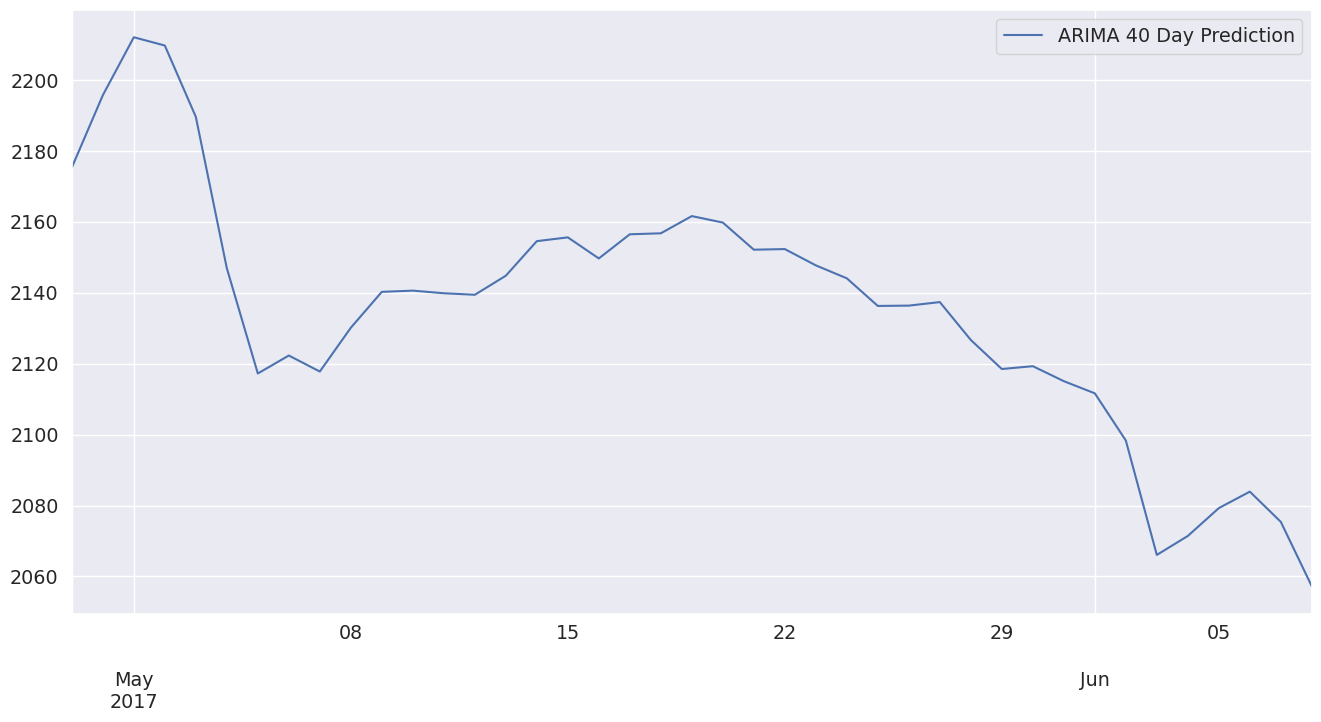

In [91]:
# ploting the prediction
predmac2.plot(figsize=(16,8),legend=True)


## For "Volume"

In [92]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train_data['Volume'],order=(1,1,1))
model_fit=model.fit()
model_fit.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:               D.Volume   No. Observations:                 1656
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -26414.793
Method:                       css-mle   S.D. of innovations        2046307.121
Date:                Tue, 10 May 2022   AIC                          52837.586
Time:                        19:08:16   BIC                          52859.235
Sample:                             1   HQIC                         52845.611
                                                                              
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -4008.7560   4922.684     -0.814      0.416   -1.37e+04    5639.527
ar.L1.D.Volume     0.1675      0.029      5.747      0.000       0.110       0.225
ma.L1.D.Volume    -0.9208      0.014    -64.076      0.000      -0.949      -0.893
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            5.9719           +0.0000j            5.9719            0.0000
MA.1            1.0860           +0.0000j            1.0860            0.0000
-----------------------------------------------------------------------------
"""

In [93]:
residuals = pd.DataFrame(model_fit.resid)
residuals.head()

0
Date                    
2003-09-04  7.941509e+06
2003-09-05 -8.468006e+06
2003-09-08 -5.177680e+06
2003-09-09 -4.547372e+06
2003-09-10 -3.507187e+06

<Figure size 2200x1000 with 0 Axes>

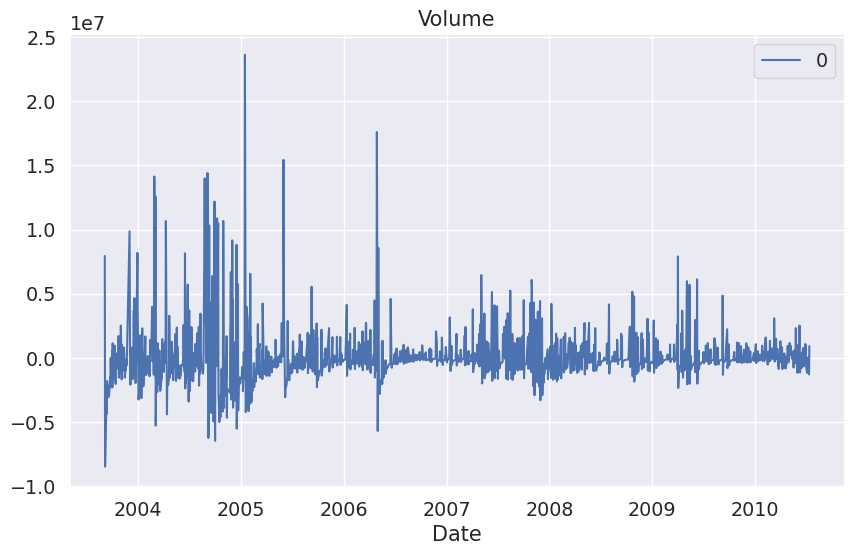

In [94]:
plt.figure(figsize=(22,10))
residuals.plot()
plt.title('Volume')
plt.show()

In [95]:
# make prediction on test set
start=len(train_data)
end=len(train_data)+len(test_data)-1
pred = model_fit.predict(start=start,end=end, typ='levels')
pred.index=unileverdata_df_bfill_imputed_transformed.index[start:end+1]
print(pred)

Date
2010-07-14    1.471687e+06
2010-07-15    1.380888e+06
2010-07-16    1.362346e+06
2010-07-19    1.355904e+06
2010-07-20    1.351488e+06
                  ...     
2017-04-21   -5.259033e+06
2017-04-25   -5.263042e+06
2017-04-26   -5.267051e+06
2017-04-27   -5.271059e+06
2017-04-28   -5.275068e+06
Length: 1658, dtype: float64


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:576: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


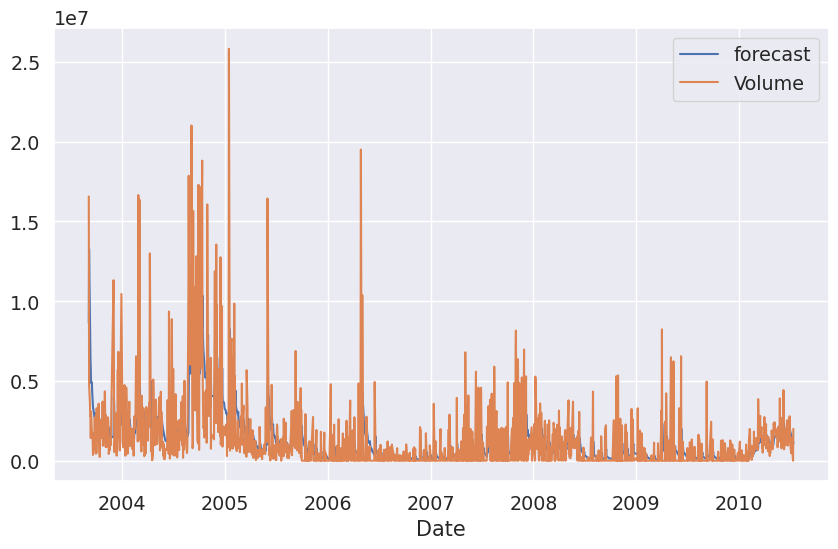

In [96]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [97]:
from sklearn.metrics import mean_squared_error

from math import sqrt


from statsmodels.tsa.stattools import acf


# model performance
mse = mean_squared_error(pred, test_data['Volume'])
print('MSE: '+str(mse))

def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
   # minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(pred-test_data['Volume'])[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr 
            })
           # , 'minmax':minmax})
                


model_accuracy(pred, test_data['Volume'])



MSE: 20297797841222.918


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:22: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
/usr/local/l

{'acf1': 0.7866641498018246,
 'corr': 0.04338444970939044,
 'mae': 3753486.7672981247,
 'mape': inf,
 'me': -3742832.453899448,
 'mpe': nan,
 'rmse': 4505307.741012029}

In [98]:
modelv2=ARIMA(train_data['Volume'],order=(1,1,1))
modelv2=modelv2.fit()
unileverdata_df_bfill_imputed_transformed.tail()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Open     High      Low    Close     Adj Close   Volume
Date                                                                 
2017-04-21  45300.0  45600.0  44500.0  45525.0  45093.214844  1210200
2017-04-25  45525.0  45525.0  45100.0  45300.0  44870.351563  1216000
2017-04-26  44800.0  45800.0  44675.0  45800.0  45365.609375  2002300
2017-04-27  45775.0  45800.0  45225.0  45750.0  45316.082031  1966800
2017-04-28  45400.0  45400.0  44325.0  44500.0  44077.937500  1896100

In [99]:
# Fucture Date Prediction
index_future_dates=pd.date_range(start='2017-04-29',end='2017-06-08')
#print(index_future_dates)
predmv2=modelv2.predict(start=1,end=41,typ='levels').rename('ARIMA 40 Day Prediction')
predmv2.index=index_future_dates
print(predmv2)

2017-04-29    8.628491e+06
2017-04-30    1.327901e+07
2017-05-01    8.779180e+06
2017-05-02    7.362372e+06
2017-05-03    6.345187e+06
2017-05-04    5.759235e+06
2017-05-05    4.874471e+06
2017-05-06    4.908209e+06
2017-05-07    4.314628e+06
2017-05-08    3.999919e+06
2017-05-09    3.760893e+06
2017-05-10    3.345112e+06
2017-05-11    2.934446e+06
2017-05-12    2.971029e+06
2017-05-13    2.713937e+06
2017-05-14    2.993362e+06
2017-05-15    2.736519e+06
2017-05-16    2.301728e+06
2017-05-17    2.746109e+06
2017-05-18    2.151876e+06
2017-05-19    2.716467e+06
2017-05-20    2.546120e+06
2017-05-21    2.582041e+06
2017-05-22    2.292851e+06
2017-05-23    2.612456e+06
2017-05-24    2.777096e+06
2017-05-25    2.252799e+06
2017-05-26    1.920965e+06
2017-05-27    2.206906e+06
2017-05-28    2.332412e+06
2017-05-29    2.079777e+06
2017-05-30    2.218138e+06
2017-05-31    2.067682e+06
2017-06-01    1.974925e+06
2017-06-02    1.989056e+06
2017-06-03    2.463468e+06
2017-06-04    1.874739e+06
2

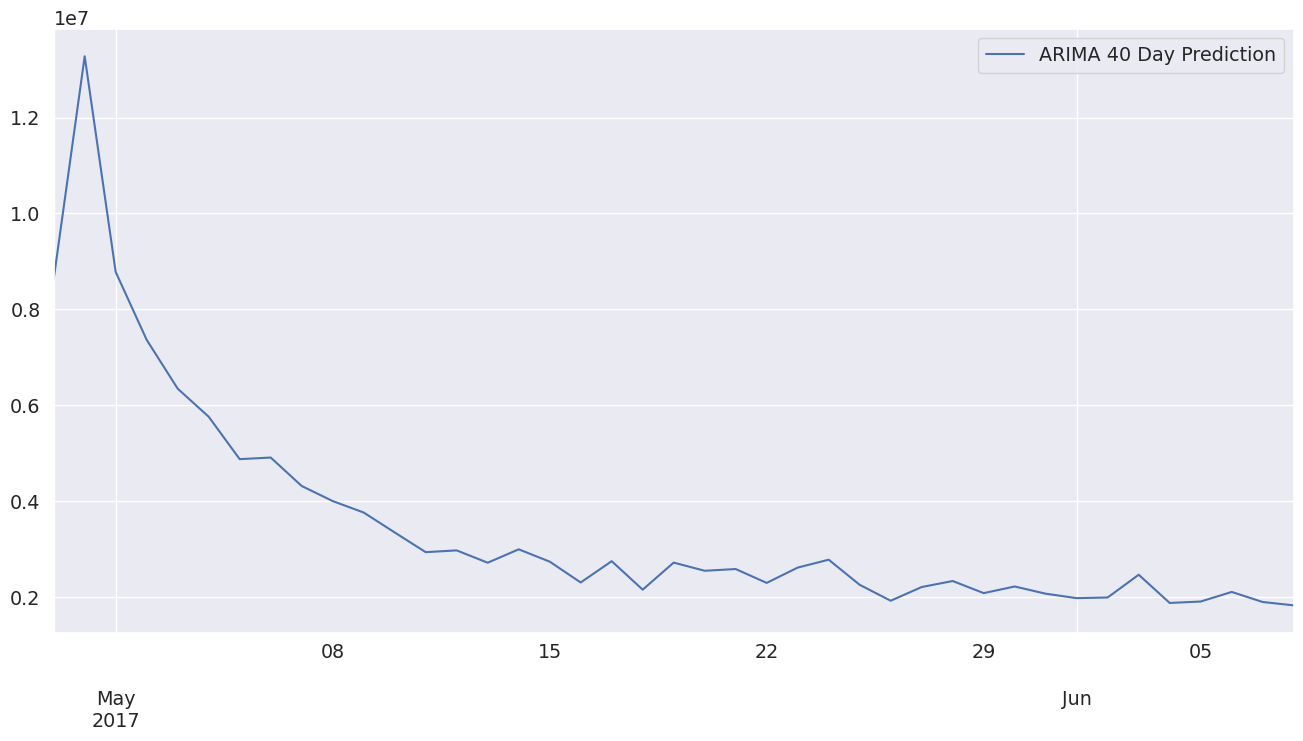

In [100]:
# ploting the prediction
predmv2.plot(figsize=(16,8),legend=True)


# VAR Model

## Configration and Training Model

In [101]:
#fit the model
from statsmodels.tsa.vector_ar.var_model import VAR


In [102]:
model = VAR(endog=train_data)
model_trained = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [103]:
# save model
model_trained.save('unilevermodel.pkl')

## Testing

In [104]:
predictions = model_trained.forecast(model_trained.y, steps=len(test_data))
predictions

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


array([[ 1.68201160e+04,  1.71018096e+04,  1.64798414e+04,
         1.68206551e+04,  1.43152718e+04,  6.13257191e+05],
       [ 1.67707343e+04,  1.70621967e+04,  1.64446140e+04,
         1.67721342e+04,  1.42826328e+04,  7.97028699e+04],
       [ 1.67379744e+04,  1.70290591e+04,  1.64132596e+04,
         1.67412198e+04,  1.42640942e+04, -1.55531986e+05],
       ...,
       [ 5.57505184e+05,  5.68014047e+05,  5.45530019e+05,
         5.57772985e+05,  5.03277033e+05, -9.97681418e+07],
       [ 5.58753600e+05,  5.69286073e+05,  5.46751505e+05,
         5.59022000e+05,  5.04405777e+05, -9.99971065e+07],
       [ 5.60004825e+05,  5.70560961e+05,  5.47975739e+05,
         5.60273825e+05,  5.05537060e+05, -1.00226586e+08]])

In [105]:
import pandas as pd

In [106]:
test_data.index

Index([2010-07-14, 2010-07-15, 2010-07-16, 2010-07-19, 2010-07-20, 2010-07-21,
       2010-07-22, 2010-07-23, 2010-07-26, 2010-07-27,
       ...
       2017-04-13, 2017-04-17, 2017-04-18, 2017-04-19, 2017-04-20, 2017-04-21,
       2017-04-25, 2017-04-26, 2017-04-27, 2017-04-28],
      dtype='object', name='Date', length=1658)

In [107]:
forcasted_results = pd.DataFrame(predictions)
forcasted_results.head(12)
forcasted_results.index = test_data.index
forcasted_results.head(12)

0             1             2             3  \
Date                                                                 
2010-07-14  16820.116030  17101.809554  16479.841373  16820.655123   
2010-07-15  16770.734256  17062.196712  16444.614028  16772.134216   
2010-07-16  16737.974408  17029.059139  16413.259563  16741.219822   
2010-07-19  16710.782182  17000.613735  16388.538368  16714.823309   
2010-07-20  16689.798815  16978.297683  16369.569183  16694.394459   
2010-07-21  16674.443956  16961.784263  16355.866296  16679.460813   
2010-07-22  16664.146249  16950.525896  16346.918215  16669.513219   
2010-07-23  16658.366948  16943.964853  16342.242921  16664.037087   
2010-07-26  16656.621483  16941.593354  16341.395804  16662.559386   
2010-07-27  16658.477777  16942.959447  16343.973688  16664.654368   
2010-07-28  16663.551221  16947.662172  16349.614119  16669.941560   
2010-07-29  16671.499399  16955.345419  16357.992707  16678.081642   

                       4              5  
Date                                     
2010-07-14  14315.271823  613257.191452  
2010-07-15  14282.632850   79702.869874  
2010-07-16  14264.094207 -155531.985940  
2010-07-19  14248.771399 -266357.575917  
2010-07-20  14237.937316 -325071.019151  
2010-07-21  14231.249860 -361427.546173  
2010-07-22  14228.331259 -387685.047184  
2010-07-23  14228.794601 -408952.675035  
2010-07-26  14232.283357 -427408.905986  
2010-07-27  14238.476470 -444026.811114  
2010-07-28  14247.087022 -459278.904652  
2010-07-29  14257.859147 -473425.517162

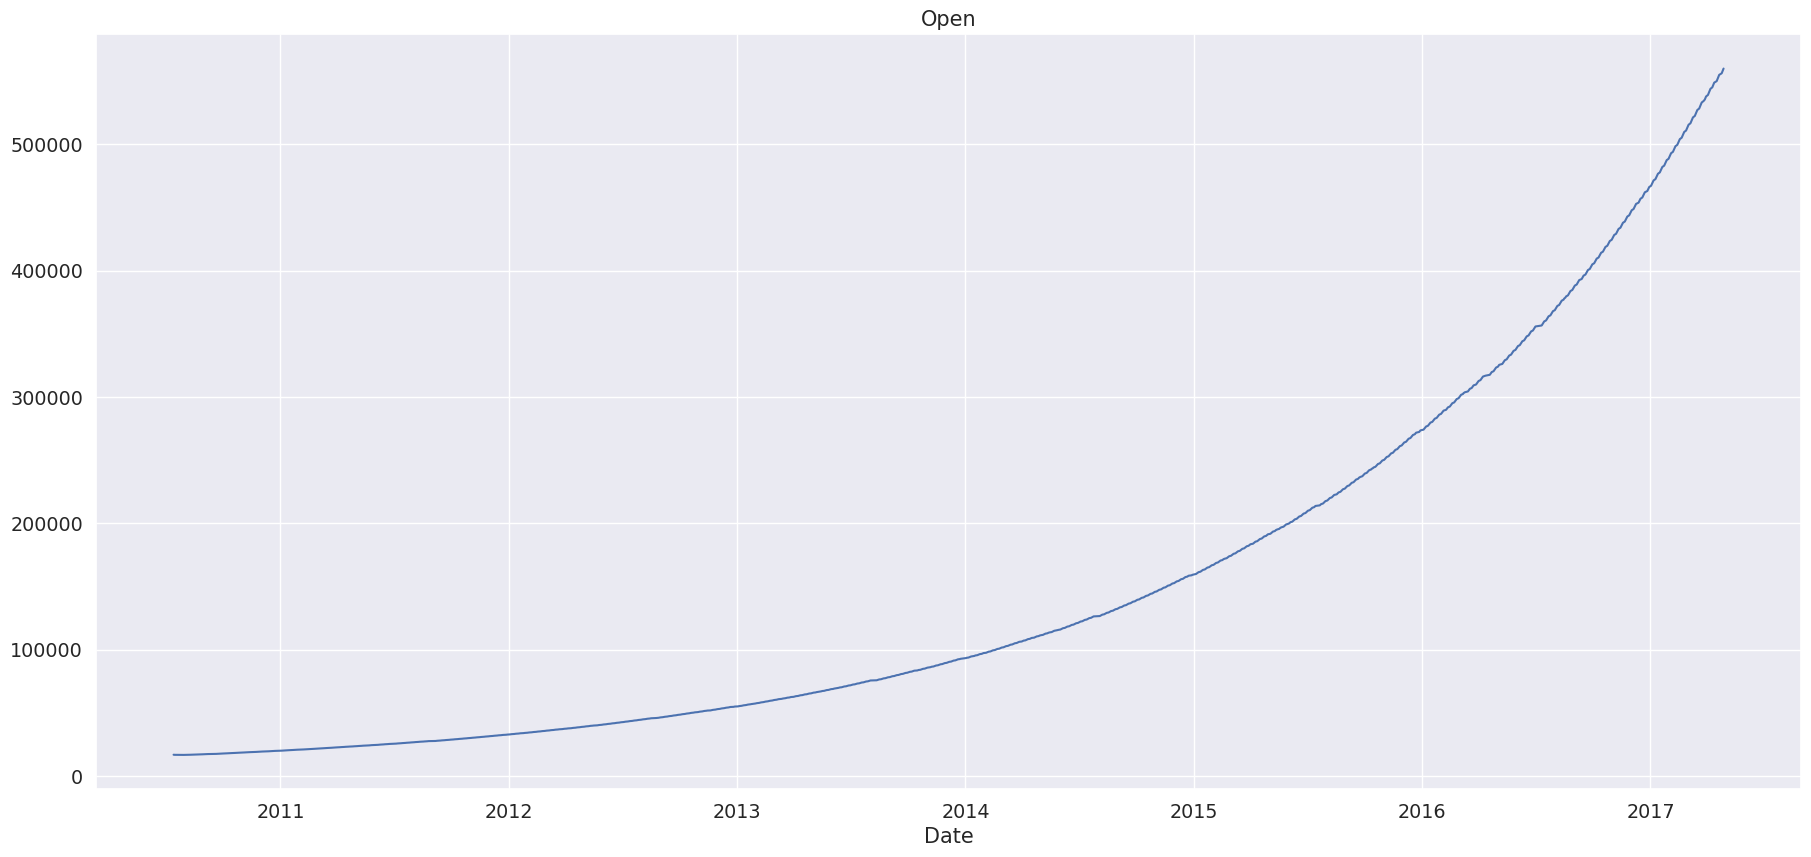

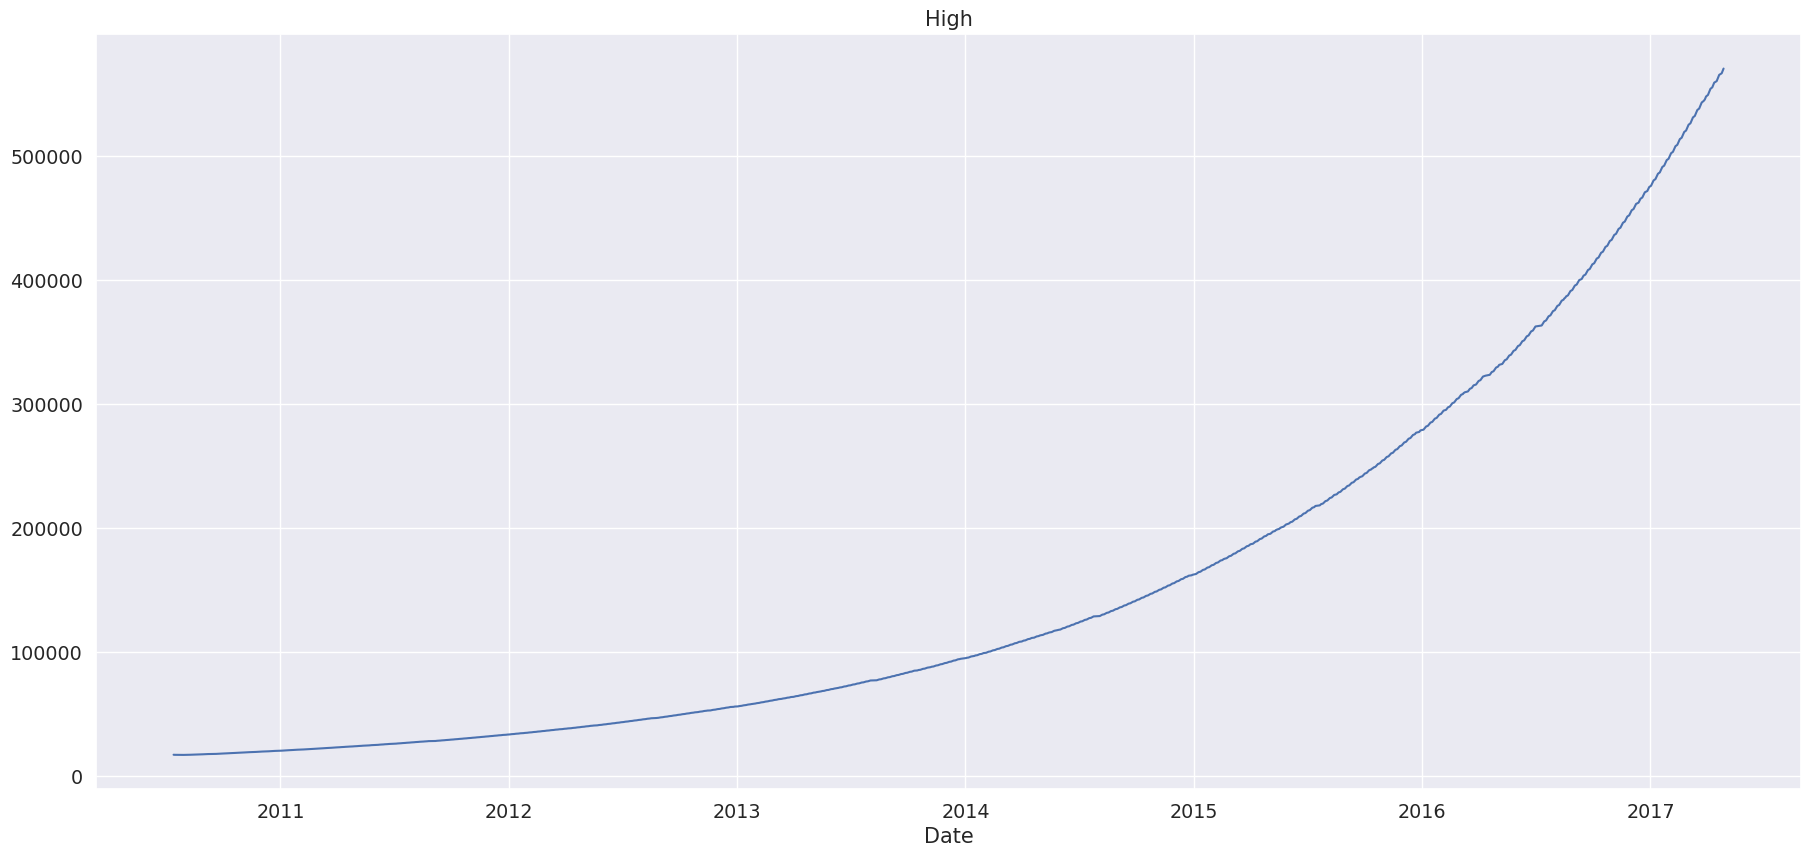

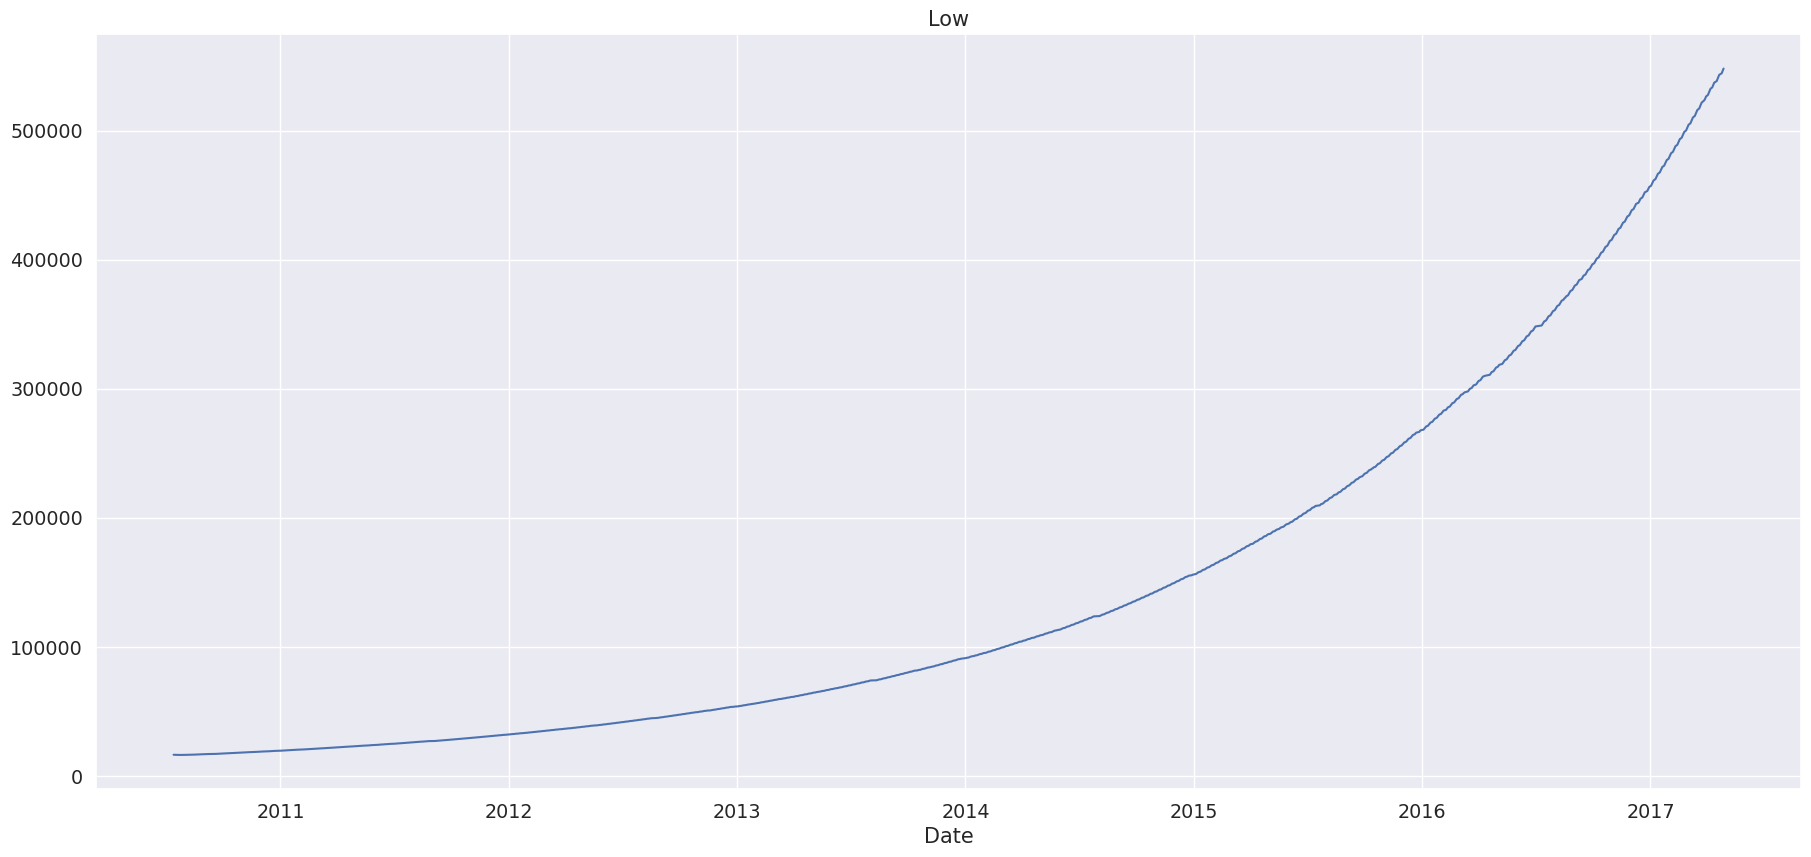

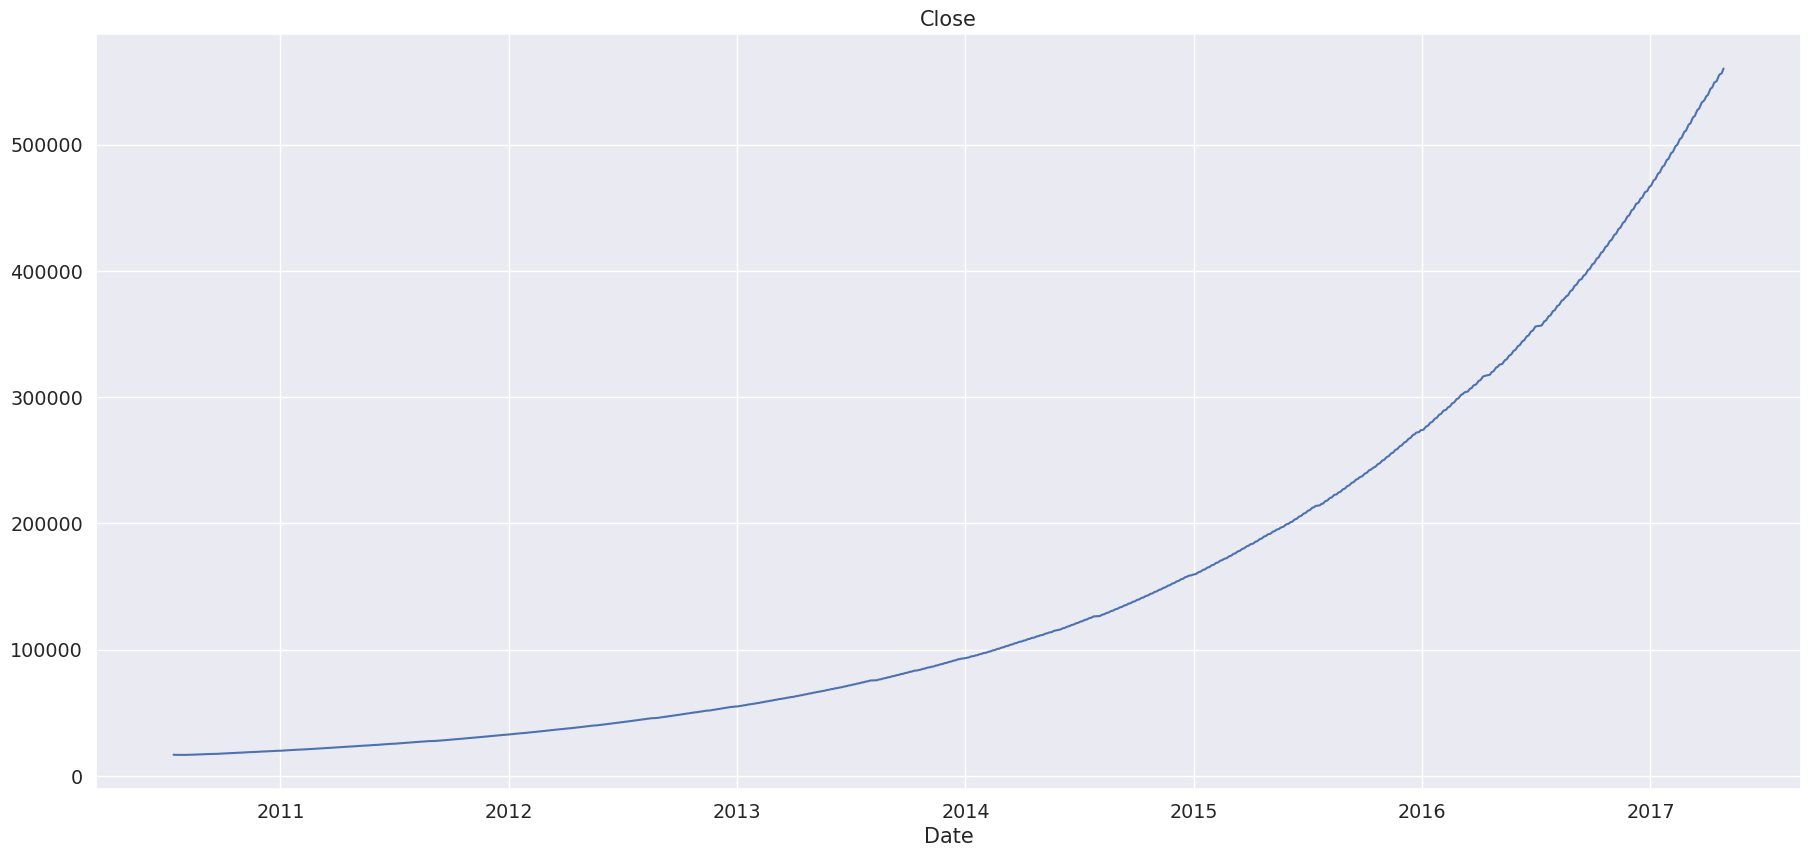

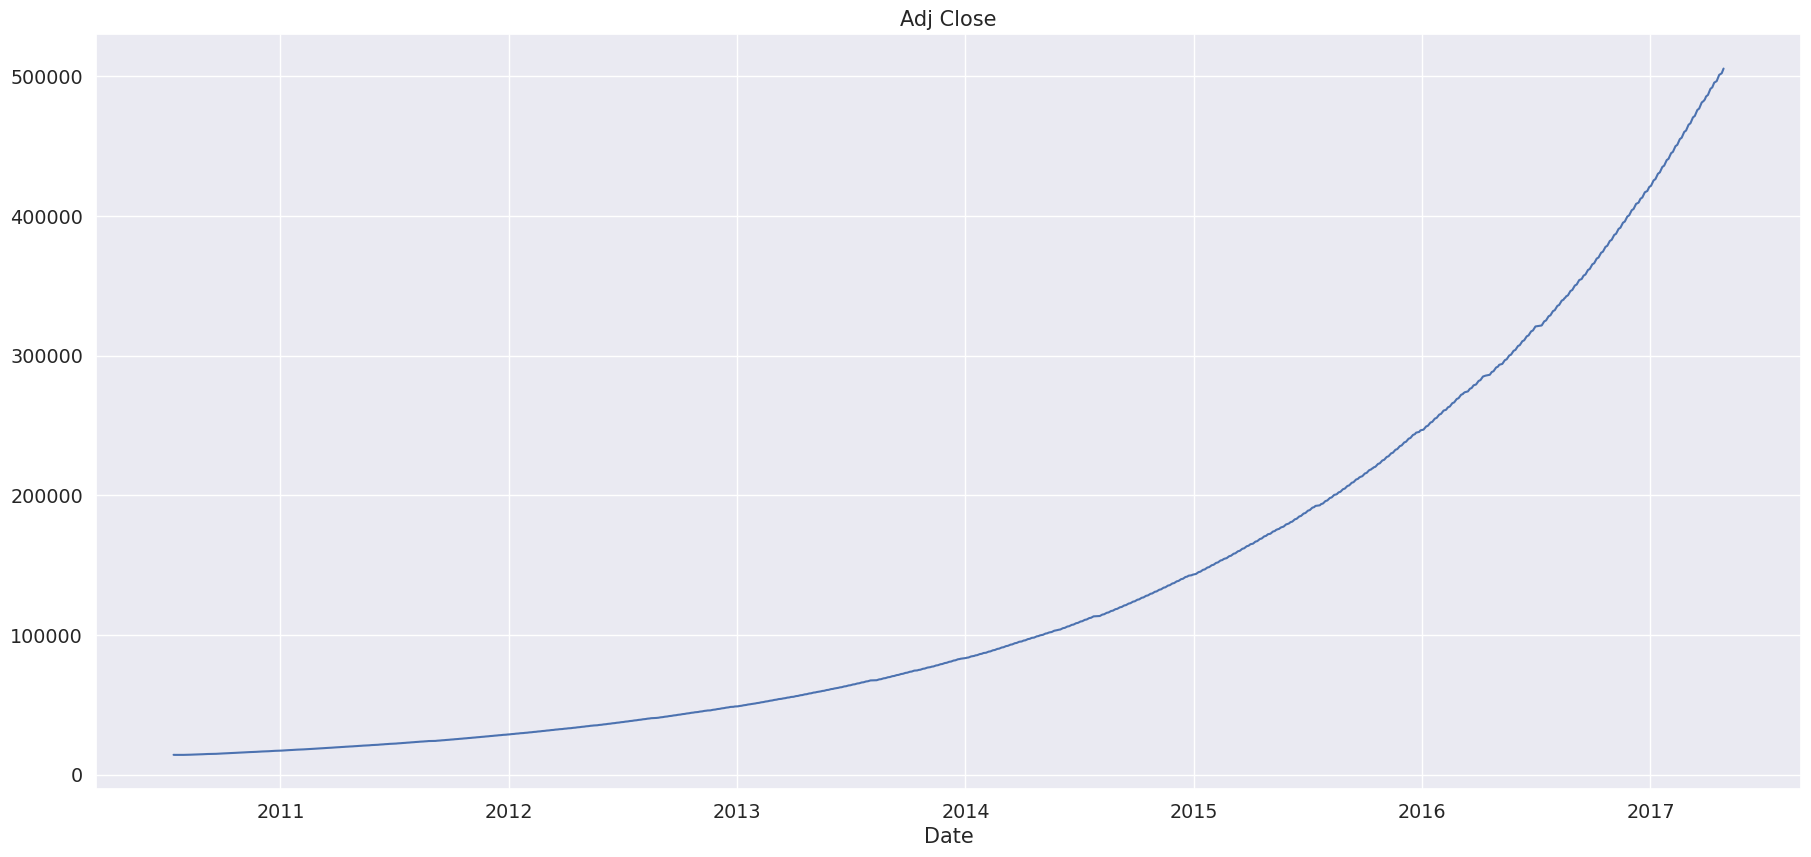

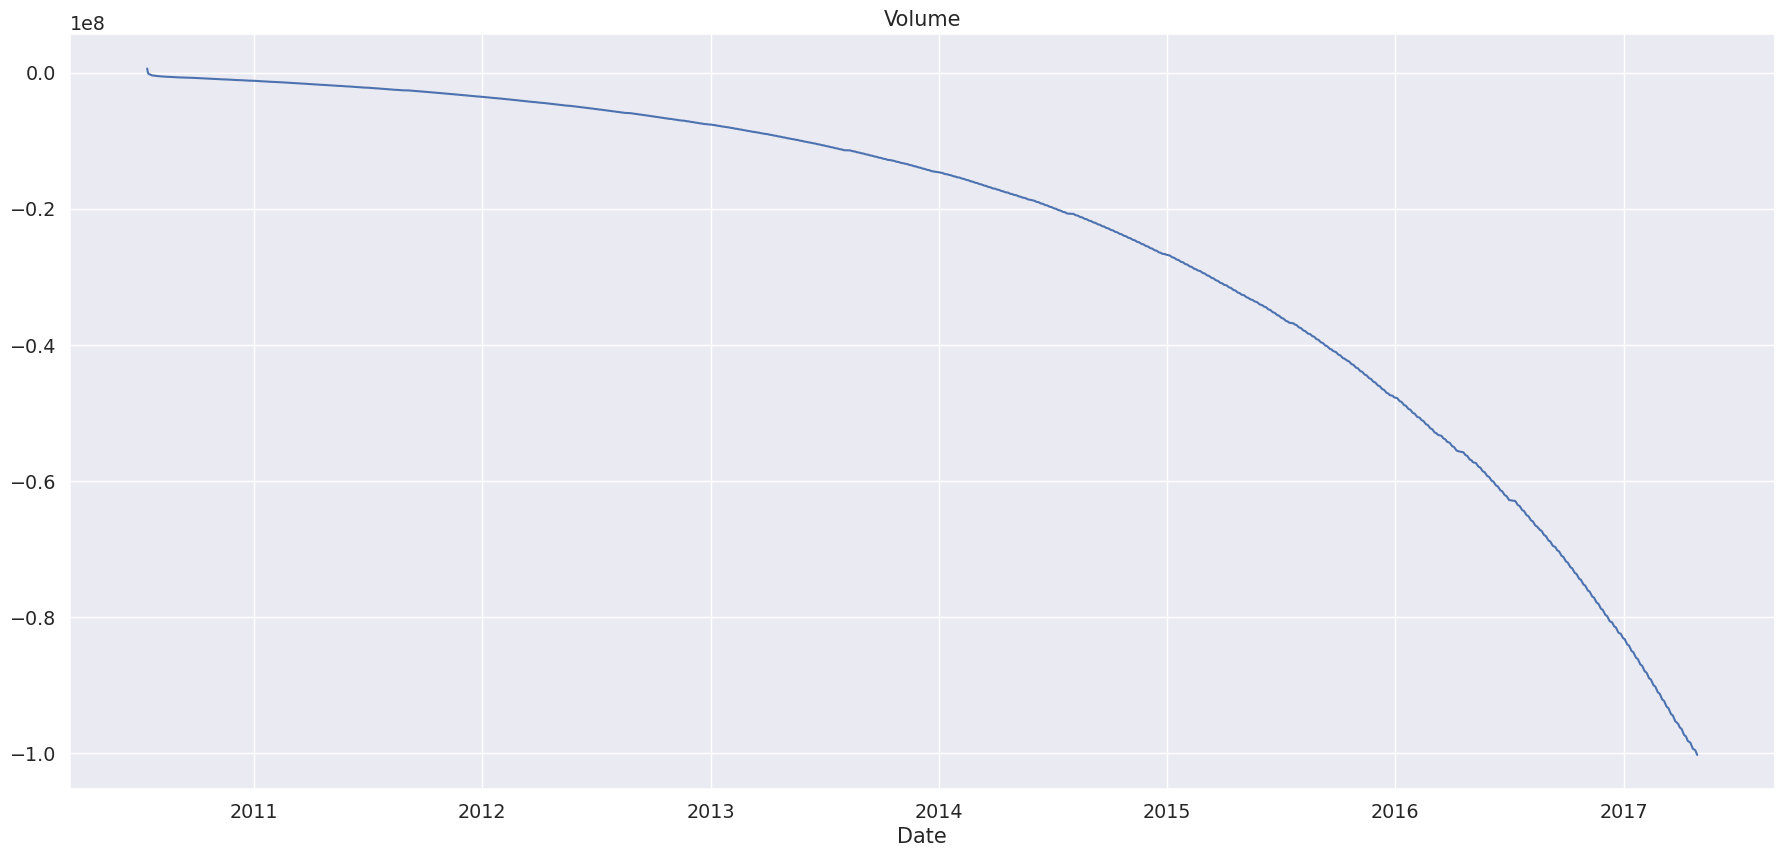

In [108]:
forcasted_results.columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
columnnames=list(forcasted_results.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  forcasted_results[columnname].plot()
  plt.title(columnname)
  plt.show()

## Model Performance Visualization

In [109]:
model_trained.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 10, May, 2022
Time:                     19:08:21
--------------------------------------------------------------------
No. of Equations:         6.00000    BIC:                    74.6897
Nobs:                     1656.00    HQIC:                   74.6033
Log likelihood:          -75785.9    FPE:                2.38611e+32
AIC:                      74.5524    Det(Omega_mle):     2.32647e+32
--------------------------------------------------------------------
Results for equation Open
                  coefficient       std. error           t-stat            prob
-------------------------------------------------------------------------------
const              446.835912        81.747887            5.466           0.000
L1.Open             -0.485061         0.114831           -4.224           0.000
L1.High              0.257349         0.089249            2.883  

##Final Model

In [110]:
model = VAR(endog=ts)
model_trained = model.fit()
# save model
model_trained.save('unilevermodel.pkl')

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


# Test Results

## VAR Results

In [111]:
import pickle
# load model
with open('unilevermodel.pkl', 'rb') as pickle_file:
    loaded_model = pickle.load(pickle_file)

In [112]:
forcasted_results=loaded_model.forecast(model_trained.y, steps=len(test_data)) # test_data must be one row of information as-is, meaning, as it originally appears in the dataset provided for training. 
print(forcasted_results)

[[  44616.21311435   45060.47807432   44134.60896885   44617.89962449
    44190.15884912 1880004.75722053]
 [  44669.85382184   45058.82676893   44214.02055869   44681.92290518
    44248.17710827 1875750.57695316]
 [  44727.81369379   45099.37384854   44283.27946746   44736.61537142
    44297.64625115 1874405.55114197]
 ...
 [ 121618.23448695  122724.75013232  120349.73724289  121633.87474246
   121543.81399599 2606796.64524865]
 [ 121684.08054655  122791.16204994  120414.91541833  121699.72487303
   121610.62455139 2607463.4474665 ]
 [ 121749.96030069  122857.60795164  120480.12694655  121765.60870022
   121677.46929494 2608130.59090187]]


/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [113]:
#converting predictions to dataframe
test_list=['2017-04-13', '2017-04-17', '2017-04-18', '2017-04-19', '2017-04-20', '2017-04-21','2017-04-25', '2017-04-26', '2017-04-27', '2017-04-28']
inputdata = pd.DataFrame(test_list)
inputdata.columns =['testdata']
print(inputdata)
inputdata['testdata']=inputdata['testdata'].astype('str').map(lambda x: x.lower())
testsamplerequired = pd.to_datetime(inputdata['testdata']).dt.date
print(testsamplerequired)
forcasted_results=loaded_model.forecast(loaded_model.y, steps=len(testsamplerequired)) # test_data must be one row of information as-is, meaning, as it originally appears in the dataset provided for training. 
print(forcasted_results)

     testdata
0  2017-04-13
1  2017-04-17
2  2017-04-18
3  2017-04-19
4  2017-04-20
5  2017-04-21
6  2017-04-25
7  2017-04-26
8  2017-04-27
9  2017-04-28
0    2017-04-13
1    2017-04-17
2    2017-04-18
3    2017-04-19
4    2017-04-20
5    2017-04-21
6    2017-04-25
7    2017-04-26
8    2017-04-27
9    2017-04-28
Name: testdata, dtype: object
[[  44616.21311435   45060.47807432   44134.60896885   44617.89962449
    44190.15884912 1880004.75722053]
 [  44669.85382184   45058.82676893   44214.02055869   44681.92290518
    44248.17710827 1875750.57695316]
 [  44727.81369379   45099.37384854   44283.27946746   44736.61537142
    44297.64625115 1874405.55114197]
 [  44784.30563803   45151.08518168   44343.80693434   44792.60790733
    44348.20706988 1875552.95992109]
 [  44840.89080538   45206.7315921    44401.20355971   44849.07273995
    44399.17584425 1876851.19345393]
 [  44897.40251936   45263.65306502   44457.36230929   44905.55620991
    44450.17291361 1877791.32301698]
 [  44953.7450

/usr/local/lib/python3.7/dist-packages/statsmodels/base/wrapper.py:35: FutureWarning: y is a deprecated alias for endog, will be removed in version 0.11.0
  obj = getattr(results, attr)


In [114]:
import pandas as pd

In [115]:
forcasted_results = pd.DataFrame(forcasted_results)
forcasted_results['Date']=testsamplerequired
forcasted_results.set_index('Date', inplace = True) #Set the date to the index
forcasted_results.head(12)

0             1             2             3  \
Date                                                                 
2017-04-13  44616.213114  45060.478074  44134.608969  44617.899624   
2017-04-17  44669.853822  45058.826769  44214.020559  44681.922905   
2017-04-18  44727.813694  45099.373849  44283.279467  44736.615371   
2017-04-19  44784.305638  45151.085182  44343.806934  44792.607907   
2017-04-20  44840.890805  45206.731592  44401.203560  44849.072740   
2017-04-21  44897.402519  45263.653065  44457.362309  44905.556210   
2017-04-25  44953.745084  45320.885040  44512.941464  44961.904546   
2017-04-26  45009.886553  45378.083318  44568.176970  45018.064489   
2017-04-27  45065.817027  45435.125978  44623.154345  45074.018106   
2017-04-28  45121.534270  45491.970617  44677.905334  45129.760154   

                       4             5  
Date                                    
2017-04-13  44190.158849  1.880005e+06  
2017-04-17  44248.177108  1.875751e+06  
2017-04-18  44297.646251  1.874406e+06  
2017-04-19  44348.207070  1.875553e+06  
2017-04-20  44399.175844  1.876851e+06  
2017-04-21  44450.172914  1.877791e+06  
2017-04-25  44501.070080  1.878410e+06  
2017-04-26  44551.822874  1.878821e+06  
2017-04-27  44602.416247  1.879115e+06  
2017-04-28  44652.845730  1.879347e+06

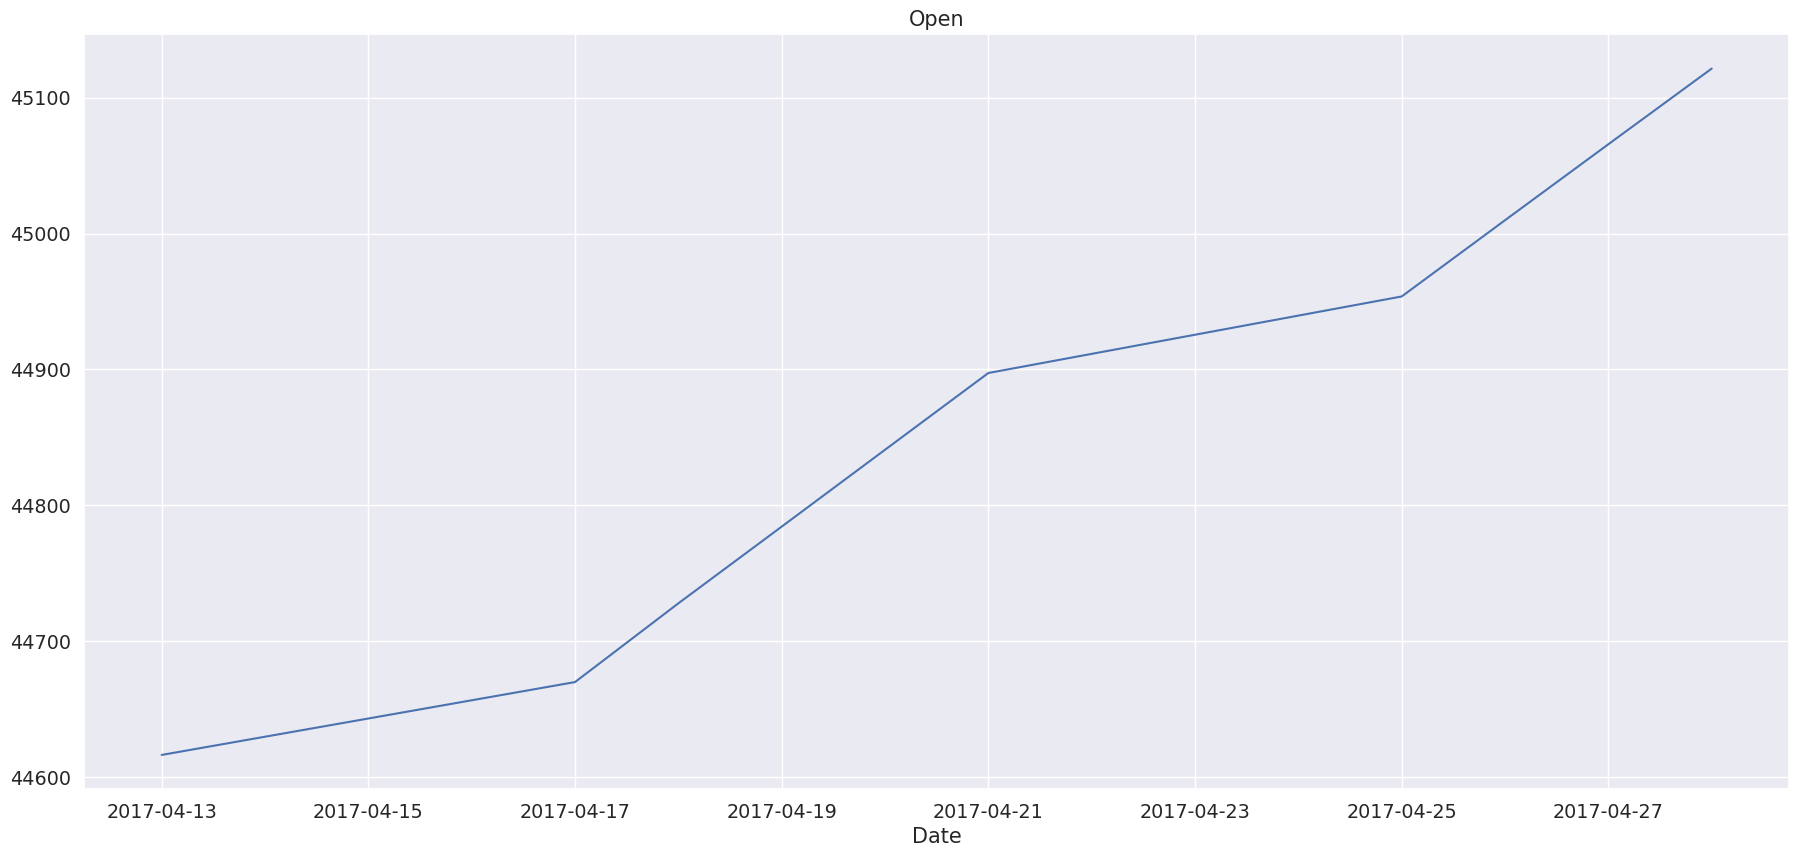

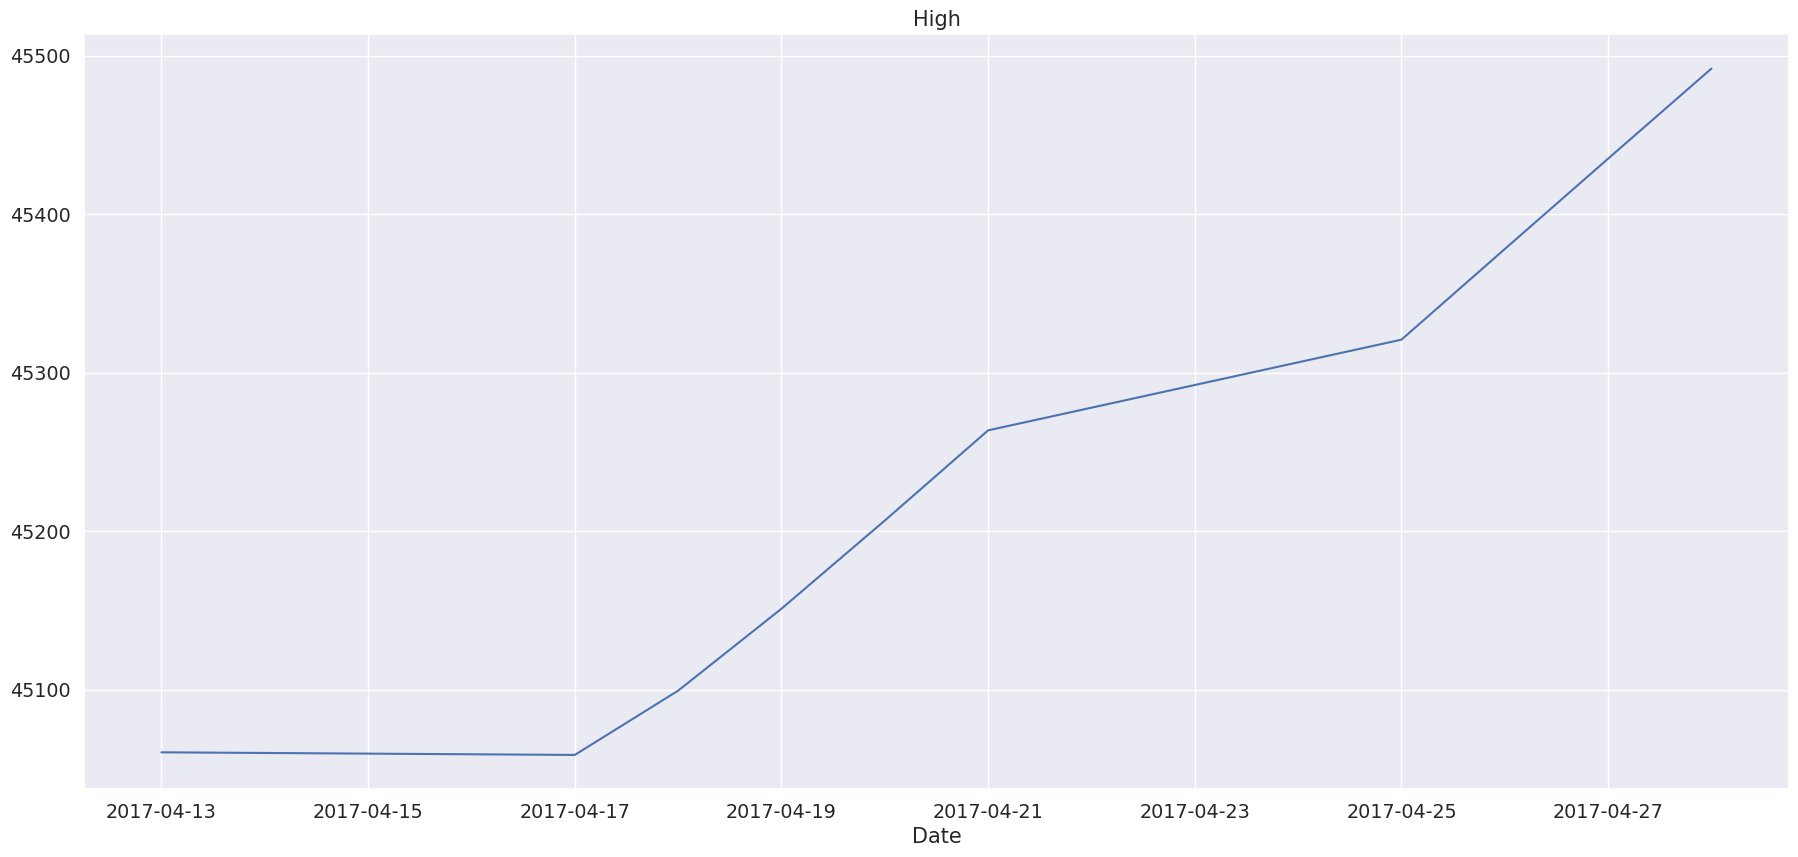

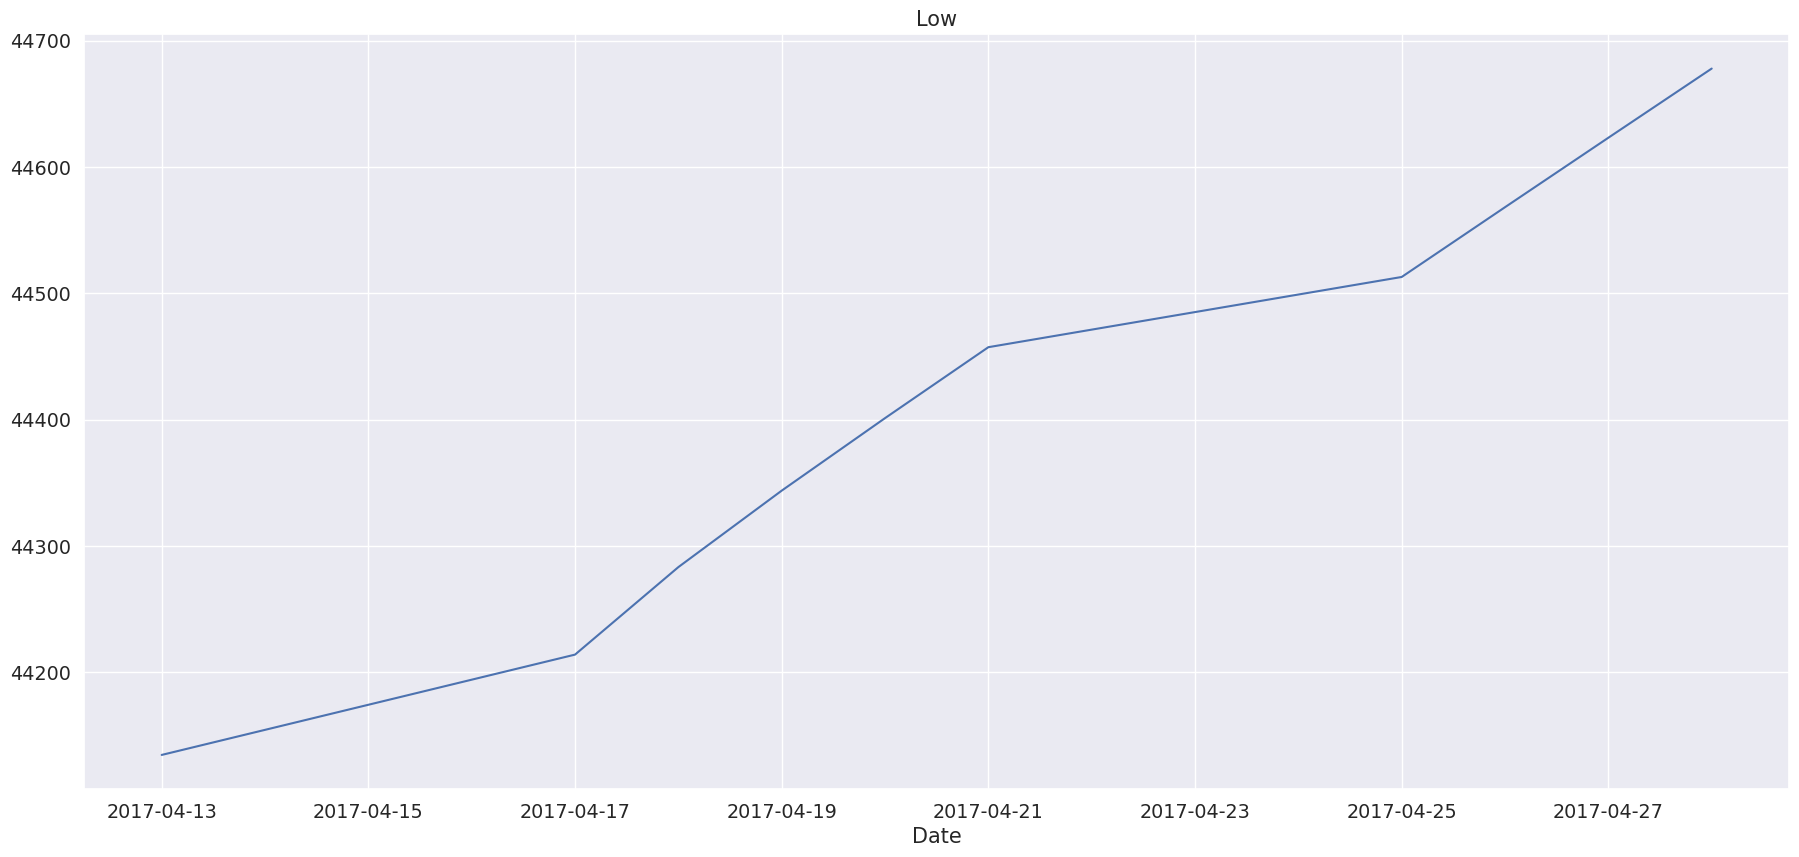

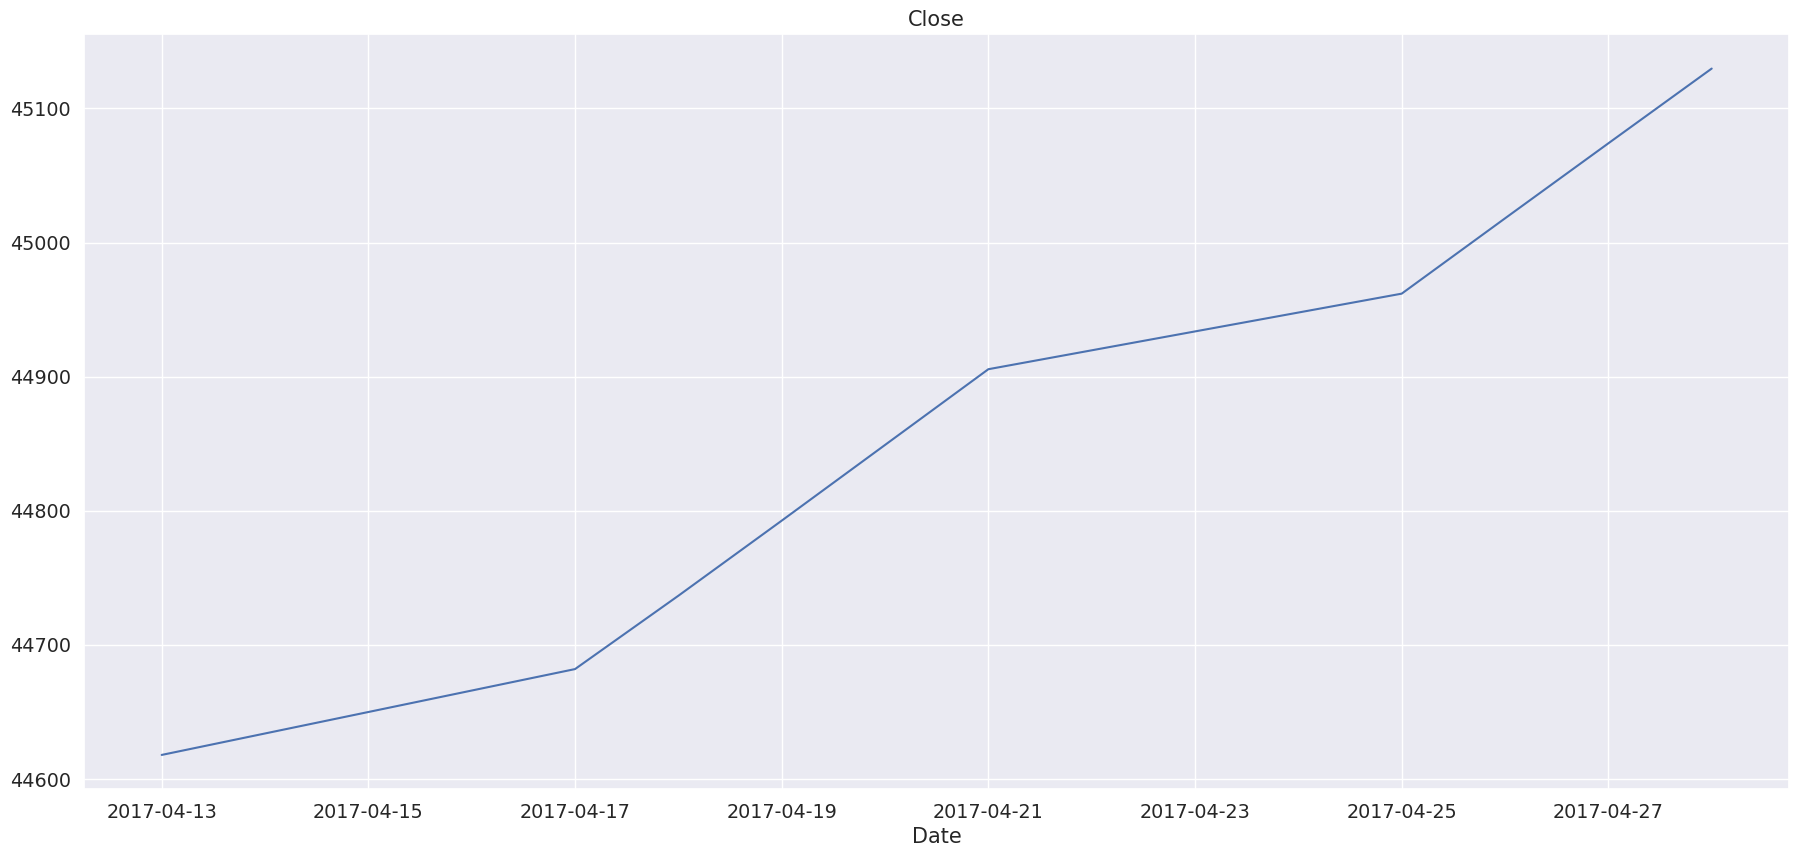

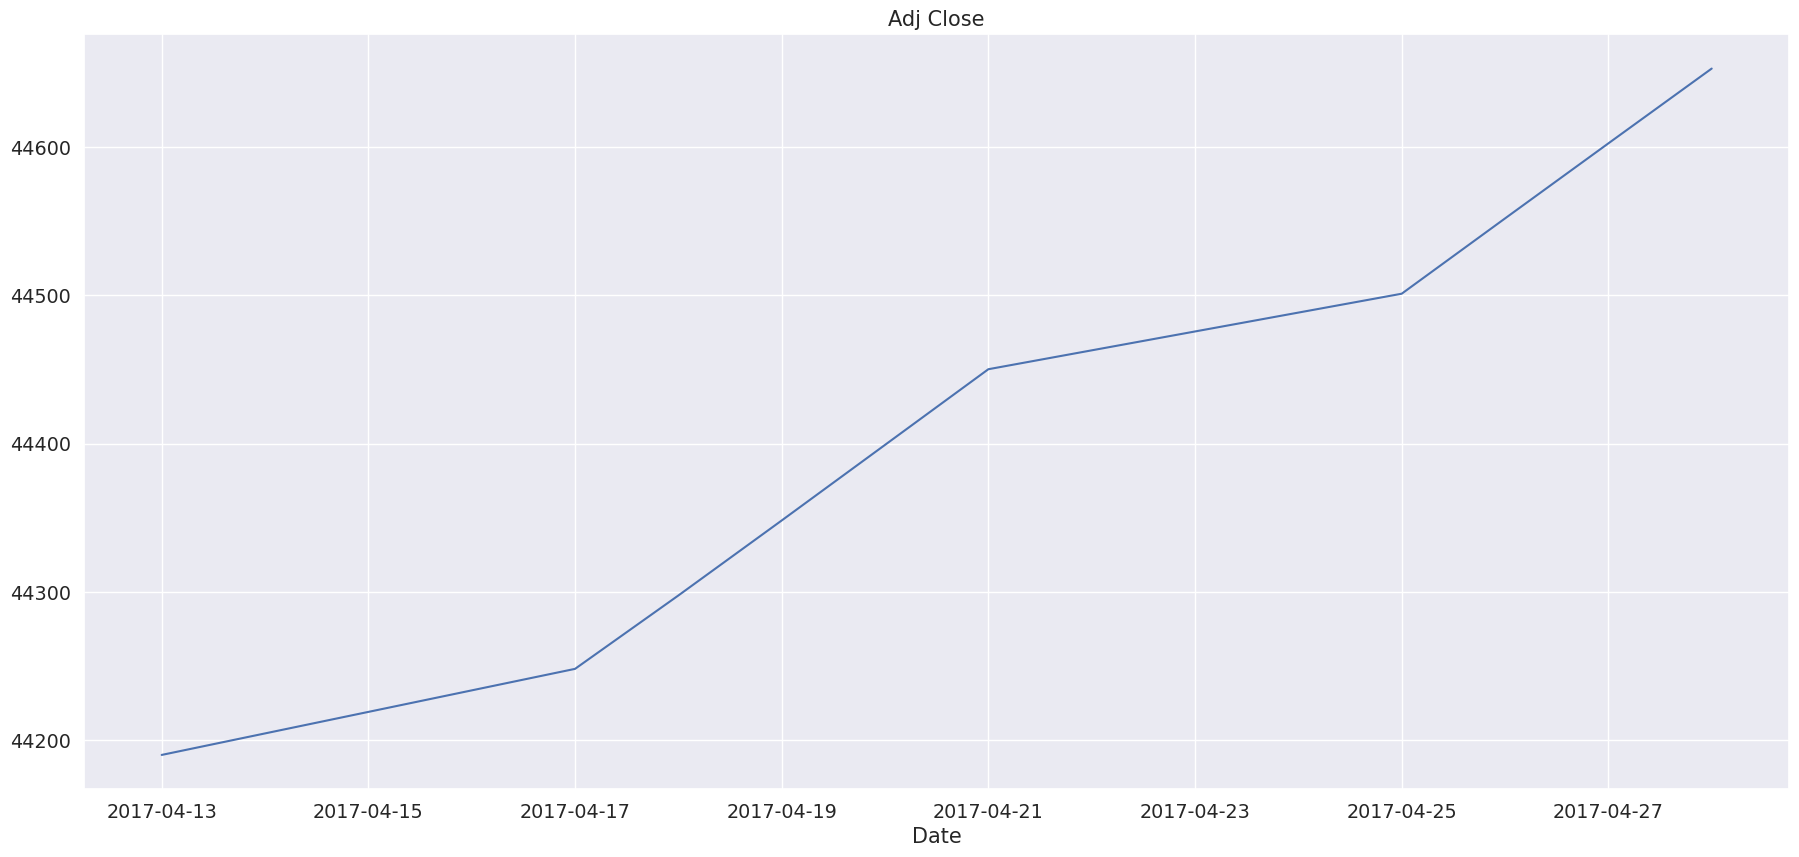

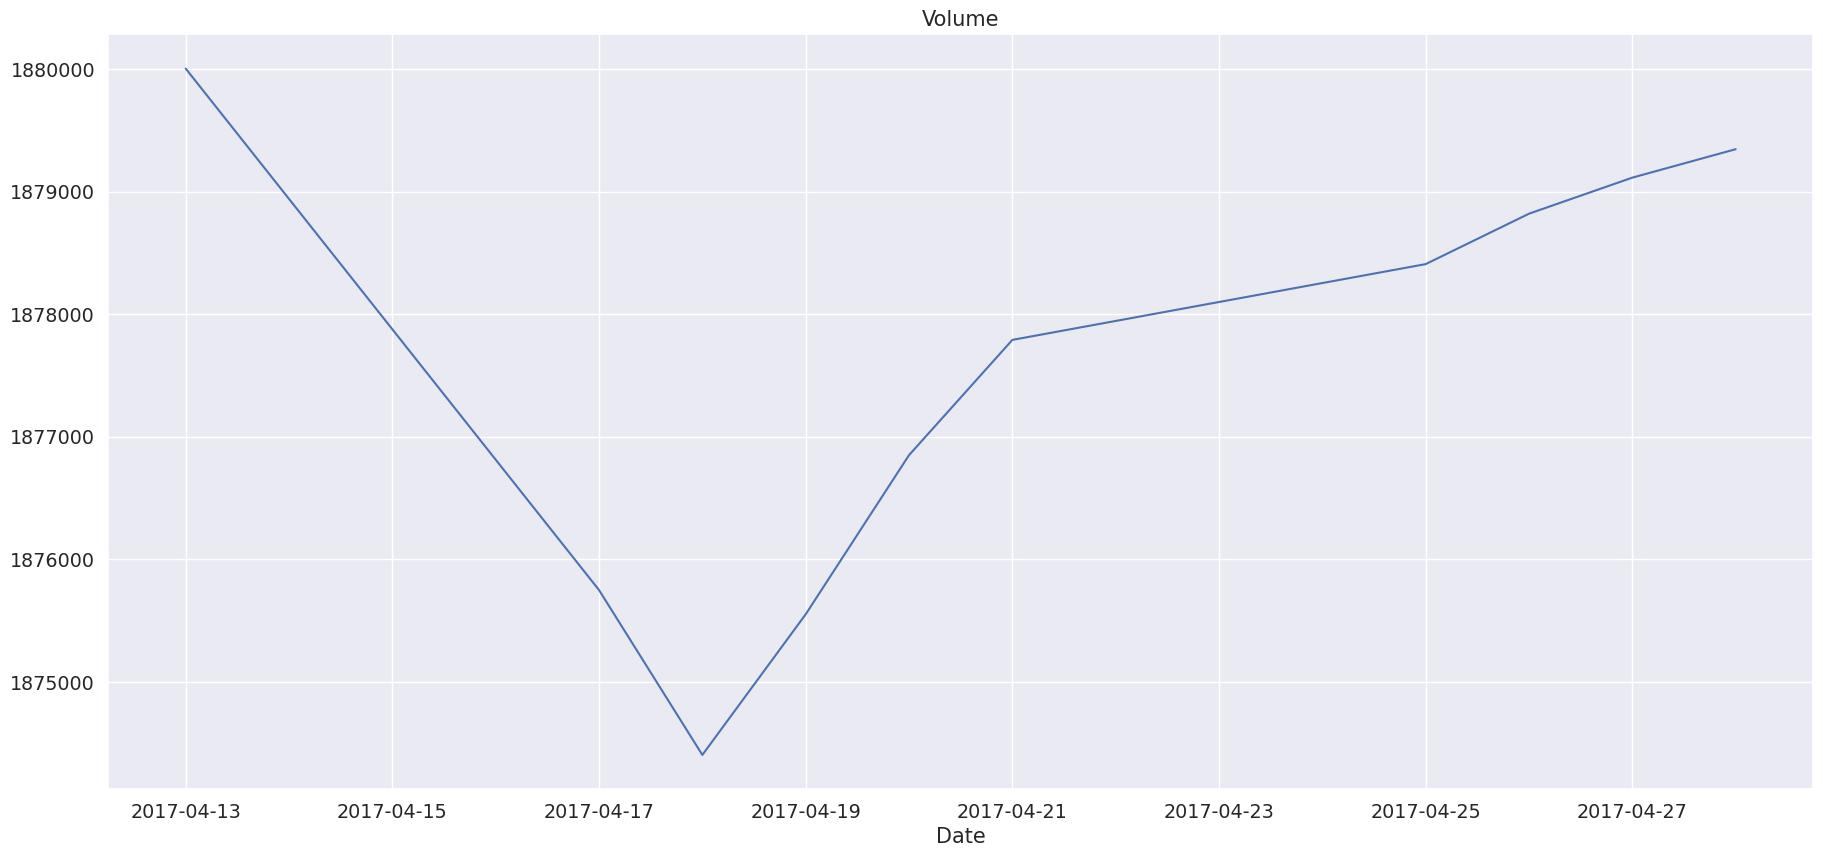

In [116]:
forcasted_results.columns=['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
columnnames=list(forcasted_results.columns)
for columnname in columnnames:
  plt.figure(figsize=(22,10))
  forcasted_results[columnname].plot()
  plt.title(columnname)
  plt.show()

In [117]:
forcasted_results


Open          High           Low         Close  \
Date                                                                 
2017-04-13  44616.213114  45060.478074  44134.608969  44617.899624   
2017-04-17  44669.853822  45058.826769  44214.020559  44681.922905   
2017-04-18  44727.813694  45099.373849  44283.279467  44736.615371   
2017-04-19  44784.305638  45151.085182  44343.806934  44792.607907   
2017-04-20  44840.890805  45206.731592  44401.203560  44849.072740   
2017-04-21  44897.402519  45263.653065  44457.362309  44905.556210   
2017-04-25  44953.745084  45320.885040  44512.941464  44961.904546   
2017-04-26  45009.886553  45378.083318  44568.176970  45018.064489   
2017-04-27  45065.817027  45435.125978  44623.154345  45074.018106   
2017-04-28  45121.534270  45491.970617  44677.905334  45129.760154   

               Adj Close        Volume  
Date                                    
2017-04-13  44190.158849  1.880005e+06  
2017-04-17  44248.177108  1.875751e+06  
2017-04-18  44297.646251  1.874406e+06  
2017-04-19  44348.207070  1.875553e+06  
2017-04-20  44399.175844  1.876851e+06  
2017-04-21  44450.172914  1.877791e+06  
2017-04-25  44501.070080  1.878410e+06  
2017-04-26  44551.822874  1.878821e+06  
2017-04-27  44602.416247  1.879115e+06  
2017-04-28  44652.845730  1.879347e+06

In [118]:
# passing the last 10 rows to variable
var_testdata = test_data[-10:]

In [119]:



def model_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
  

    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 
            'corr':corr, 'minmax':minmax})







In [120]:
print('Unilever VAR Model Accuracy of column Open')

model_accuracy(forcasted_results['Open'], var_testdata['Open'])


Unilever VAR Model Accuracy of column Open


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': 0.02234526180723978,
 'mae': 538.23105793039,
 'mape': 0.011849898020867004,
 'me': -496.2537472539901,
 'minmax': 0.011847713363671408,
 'mpe': -0.01091290447898308,
 'rmse': 570.7687882842865}

In [121]:
print('Unilever VAR Model Accuracy of column High')

model_accuracy(forcasted_results['High'], var_testdata['High'])

Unilever VAR Model Accuracy of column High


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': 0.4926447164057659,
 'mae': 291.77277503641307,
 'mape': 0.006403898453015908,
 'me': -273.3786515600812,
 'minmax': 0.006403488902383514,
 'mpe': -0.005998741548250889,
 'rmse': 315.4110083827923}

In [122]:

print('Unilever VAR Model Accuracy of column Low')

model_accuracy(forcasted_results['Low'], var_testdata['Low'])

Unilever VAR Model Accuracy of column Low


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': -0.5053506962823492,
 'mae': 611.4350756745087,
 'mape': 0.013557263500840102,
 'me': -540.8540088953625,
 'minmax': 0.013550974597828391,
 'mpe': -0.011964910048405896,
 'rmse': 691.8894903546535}

In [123]:
print('Unilever VAR Model Accuracy of column Close')

model_accuracy(forcasted_results['Close'], var_testdata['Close'])

Unilever VAR Model Accuracy of column Close


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': -0.07883159374556847,
 'mae': 589.2098254670003,
 'mape': 0.012990690620830563,
 'me': -463.2577945979465,
 'minmax': 0.01297094242972463,
 'mpe': -0.01016030790467205,
 'rmse': 601.929087733064}

In [124]:
print('Unilever VAR Model Accuracy of column Adj Close')

model_accuracy(forcasted_results['Adj Close'], var_testdata['Adj Close'])

Unilever VAR Model Accuracy of column Adj Close


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': -0.07898968816139132,
 'mae': 600.7838338084017,
 'mape': 0.013368968369945644,
 'me': -485.8021878830077,
 'minmax': 0.013352175433496094,
 'mpe': -0.010760369772849443,
 'rmse': 613.0785542882606}

In [125]:
print('Unilever VAR Model Accuracy of column Volume')

model_accuracy(forcasted_results['Volume'], var_testdata['Volume'])

Unilever VAR Model Accuracy of column Volume


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and 

{'corr': 0.34763674559489655,
 'mae': 651718.285545778,
 'mape': inf,
 'me': 606134.8940368474,
 'minmax': 0.3465666787937275,
 'mpe': inf,
 'rmse': 852319.0645336305}